# **Milestone 1**

# Link of Model Deployment
Click [the following link](https://huggingface.co/spaces/AldaTalenta/churn-rmt-018) to go directly to this webapps project.

# i. Perkenalan

>Bab pengenalan ini berisi identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Identity

### Alda Nesti Talenta Pakpahan <br>
### FTDS-018-RMT

## Identifikasi Masalah

### Topik permasalahan

Topik permasalahan yang akan dibahas dalam notebook ini adalah ***Customer Churn***.

### Problem statement

Perusahaan `PT Telco` ingin meminimalisir resiko pelanggan berhenti menggunakan produk yang mereka tawarkan.

### Background

*Customer churn rate* merupakan persentase konsumen yang berhenti menggunakan layanan atau produk dalam suatu bisnis di quarter tertentu. Persentase pelanggan yang hilang tersebut berpengaruh terhadap *growth rate* perusahaan. *Churn rate* yang tinggi dapat berdampak negatif pada *Monthly Recurring Revenue* (MRR) dan juga dapat menunjukkan ketidakpuasan terhadap suatu produk. Sehingga *churn rate* ini merupakan suatu hal penting yang harus diperhatikan dan bahkan saat ini menjadi alasan utama bagi `PT Telco` untuk mengurangi angka *customer churn rate* tersebut.<br>

Dalam hal ini, Divisi Marketing di perusahaan ini ingin menerapkan strategi apa yang relevan terhadap karakteristik pelanggan yang berpotensi *churn* agar strategi tersebut bisa tepat sasaran sehingga tidak membuang banyak waktu, tenaga, dan biaya. <br>

Oleh karena itu, Saya sebagai seorang Data Scientist di perusahaan ini diminta untuk mencari tahu karakteristik pelanggan-pelanggan seperti apa yang berkemungkinan *churn* yakni pelanggan yang berhenti memakai produk yang kita tawarkan. Dengan mempelajari data pelanggan seperti data demografi, data kepemilikan produk dan lain-lain serta membangun model yang baik maka perusahaan dapat memprediksi pelanggan yang akan *churn* dan melakukan tindakan pencegahan agar pelanggan tersebut tidak berhenti untuk menggunakan produk dari perusahaan ini.<br>

### Penjabaran masalah

1) Pelanggan yang seperti apa yang lebih berpotensi untuk *churn*?<br>
2) Variabel mana yang paling signifikan?<br>
3) Segmen pelanggan yang mana yang harus lebih diretensi?

### Objective

Project ini bertujuan untuk menganalisis data dan informasi pelanggan serta membuat model *Artificial Neural Network* dengan tujuan:
1. Memprediksi calon pelanggan mana yang lebih berpotensi untuk *churn*.
2. Mengetahui variabel mana yang paling signifikan.
3. Mengetahui segmen pelanggan mana yang harus lebih diretensi.

## Deskripsi dataset "Churn"

* Field Description: <br>

Feature | Description
---|---
`user_id`| ID of a customer
`age`|  Age of a customer
`gender`| Gender of a customer
`region_category`| Region that a customer belongs to
`membership_category`| Category of the membership that a customer is using
`joining_date`| Date when a customer became a member
`joined_through referral`| Whether a customer joined using any referral code or ID
`preferred_offer types`| Type of offer that a customer prefers
`medium_of operation`| Medium of operation that a customer uses for transactions
`internet_option`| Type of internet service a customer uses
`last_visit_time`| The last time a customer visited the website
`days_since_last_login`| Number of days since a customer last logged into the website
`avg_time_spent`| Average time spent by a customer on the website
`avg_transaction_value`| Average transaction value of a customer
`avg_frequency_login_days`| Number of times a customer has logged in to the website
`points_in_wallet`| Points awarded to a customer on each transaction
`used_special_discount`| Whether a customer uses special discounts offered
`offer_application_preference`| Whether a customer prefers offers
`past_complaint`| Whether a customer has raised any complaints
`complaint_status`| Whether the complaints raised by a customer was resolved
`feedback`| Feedback provided by a customer
`churn_risk_score`| Churn score (0: Not churn, 1: Churn)
> Target Column: `churn_risk_score`.

Dataset source: `Repository Github`.

# ii. Import Libraries

>Bagian ini hanya berisi semua library yang digunakan dalam project.

In [ ]:
## REQUIRED LIBRARIES

# For data wrangling
import numpy as np  # linear algebra
import pandas as pd  # data processing

# For visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
%matplotlib inline
import seaborn as sns

# set the background for the graphs
plt.style.use('ggplot')

# Printing style
!pip install tabulate
from tabulate import tabulate

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For correlation matrix
import phik
from phik.report import plot_correlation_matrix
from phik import report

# For bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer

# For build pipelines
from sklearn.pipeline import make_pipeline

# For standardization of dataset
from sklearn.preprocessing import MinMaxScaler

# For encode dataset
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# For model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

# For save the files of model
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# iii. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Proses Data Loading yang dilakukan adalah:
- Mengakses file dataset
- Menampilkan 10 data pertama dan 10 data terakhir dari dataset
- Menduplikat dataset
- Mengecek ukuran dataset
- Melihat informasi yang ada dalam dataset, seperti:
  1. Variabel apa saja yang ada di dataset
  2. Tipe data dari setiap variabel
  3. Jumlah *missing value* dari setiap variabel
  4. Apakah ada data yang duplikat dalam dataset
  5. Distribusi data dari setiap variabel
  6. Informasi statistik deskriptif
- Membersihkan data *(Data Cleaning)*, seperti:
  1. Menghapus kolom yang tidak digunakan seperti `user_id`
  2. Mengubah tipe data variabel kategorikal dari objek/float ke kategori
  3. Replace nilai negatif pada kolom `days_since_last_login` ke missing value
  4. Proses binning pada kolom `age`, `days_since_last_login`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days`, dan `points_in_wallet`

## Mounting Google Drive

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import os and copy the directory path containing the file to be imported
import os
myDirFiles = "/content/drive/MyDrive/RMT - 018/PHASE 2/Milestone 1"
os.chdir(myDirFiles)

In [ ]:
# Double-check whether the drive folder is properly mounted to colab.
!ls

 churn.csv  'Milestone 1.csv'   model.png


## Getting to know the dataset

Disini, Saya akan melakukan setting agar pandas menampilkan seluruh kolom pada dataFrame.

In [ ]:
# setting pandas to show all columns in dataFrame
pd.set_option('display.max_columns', None)

Setelah pandas di setting, sekarang saatnya untuk melihat dataset tersebut. Saya menggunakan `.read_csv()` untuk menampilkan dataset ini dan menyimpannya dalam dataFrame.

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/RMT - 018/PHASE 2/Milestone 1/churn.csv')
df

user_id  age gender region_category membership_category  \
0      9f420209e7d129f3   29      F             NaN       No Membership   
1      ac6e97806267549e   50      M             NaN    Basic Membership   
2      a6aa19b1580eed4e   26      F            City   Silver Membership   
3      aeee343277211c2f   63      F         Village       No Membership   
4      82448b5c8ce6390c   64      M            Town   Silver Membership   
...                 ...  ...    ...             ...                 ...   
37005  924e9c06f0c73817   36      M            Town     Gold Membership   
37006  90e22286ac0acf04   27      F            City     Gold Membership   
37007  9329a6297407334a   20      M             NaN     Gold Membership   
37008  a4403ddda8fcf9f3   38      F            City     Gold Membership   
37009  93b5d0330d24fa15   36      M            Town     Gold Membership   

      joining_date joined_through_referral     preferred_offer_types  \
0       2017-04-05                     Yes            Without Offers   
1       2017-03-31                     Yes            Without Offers   
2       2017-02-11                     NaN  Credit/Debit Card Offers   
3       2015-12-23                      No  Credit/Debit Card Offers   
4       2015-03-20                     NaN     Gift Vouchers/Coupons   
...            ...                     ...                       ...   
37005   2015-03-05                     NaN  Credit/Debit Card Offers   
37006   2017-01-15                     Yes            Without Offers   
37007   2015-07-11                     Yes            Without Offers   
37008   2016-05-25                     Yes            Without Offers   
37009   2016-10-18                     NaN            Without Offers   

      medium_of_operation internet_option last_visit_time  \
0                     NaN           Wi-Fi        22:29:49   
1                 Desktop     Fiber_Optic        15:44:56   
2                     NaN     Fiber_Optic        20:31:53   
3                 Desktop     Fiber_Optic        14:28:05   
4              Smartphone           Wi-Fi        04:16:48   
...                   ...             ...             ...   
37005                 NaN     Fiber_Optic        09:32:50   
37006             Desktop           Wi-Fi        02:28:52   
37007                 NaN     Mobile_Data        17:50:38   
37008             Desktop           Wi-Fi        17:07:57   
37009                Both     Fiber_Optic        03:50:49   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
0                          4     1184.490000               38604.69   
1                         11      338.150000                7665.66   
2                          8      235.140000               37671.69   
3                         10       56.670000               15678.14   
4                          9      153.990000                8422.68   
...                      ...             ...                    ...   
37005                     15      199.330000               29455.29   
37006                     15      368.500000               27038.47   
37007                     13      272.130000               39305.35   
37008                   -999       65.070000               46108.73   
37009                      3      972.776679               26905.49   

       avg_frequency_login_days  points_in_wallet used_special_discount  \
0                          10.0            627.48                   Yes   
1                          17.0            575.97                   Yes   
2                           5.0            767.93                   Yes   
3                          11.0            590.22                    No   
4                           0.0            722.04                   Yes   
...                         ...               ...                   ...   
37005                       9.0            846.52                   Yes   
37006                       8.0            835.98               

Selanjutnya, Saya ingin melihat 10 baris pertama dengan `.head()`dan 10 baris terakhir dengan `.tail()`:

In [ ]:
# Check out first 10 data
df.head(10)

user_id  age gender region_category  membership_category  \
0  9f420209e7d129f3   29      F             NaN        No Membership   
1  ac6e97806267549e   50      M             NaN     Basic Membership   
2  a6aa19b1580eed4e   26      F            City    Silver Membership   
3  aeee343277211c2f   63      F         Village        No Membership   
4  82448b5c8ce6390c   64      M            Town    Silver Membership   
5  96fbb6f63244b1f4   35      M            Town   Premium Membership   
6  a52bc51378ecb057   43      M             NaN      Gold Membership   
7  94f338d20bf0f2b2   15      M            City        No Membership   
8  85c7996b17862e57   49      M            Town  Platinum Membership   
9  8a1625846d7a198b   35      F            Town     Basic Membership   

  joining_date joined_through_referral     preferred_offer_types  \
0   2017-04-05                     Yes            Without Offers   
1   2017-03-31                     Yes            Without Offers   
2   2017-02-11                     NaN  Credit/Debit Card Offers   
3   2015-12-23                      No  Credit/Debit Card Offers   
4   2015-03-20                     NaN     Gift Vouchers/Coupons   
5   2016-08-16                      No  Credit/Debit Card Offers   
6   2017-03-09                     Yes     Gift Vouchers/Coupons   
7   2016-09-11                      No  Credit/Debit Card Offers   
8   2017-04-24                     Yes            Without Offers   
9   2016-12-01                     Yes  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                 NaN           Wi-Fi        22:29:49                      4   
1             Desktop     Fiber_Optic        15:44:56                     11   
2                 NaN     Fiber_Optic        20:31:53                      8   
3             Desktop     Fiber_Optic        14:28:05                     10   
4          Smartphone           Wi-Fi        04:16:48                      9   
5                 NaN           Wi-Fi        14:50:53                     20   
6          Smartphone     Mobile_Data        15:14:20                     11   
7          Smartphone           Wi-Fi        04:32:35                      8   
8                 NaN     Fiber_Optic        18:26:30                      3   
9             Desktop     Mobile_Data        07:58:44                      5   

   avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
0     1184.490000               38604.69                      10.0   
1      338.150000                7665.66                      17.0   
2      235.140000               37671.69                       5.0   
3       56.670000               15678.14                      11.0   
4      153.990000                8422.68                       0.0   
5     1397.318999               29664.01                      28.0   
6      416.300000               13160.39                      24.0   
7       34.070000                9151.14                      29.0   
8      650.120000               81628.48                      11.0   
9      106.230000               28232.59                      16.0   

   points_in_wallet used_special_discount offer_application_preference  \
0         627.48000                   Yes                          Yes   
1         575.97000                   Yes                           No   
2         767.93000                   Yes                           No   
3         590.22000                    No                          Yes   
4         722.04000                   Yes                           No   
5         782.49000                    No                          Yes   
6         712.94000                   Yes                           No   
7         655.43000                   Yes                           No   
8           0.00000                   Yes                          Yes   
9         984.93392                    No                          Yes   

  p

In [ ]:
# Check out last 10 data
df.tail(10)

user_id  age gender region_category membership_category  \
37000  8a0fff47b7846031   25      F            Town       No Membership   
37001  8832eec42dc0e347   38      M            Town   Silver Membership   
37002  b9d9761f4d367c7a   49      F            City       No Membership   
37003  a38816e7522f5f7b   42      F            Town    Basic Membership   
37004  8968d0458164dda9   19      F            Town     Gold Membership   
37005  924e9c06f0c73817   36      M            Town     Gold Membership   
37006  90e22286ac0acf04   27      F            City     Gold Membership   
37007  9329a6297407334a   20      M             NaN     Gold Membership   
37008  a4403ddda8fcf9f3   38      F            City     Gold Membership   
37009  93b5d0330d24fa15   36      M            Town     Gold Membership   

      joining_date joined_through_referral     preferred_offer_types  \
37000   2017-01-20                      No     Gift Vouchers/Coupons   
37001   2016-09-19                     NaN  Credit/Debit Card Offers   
37002   2017-12-12                     NaN            Without Offers   
37003   2017-07-05                     Yes     Gift Vouchers/Coupons   
37004   2016-07-17                     Yes            Without Offers   
37005   2015-03-05                     NaN  Credit/Debit Card Offers   
37006   2017-01-15                     Yes            Without Offers   
37007   2015-07-11                     Yes            Without Offers   
37008   2016-05-25                     Yes            Without Offers   
37009   2016-10-18                     NaN            Without Offers   

      medium_of_operation internet_option last_visit_time  \
37000          Smartphone           Wi-Fi        17:53:32   
37001          Smartphone           Wi-Fi        17:42:11   
37002                Both           Wi-Fi        02:31:18   
37003                Both           Wi-Fi        21:42:42   
37004          Smartphone     Fiber_Optic        22:03:48   
37005                 NaN     Fiber_Optic        09:32:50   
37006             Desktop           Wi-Fi        02:28:52   
37007                 NaN     Mobile_Data        17:50:38   
37008             Desktop           Wi-Fi        17:07:57   
37009                Both     Fiber_Optic        03:50:49   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
37000                      6      119.830000               13147.91   
37001                     19       34.790000               30820.83   
37002                     13      499.510000               17110.71   
37003                      3      529.580000               42964.11   
37004                     21      119.960000               14218.43   
37005                     15      199.330000               29455.29   
37006                     15      368.500000               27038.47   
37007                     13      272.130000               39305.35   
37008                   -999       65.070000               46108.73   
37009                      3      972.776679               26905.49   

       avg_frequency_login_days  points_in_wallet used_special_discount  \
37000                       0.0       1019.382051                   Yes   
37001                      23.0        631.830000                   Yes   
37002                      24.0        587.010000                   Yes   
37003                      18.0        619.280000                   Yes   
37004                       7.0        781.840000                   Yes   
37005                       9.0        846.520000                   Yes   
37006                       8.0        835.980000                    No   
37007                      27.0        714.900000                   Yes   
37008                       6.0        744.990000                    No   
37009                      22.0        700.930000                   Yes   

      offer_application_preference past_complaint          complaint_status  \
37000                           No    

Setelah mengakses file datanya, Saya akan menduplikat datanya sebelum dilakukan proses *preprocessing data* dengan `.copy()`.Tujuannya adalah jika dipertengahan pengerjaan projek ini Saya ingin melihat dataset originalnya, Saya akan lebih mudah untuk mengaksesnya dengan memanggil variabel `df_duplicate`.

In [ ]:
# Duplicate dataset
df_duplicate = df.copy()

Sekarang Saya ingin mengecek ukuran dataset dengan `len()` dan `.shape`:

In [ ]:
# Check total data
len (df)

37010

In [ ]:
# Check shape dataset
df.shape

(37010, 22)

In [ ]:
# Alternatif way to check total data by shape
tot_data = df.shape[0]
tot_data

37010

Dari informasi di atas, kita dapat mengetahui bahwa ada 37.010 baris dan 22 kolom dalam dataFrame ini.

Selanjutnya, Saya akan mengecek ada variabel apa saja dan tipe data didalamnya dan apakah terdapat missing value dari setiap kolom yang ada didalam dataFrame tersebut dengan `.info()` dan `.isnull()`:

In [ ]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [ ]:
# Get Numerical Columns and Categorical Columns

num_col = df.columns[df.dtypes != 'object'].tolist()
cat_col = df.columns[df.dtypes == 'object'].tolist()

print('Num Columns : ', num_col)
print('Cat Columns : ', cat_col)

Num Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Cat Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [ ]:
# Finding the total number of missing value for each column
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Dari hasilnya, kita dapat melihat daftar semua kolom, jumlah value non-null dan tipe data dari setiap kolom. Sekarang, Saya akan jabarkan informasi apa saja yang bisa kita dapatkan dari sini:
1. Data kita terdapat data yang bertipe numerikal dan kategorikal.<br>
  - Num Columns :  `'age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score'`.<br>
  - Cat Columns : `'user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback'`.<br>
  - Namun, dari list data numerik, sebenarnya ada yang termasuk data kategorik yang sudah ditransformasi ke dalam data numerik, seperti `'churn_risk_score'`.<br>
  - Kemudian, dari list data kategorik, sebenarnya ada yang termasuk tipe data `datetime`, seperti `'joining_date', 'last_visit_time'`.<br>
2. Seperti yang kita lihat bahwa ada tipe data `int64`, `float64` dan `object` dalam dataset ini.<br>
Apakah ada tipe data yang ganjil? Coba kita lihat setiap tipe data pada masing-masing kolom. Kita menemukan ada tipe data yang ganjil pada kolom `'joining_date', 'last_visit_time'`. Seharusnya tipe datanya `datetime`.<br>
3. Selanjutnya fokuskan pada jumlah value Non-Null pada setiap kolom. Apakah ada missing value? <br>
Kita menemukan ada data yang missing value dalam dataFrame, yaitu pada variabel:<br>
  - `gender` sebanyak 59
  - `region_category` sebanyak 5431
  - `joined_through_referral` sebanyak 5442
  - `preferred_offer_types` sebanyak 288
  - `medium_of_operation` sebanyak 5395

Disini, Saya ingin melakukan konversi tipe data terlebih dahulu untuk kolom `'joining_date', 'last_visit_time'` ke tipe data `datetime`.

In [ ]:
# convert `object` data type to datetime in column 'joining_date' and 'last_visit_time'
df['joining_date'] = pd.to_datetime(df['joining_date'].str.strip(), format='%Y-%m-%d')
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'].str.strip(), format='%H:%M:%S')

Selanjutnya, Saya ingin mengecek apakah ada data duplikat dalam dataFrame dengan `.duplicated()`:

In [ ]:
# Check for duplicate data 
df.duplicated().sum()

18

Berdasarkan informasi di atas menunjukkan bahwa ada data yang duplikat di dataset sebanyak 18 data. Coba kita lihat data yang duplikat:

In [ ]:
# Get duplicate data
df[df.duplicated()]

user_id  age gender region_category  membership_category  \
3321   9f97903015fd0580   29      M             NaN    Silver Membership   
9505   b0045613327d17fb   36      F            City  Platinum Membership   
11478  9ba8bf4d1e50100c   47      F            Town      Gold Membership   
12589  8f39faa74b6607e7   26      F            City   Premium Membership   
14840  859745861c61ebef   35      M            City    Silver Membership   
16165  9c8c2db425854d5e   54      M             NaN  Platinum Membership   
22341  9186d6f284e4ac5b   59      M            Town     Basic Membership   
24693  930b39d136f072e3   56      M            Town   Premium Membership   
26214  a594feaffc78b36b   58      M            City     Basic Membership   
26687  9d20f093164c98a3   35      M             NaN  Platinum Membership   
28691  88555539f558f719   61      F            Town        No Membership   
29979  b36a10c24eab4cb0   44      M            Town    Silver Membership   
30331  b1074e2baf6845ce   17      M            City  Platinum Membership   
31884  b749631fc10ff0da   54      F            Town     Basic Membership   
33494  854f5d6d5d9204d3   55      F            Town   Premium Membership   
33813  a9b24338d4fcbb58   18      M            City      Gold Membership   
33913  a121fe1247bf3d61   39      F            City      Gold Membership   
36512  bb86a78fc96fcabd   39      M         Village      Gold Membership   

      joining_date joined_through_referral     preferred_offer_types  \
3321    2017-10-31                     NaN  Credit/Debit Card Offers   
9505    2016-03-07                      No  Credit/Debit Card Offers   
11478   2016-07-10                      No  Credit/Debit Card Offers   
12589   2015-10-05                     NaN  Credit/Debit Card Offers   
14840   2016-03-27                     Yes     Gift Vouchers/Coupons   
16165   2015-09-28                     Yes            Without Offers   
22341   2015-01-07                     NaN  Credit/Debit Card Offers   
24693   2015-09-18                     Yes     Gift Vouchers/Coupons   
26214   2017-04-01                     Yes  Credit/Debit Card Offers   
26687   2016-06-08                      No     Gift Vouchers/Coupons   
28691   2017-05-26                      No  Credit/Debit Card Offers   
29979   2016-06-29                     Yes     Gift Vouchers/Coupons   
30331   2015-09-06                     NaN     Gift Vouchers/Coupons   
31884   2017-07-15                      No     Gift Vouchers/Coupons   
33494   2015-08-07                     Yes     Gift Vouchers/Coupons   
33813   2015-06-18                      No            Without Offers   
33913   2017-04-20                      No            Without Offers   
36512   2016-09-27                     Yes     Gift Vouchers/Coupons   

      medium_of_operation internet_option     last_visit_time  \
3321              Desktop     Fiber_Optic 1900-01-01 12:47:12   
9505              Desktop           Wi-Fi 1900-01-01 18:16:03   
11478                Both     Fiber_Optic 1900-01-01 02:13:06   
12589                 NaN     Fiber_Optic 1900-01-01 17:33:22   
14840          Smartphone     Fiber_Optic 1900-01-01 03:44:26   
16165          Smartphone     Fiber_Optic 1900-01-01 05:39:46   
22341             Desktop     Mobile_Data 1900-01-01 14:43:07   
24693          Smartphone     Fiber_Optic 1900-01-01 17:05:33   
26214             Desktop           Wi-Fi 1900-01-01 05:23:02   
26687                Both     Fiber_Optic 1900-01-01 17:58:45   
28691          Smartphone           Wi-Fi 1900-01-01 23:58:07   
29979          Smartphone           Wi-Fi 1900-01-01 19:17:31   
30331          Smartphone     Fiber_Optic 1900-01-01 01:36:55   
31884          Smartphone     Fiber_Optic 1900-01-01 12:25:29   
33494                 NaN     Fiber_Optic 1900-01-01 12:07:52   
33813          Smartphone     Fiber_Optic 1900-01-01 00:40:22   
33913                Both     Mobile_Data 1900-01-01 20:59:59   
36512          Smartphone     Mo

Kemudian Saya akan melakukan drop rows pada data yang duplikat:

In [ ]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate data after dropping
df.duplicated().sum()

0

In [ ]:
# Check shape dataset after dropping duplicate data
df.shape

(36992, 22)

Setelah melakukan *drop rows* data yang duplikat, jumlah data kita sekarang ada 36.992 baris dan 22 kolom.

Selanjutnya, disini Saya membuat fungsi untuk mengecek variabel yang mana saja yang datanya sudah terdistribusi normal atau yang tidak terdistribusi normal *(skew)*:

In [ ]:
# Create a function to print the skewness
def print_skewness(data):
    print (f'\'{data.name}\' skewness: {data.skew()}')
    if data.skew() > 0.5:
        print ("right skewed")
    elif data.skew() < -0.5:
        print( "Left Skewed")
    else:
        print("Normal Distribution")

Kemudian Saya akan mengecek distribusi data dari setiap variabel.

In [ ]:
# Check skew data
num_variable = df.select_dtypes([np.int64,np.float64]).columns
print('Terdapat', len (num_variable), 'variabel numerik.')
print(' ')

for col in num_variable:
  print(print_skewness(df[col]))
  print(' ')

Terdapat 7 variabel numerik.
 
'age' skewness: -0.007319319267324801
Normal Distribution
None
 
'days_since_last_login' skewness: -3.9413558217578144
Left Skewed
None
 
'avg_time_spent' skewness: 2.2765487001579205
right skewed
None
 
'avg_transaction_value' skewness: 1.0110271627457472
right skewed
None
 
'avg_frequency_login_days' skewness: 0.38986070002523915
Normal Distribution
None
 
'points_in_wallet' skewness: -0.7734917908458531
Left Skewed
None
 
'churn_risk_score' skewness: -0.16448743101696547
Normal Distribution
None
 


Dari informasi diatas dapat kita ketahui bahwa dari 7 variabel numerik tersebut ada yang datanya sudah terdistribusi normal dan ada juga yang datanya tidak terdistribusi normal, dijabarkan seperti berikut:
>Normal Distribution:<br>
1. age
2. avg_frequency_login_days
3. churn_risk_score

>Skewed Distribution:<br>
1. days_since_last_login
2. avg_time_spent
3. avg_transaction_value
4. points_in_wallet

Setelah ini, Saya ingin menemukan informasi statistik deskriptif yang mengacu pada data numerik:

In [ ]:
# Descriptive statistical information that refers to numerical data
df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      279.147450   
std       15.867412             228.819900      329.947709   
min       10.000000            -999.000000        0.000000   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
count           36992.000000              36992.000000      36992.000000   
mean            29271.194003                 14.658617        623.562421   
std             19444.806226                  9.479184        270.263994   
min               800.460000                  0.000000          0.000000   
25%             14177.540000                  7.000000        574.135000   
50%             27554.485000                 14.000000        680.370000   
75%             40855.110000                 22.000000        757.002500   
max             99914.050000                 73.061995       2069.069761   

       churn_risk_score  
count      36992.000000  
mean           0.540982  
std            0.498324  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            1.000000  
max            1.000000

Ringkasan statistik deskriptif diatas menunjukkan informasi-informasi penting yang bisa kita dapatkan dari setiap kolom numerik.
Contohnya kita ingin melihat berapa nilai minimum, maksimum, rata-rata dan median dari point yang didapatkan oleh pelanggan dari setiap transaksinya *(points_in_wallet)*. Kita dapat fokuskan pada kolom *points_in_wallet*. Dari informasi di atas menunjukkan bahwa:<br>
- nilai minimum = 0.

- nilai rata-rata = 623,5.

- nilai median = 680,3.

- nilai maximum = 2.069.

Dari nilai rata-rata dan median data *points_in_wallet* disini kita juga bisa melihat bahwa data ini tidak terdistribusi normal *(left skew)*, dibuktikan dengan nilai rata-rata yang lebih kecil dari nilai median dan gap-nya signifikan.<br>

Dari sini sebenarnya kita dapat melihat bahwa *points_in_wallet* customer bervariasi. Tentunya, masing-masing customer akan memiliki point yang tidak sama tergantung dari seberapa sering mereka melakukan transaksi. Semakin sering melakukan transaksi, maka point yang dimiliki semakin banyak. Begitu juga sebaliknya, semakin sedikit point atau bahkan tidak memiliki point itu berarti pelanggan cenderung hampir jarang/tidak pernah melakukan transaksi.<br>

Kemudian, ada yang menarik di sini adalah terdapat nilai minus pada kolom `days_since_last_login` dimana dirasa tidak masuk akal jika ada nilai minus di sini karena kolom ini merepresentasikan jumlah hari sejak pelanggan terakhir masuk ke situs web. Sehingga, Saya mengasumsikan bahwa nilai ini sebenarnya `missing value`.

Setelah ini, Saya ingin menemukan informasi statistik yang mengacu pada data kategorik:

In [ ]:
# Statistical information that refers to categorical data
for cat_cols in df.select_dtypes(exclude=[np.int64, np.float64, np.datetime64]).columns.unique().to_list():
    print('Unique values and corresponding data counts for feature: '+cat_cols)
    print('-'*90)
    df_temp = pd.concat([df[cat_cols].value_counts(), df[cat_cols].value_counts(normalize=True)*100], axis=1)
    df_temp.columns = ['Count', 'Percentage']
    print(df_temp)
    print('-'*90)

Unique values and corresponding data counts for feature: user_id
------------------------------------------------------------------------------------------
                  Count  Percentage
9f420209e7d129f3      1    0.002703
956a20cd3078563d      1    0.002703
9c2a36af737a4379      1    0.002703
848bc9e61cd58388      1    0.002703
91d071374526be60      1    0.002703
...                 ...         ...
8839b3743a8cd001      1    0.002703
b4a94c111c172eb9      1    0.002703
94ce3295215d2c98      1    0.002703
925e675f7c7c1670      1    0.002703
93b5d0330d24fa15      1    0.002703

[36992 rows x 2 columns]
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: gender
------------------------------------------------------------------------------------------
   Count  Percentage
F  18490   50.063629
M  18443   49.936371
-----------------------------------------------------------------------------

Dari informasi di atas, kita dapat mengetahui bahwa mayoritas pelanggan mempunyai karakteristik sebagai berikut:<br>
- berjenis kelamin wanita `(Female)`.
- berasal dari kota-kota kecil `(Town)`.
- menggunakan member dengan kategori basic `(Basic Membership)`.
- tidak menggunakan referral code apapun saat join akun `(No)`.
- memiliki ketertarikan dalam penawaran tipe `Gift Vouchers/Coupons`.
- menggunakan `Desktop` sebagai media operasi untuk bertransaksi .
- menggunakan layanan internet `Wi-Fi`.
- menggunakan penawaran diskon spesial `(Yes)`.
- lebih menyukai penawaran dari aplikasi `(Yes)`.
- tidak ada komplain `(No)`.
- mempunyai status komplain yang tidak dapat diterapkan `(Not Applicable)`.
- memberikan feedback sebagai kualitas produk yang buruk `Poor Product Quality`.

## Data cleaning

Pada proses membersihkan data ini, Pertama Saya akan menghapus kolom yang tidak digunakan seperti `user_id`.

In [ ]:
# Dropping ID column

df.drop(columns=['user_id'], inplace=True)

Setalah itu, Saya akan mengubah tipe data variabel kategorikal dari objek ke kategori.

In [ ]:
# create list of category_columns
category_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral' \
                   , 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount' \
                    , 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

In [ ]:
# Converting the data type of the category variables from object to category
df[category_columns] = df[category_columns].astype('category')

In [ ]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36933 non-null  category      
 2   region_category               31564 non-null  category      
 3   membership_category           36992 non-null  category      
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       31554 non-null  category      
 6   preferred_offer_types         36704 non-null  category      
 7   medium_of_operation           31599 non-null  category      
 8   internet_option               36992 non-null  category      
 9   last_visit_time               36992 non-null  datetime64[ns]
 10  days_since_last_login         36992 non-null  int64         
 11  avg_time_spent              

Selanjutnya, seperti yang telah diketahui sebelumnya bahwa pada kolom `days_since_last_login` terdapat nilai minus. Sehingga, di sini Saya ingin melakukan `replace` untuk nilai minus menjadi `missing value`, yang akan dilakukan handling missing value pada proses feature engineering.

In [ ]:
# Descriptive statistical information that refers to numerical data
df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      279.147450   
std       15.867412             228.819900      329.947709   
min       10.000000            -999.000000        0.000000   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
count           36992.000000              36992.000000      36992.000000   
mean            29271.194003                 14.658617        623.562421   
std             19444.806226                  9.479184        270.263994   
min               800.460000                  0.000000          0.000000   
25%             14177.540000                  7.000000        574.135000   
50%             27554.485000                 14.000000        680.370000   
75%             40855.110000                 22.000000        757.002500   
max             99914.050000                 73.061995       2069.069761   

       churn_risk_score  
count      36992.000000  
mean           0.540982  
std            0.498324  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            1.000000  
max            1.000000

In [ ]:
# Replace negative value to missing value
df['days_since_last_login'] = df['days_since_last_login'].where(lambda x: x > 0, np.nan)

Setelah nilai negatif pada kolom `days_since_last_login` diganti menjadi missing value, distribusi datanya kemungkinan berubah. Saya akan melakukan pengecekan kembali di sini.

In [ ]:
# Check skew data
num_variable = df.select_dtypes([np.int64,np.float64]).columns
print('Terdapat', len (num_variable), 'variabel numerik.')
print(' ')

for col in num_variable:
  print(print_skewness(df[col]))
  print(' ')

Terdapat 7 variabel numerik.
 
'age' skewness: -0.007319319267324801
Normal Distribution
None
 
'days_since_last_login' skewness: 0.028518603917912035
Normal Distribution
None
 
'avg_time_spent' skewness: 2.2765487001579205
right skewed
None
 
'avg_transaction_value' skewness: 1.0110271627457472
right skewed
None
 
'avg_frequency_login_days' skewness: 0.38986070002523915
Normal Distribution
None
 
'points_in_wallet' skewness: -0.7734917908458531
Left Skewed
None
 
'churn_risk_score' skewness: -0.16448743101696547
Normal Distribution
None
 


Dari informasi diatas dapat kita ketahui bahwa dari 7 variabel numerik tersebut ada yang datanya sudah terdistribusi normal dan ada juga yang datanya tidak terdistribusi normal, dijabarkan seperti berikut:
>Normal Distribution:<br>
1. age
2. days_since_last_login
3. avg_frequency_login_days
4. churn_risk_score

>Skewed Distribution:<br>
1. avg_time_spent
2. avg_transaction_value
3. points_in_wallet

Untuk membantu proses EDA kedepannya, Saya akan melakukan proses binning pada kolom `age`, `days_since_last_login`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days`, dan `points_in_wallet`.

In [ ]:
# Descriptive statistical information that refers to `age`, `days_since_last_login`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days`, and `points_in_wallet`
df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].describe().T

count          mean           std     min  \
age                       36992.0     37.118161     15.867412   10.00   
days_since_last_login     34993.0     12.758552      5.572600    1.00   
avg_time_spent            36992.0    279.147450    329.947709    0.00   
avg_transaction_value     36992.0  29271.194003  19444.806226  800.46   
avg_frequency_login_days  36992.0     14.658617      9.479184    0.00   
points_in_wallet          36992.0    623.562421    270.263994    0.00   

                                 25%        50%         75%           max  
age                          23.0000     37.000     51.0000     64.000000  
days_since_last_login         9.0000     13.000     17.0000     26.000000  
avg_time_spent               60.1025    161.765    356.5150   3235.578521  
avg_transaction_value     14177.5400  27554.485  40855.1100  99914.050000  
avg_frequency_login_days      7.0000     14.000     22.0000     73.061995  
points_in_wallet            574.1350    680.370    757.0025   2069.069761

In [ ]:
# Creating categories from `age`, `days_since_last_login`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days`, and `points_in_wallet`

df['age_bin'] = pd.cut(
    x=df['age'],
    bins=[10, 20, 30, 40, 50, 60, 70],
    labels=["10-20", "21-30", "31-40", "41-50", "51-60", "60+"],
)

df['days_last_login_bin'] = pd.cut(
    x=df['days_since_last_login'],
    bins=[1, 5, 10, 15, 20, 30],
    labels=["1-5", "6-10", "11-15", "16-20", "20+"],
)

df['avg_time_spent_bin'] = pd.cut(
    x=df['avg_time_spent'],
    bins=[0, 100, 200, 300, 400, 3500],
    labels=["0-100", "100+ - 200", "200+ - 300", "300+ - 400", "400+"],
)

df['avg_transaction_value_bin'] = pd.cut(
    x=df['avg_transaction_value'],
    bins=[800, 10000, 25000, 40000, 80000, 100000],
    labels=["800 - 10K", "10K+ - 25K", "25K+ - 40K", "40K+ - 80K", "80K+"],
)

df['avg_freq_login_days_bin'] = pd.cut(
    x=df['avg_frequency_login_days'],
    bins=[0, 5, 10, 15, 20, 25, 50, 80],
    labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-50", "51+"],
)

df['points_in_wallet_bin'] = pd.cut(
    x=df['points_in_wallet'],
    bins=[0, 500, 600, 700, 1000, 2000, 2500],
    labels=["0-500", "500+ - 600", "600+ - 700", "700+ - 1K", "1K+ - 2K", "2K+"],
)

# iv. Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping dan visualisasi sederhana.

Proses EDA yang dilakukan adalah:
- EDA as a whole (EDA secara keseluruhan)
- Univariate analysis (all single variables)
- Bivariate analysis (relationship with `churn_risk_score` for all variables)
- Multivariate analysis
- Customer profiling for churn (Profil pelanggan yang churn berdasarkan produk)
- Columns to be dropped (Menentukan kolom yang akan dihapus)

## EDA as a whole

Saya ingin mengecek keseimbangan data target:

In [ ]:
# Check balance of data target 
group_churn= df.groupby(['churn_risk_score']).size().reset_index(name='total')
group_churn['persentase %'] =((group_churn.total/df.shape[0])*100).round(2)
group_churn

churn_risk_score  total  persentase %
0                 0  16980          45.9
1                 1  20012          54.1

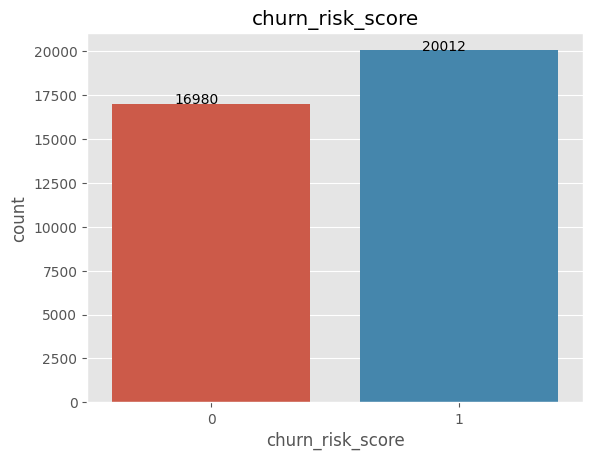

In [ ]:
# Observe imbalance data
ax = sns.countplot(x="churn_risk_score", data=df)
plt.title("churn_risk_score")

for p in ax.patches: #Add data label
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

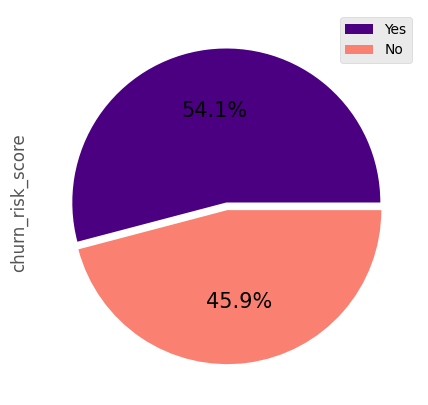

In [ ]:
# distribution of data from the 'churn_risk_score'/ target column
plt.figure(figsize=(7,5))

df['churn_risk_score'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Yes', 'No'])
plt.show()

Terlihat bahwa sebaran datanya sudah cukup seimbang *(balance)* dengan kategori pelanggan yang akan berhenti memakai produk atau `1` sekitar **54.1%** yaitu sebanyak 20.012 orang dan pelanggan yang tidak berhenti memakai produk atau `0` sekitar **45.9%** yaitu sebanyak 16.980 orang.

## Univariate analysis

Pada bagian ini Saya ingin melihat distribusi data dari:
- Fitur-fitur numerikal
- Fitur-fitur kategorikal

In [ ]:
# Duplicate dataset
df_churn = df.copy()

### Numerical Feature Summary

Langkah pertama dalam analisis univariat adalah memeriksa distribusi/penyebaran data. Ini dilakukan dengan terkhususnya menggunakan `histogram` dan `box plot`. Selain itu, Saya akan memplot setiap fitur numerik pada `violin plot` dan `cumulative density distribution plot`. Untuk membuat 4 jenis plot ini, Saya membuat fungsi `summary()` di bawah ini untuk memplot masing-masing atribut numerik. Selain itu, Saya akan menampilkan `5 point summary` berdasarkan fitur.

In [ ]:
# Function to plot numerical feature
def summary(x):
    '''
    The function prints the 5 point summary and histogram, box plot, 
    violin plot, and cumulative density distribution plots for each 
    feature name passed as the argument.
    
    Parameters:
    ----------
    
    x: str, feature name
    
    Usage:
    ------------
    
    summary('age')
    '''
    x_min = df_churn[x].min()
    x_max = df_churn[x].max()
    Q1 = df_churn[x].quantile(0.25)
    Q2 = df_churn[x].quantile(0.50)
    Q3 = df_churn[x].quantile(0.75)
    
    dict={'Min': x_min, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Max': x_max}
    df = pd.DataFrame(data=dict, index=['Value'])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n')
    print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(df_churn[x], color = 'purple')
    ax1.axvline(
        np.mean(df_churn[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(df_churn[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x = df_churn[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(x=df_churn[x], palette = 'cool', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(df_churn[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

#### Age

5 Point Summary of Age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    10 |   23 |   37 |   51 |    64 |
+-------+-------+------+------+------+-------+


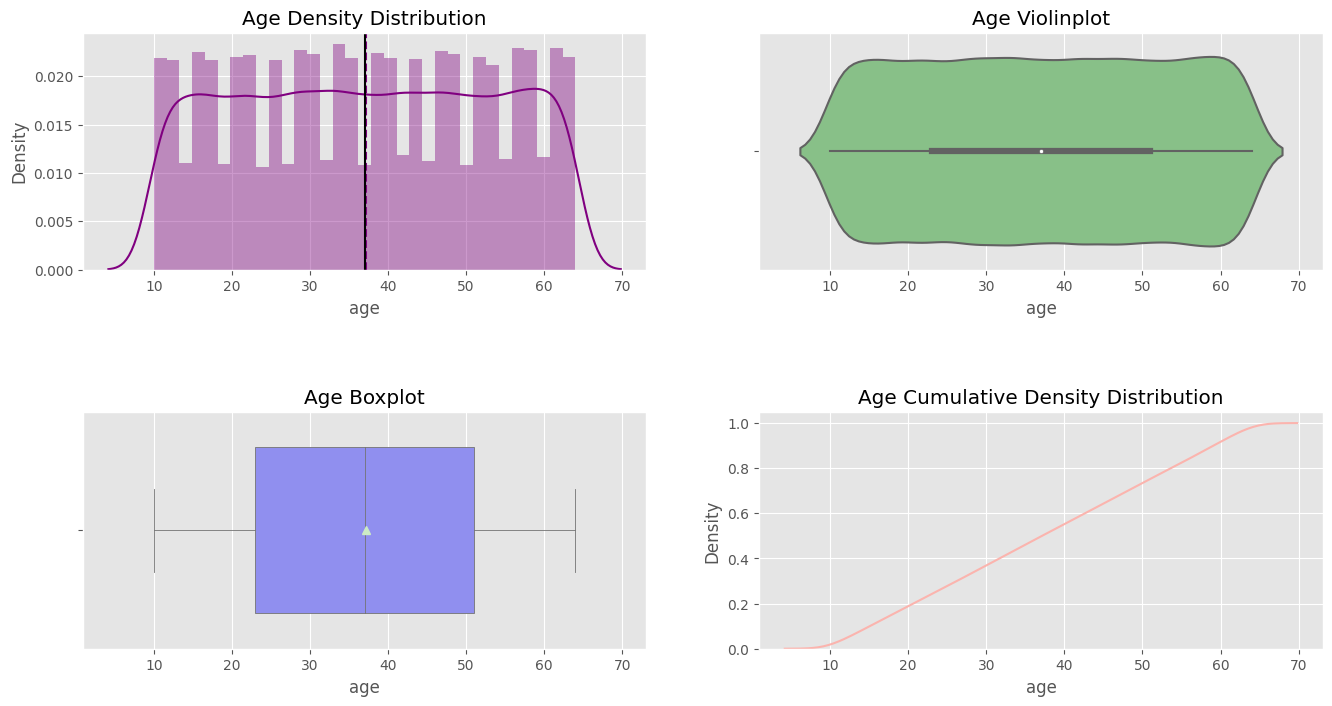

In [ ]:
# plot 'Age'
summary('age')

Observasi fitur `age`:<br>
- Fitur usia terlihat terdistribusi normal
- Tidak ada outlier pada atribut usia
- Kebanyakan customer berusia `23-51 tahun`

#### Days Since Last Login

5 Point Summary of Days_since_last_login Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    9 |   13 |   17 |    26 |
+-------+-------+------+------+------+-------+


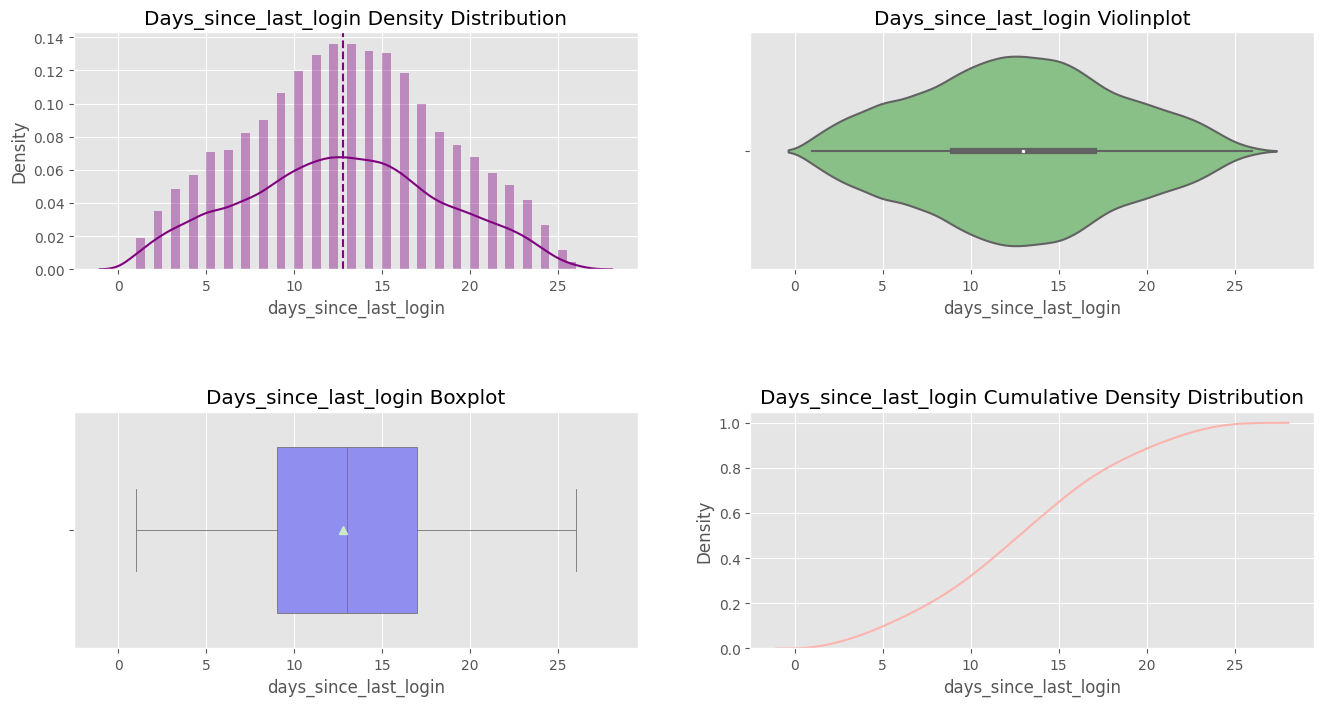

In [ ]:
# plot 'days_since_last_login'
summary('days_since_last_login')

Observasi fitur `days_since_last_login`:<br>
- Fitur ini terlihat terdistribusi normal
- Tidak ada outlier pada atribut ini
- Kebanyakan pelanggan sudah tidak masuk ke situs web tersebut selama `9-17 hari`

#### Average Time Spent

5 Point Summary of Avg_time_spent Attribute:

+-------+-------+---------+---------+---------+---------+
|       |   Min |      Q1 |      Q2 |      Q3 |     Max |
|-------+-------+---------+---------+---------+---------|
| Value |     0 | 60.1025 | 161.765 | 356.515 | 3235.58 |
+-------+-------+---------+---------+---------+---------+


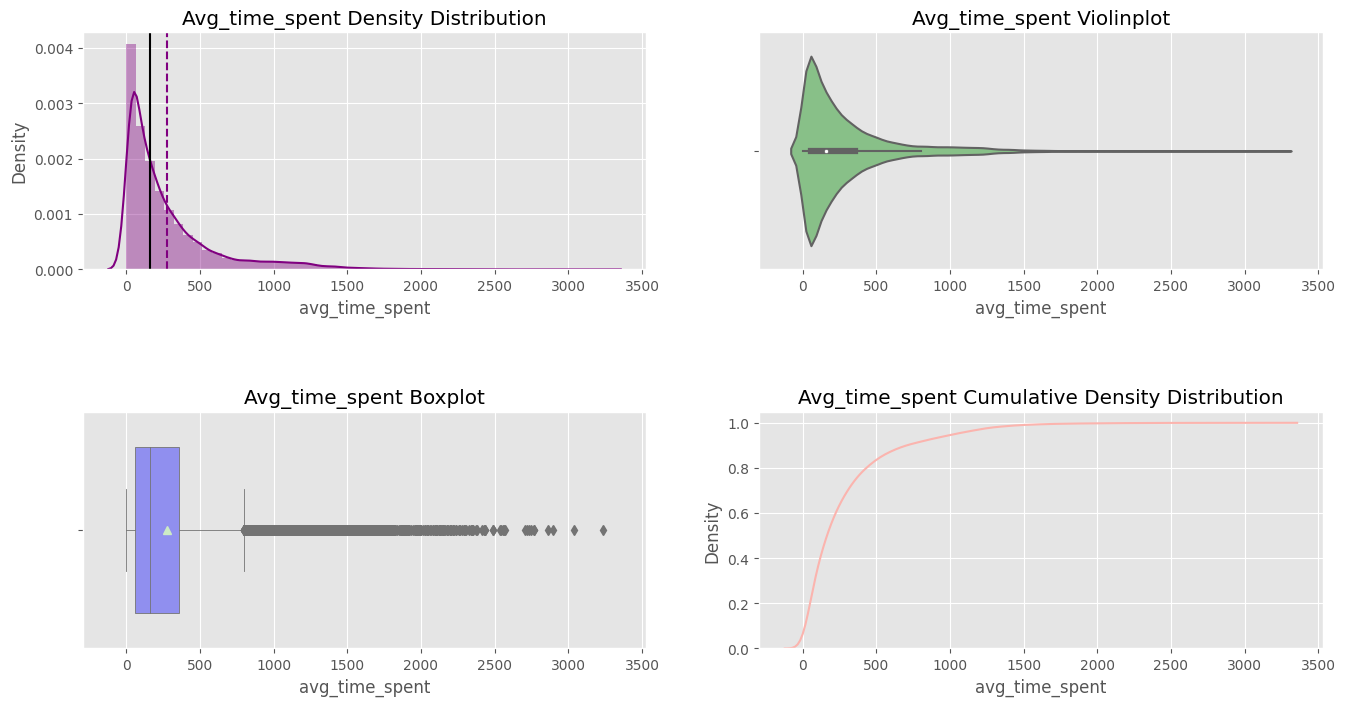

In [ ]:
# plot 'avg_time_spent'
summary('avg_time_spent')

Observasi fitur `avg_time_spent`:<br>
- Fitur ini terlihat tidak terdistribusi normal atau sangat miring ke kanan *(right-skewed)*
- Ada beberapa outlier di tail kanan
- Sebagian besar pelanggan menghabiskan waktu di situs web rata-rata `161,765 detik`, sementara ada nilai yang ekstrim seperti `3235,58 detik` atau hampir 1 jam

#### Average Transaction Value

5 Point Summary of Avg_transaction_value Attribute:

+-------+--------+---------+---------+---------+---------+
|       |    Min |      Q1 |      Q2 |      Q3 |     Max |
|-------+--------+---------+---------+---------+---------|
| Value | 800.46 | 14177.5 | 27554.5 | 40855.1 | 99914.1 |
+-------+--------+---------+---------+---------+---------+


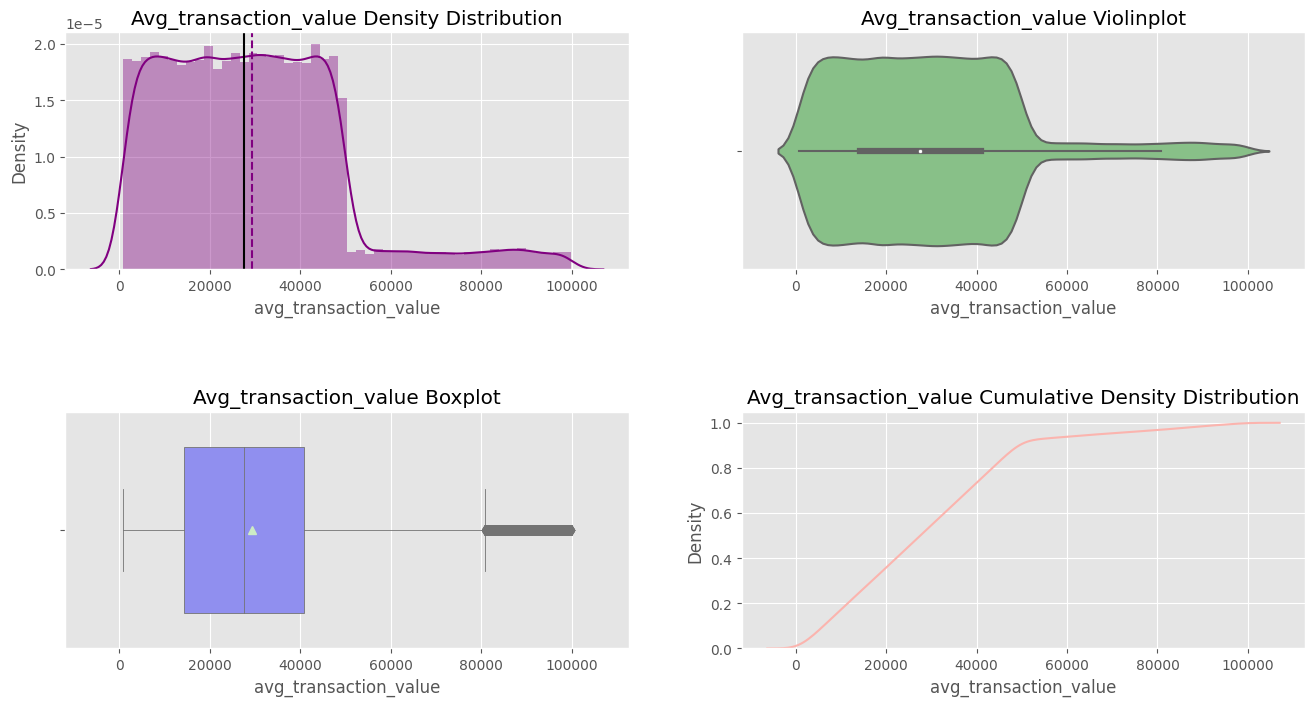

In [ ]:
# plot 'avg_transaction_value'
summary('avg_transaction_value')

Observasi fitur `avg_transaction_value`:<br>
- Fitur ini terlihat tidak terdistribusi normal atau sangat miring ke kanan *(right-skewed)*
- Ada beberapa outlier di tail kanan
- Sebagian besar pelanggan memiliki nilai transaksi rata-rata `27.554,5`, sementara ada nilai yang ekstrim seperti `99.914,1` atau hampir 100K

#### Average Frequency Login Days

5 Point Summary of Avg_frequency_login_days Attribute:

+-------+-------+------+------+------+--------+
|       |   Min |   Q1 |   Q2 |   Q3 |    Max |
|-------+-------+------+------+------+--------|
| Value |     0 |    7 |   14 |   22 | 73.062 |
+-------+-------+------+------+------+--------+


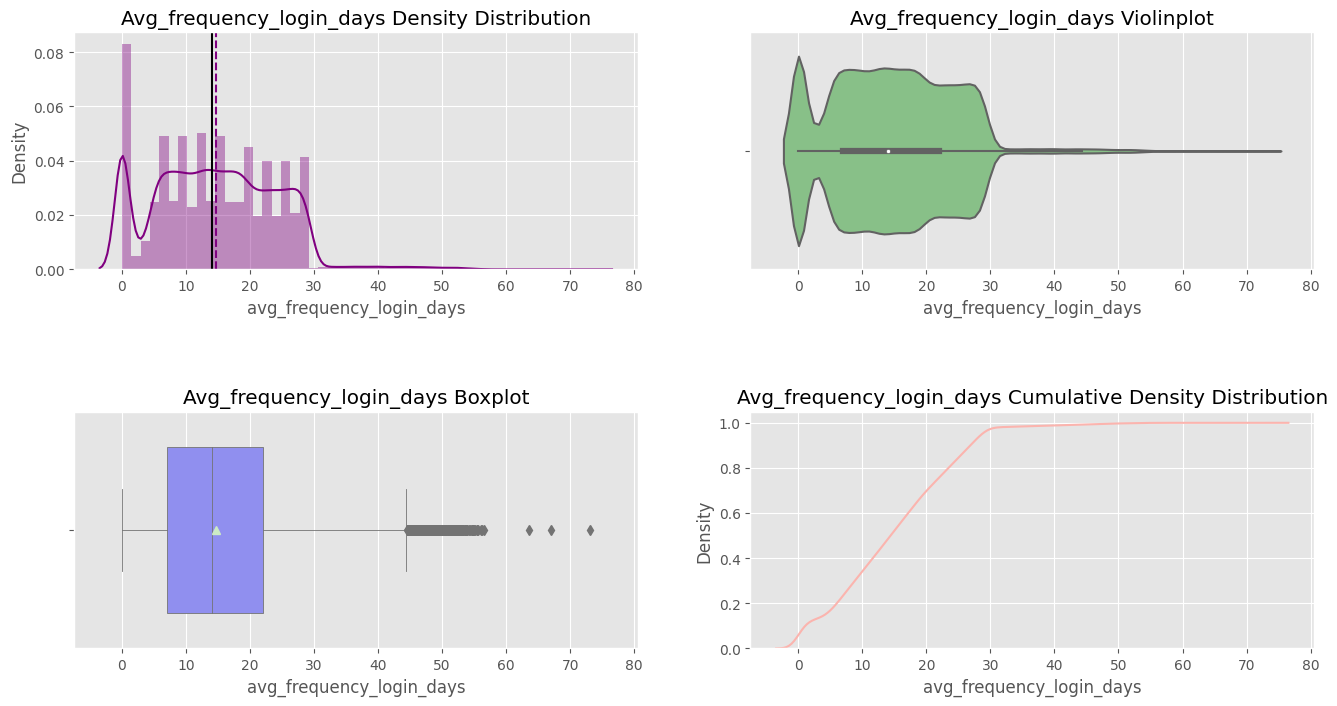

In [ ]:
# plot 'avg_frequency_login_days'
summary('avg_frequency_login_days')

Observasi fitur `avg_frequency_login_days`:<br>
- Fitur ini terlihat terdistribusi normal
- Ada beberapa outlier di tail kanan
- Sebagian besar frekuensi pelanggan masuk ke situs web sekitar `7-22`, sementara ada nilai yang ekstrim seperti `73`

#### Points in Wallet

5 Point Summary of Points_in_wallet Attribute:

+-------+-------+---------+--------+---------+---------+
|       |   Min |      Q1 |     Q2 |      Q3 |     Max |
|-------+-------+---------+--------+---------+---------|
| Value |     0 | 574.135 | 680.37 | 757.003 | 2069.07 |
+-------+-------+---------+--------+---------+---------+


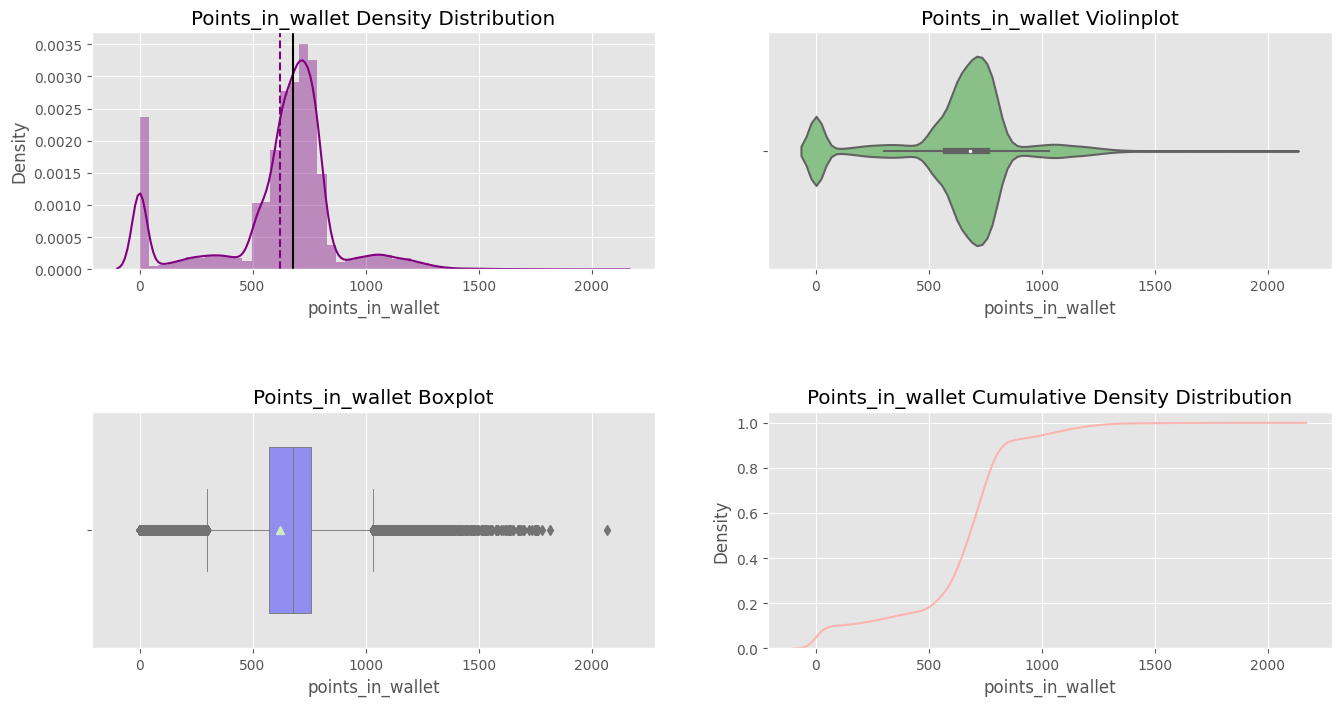

In [ ]:
# plot 'points_in_wallet'
summary('points_in_wallet')

Observasi fitur `points_in_wallet`:<br>
- Fitur ini terlihat tidak terdistribusi normal atau miring ke kiri *(left-skewed)*
- Ada outlier di kedua tail
- Sebagian besar poin yang diberikan kepada pelanggan pada setiap transaksi sekitar `574+ - 757`, sementara ada nilai yang ekstrim seperti `0` dan `2069,07`

### Categorical Feature Summary

Untuk mengetahui distribusi dari variabel kategori, cara yang terbaik adalah menganalisisnya pada persentase total pada `bar chart`. Fungsi di bawah mengambil kolom kategori sebagai input dan memplot `bar chart` dengan persentase di atas setiap bar.

In [ ]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    perc_on_bar(df, ['gender'], 'churn_risk_score')
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(40,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

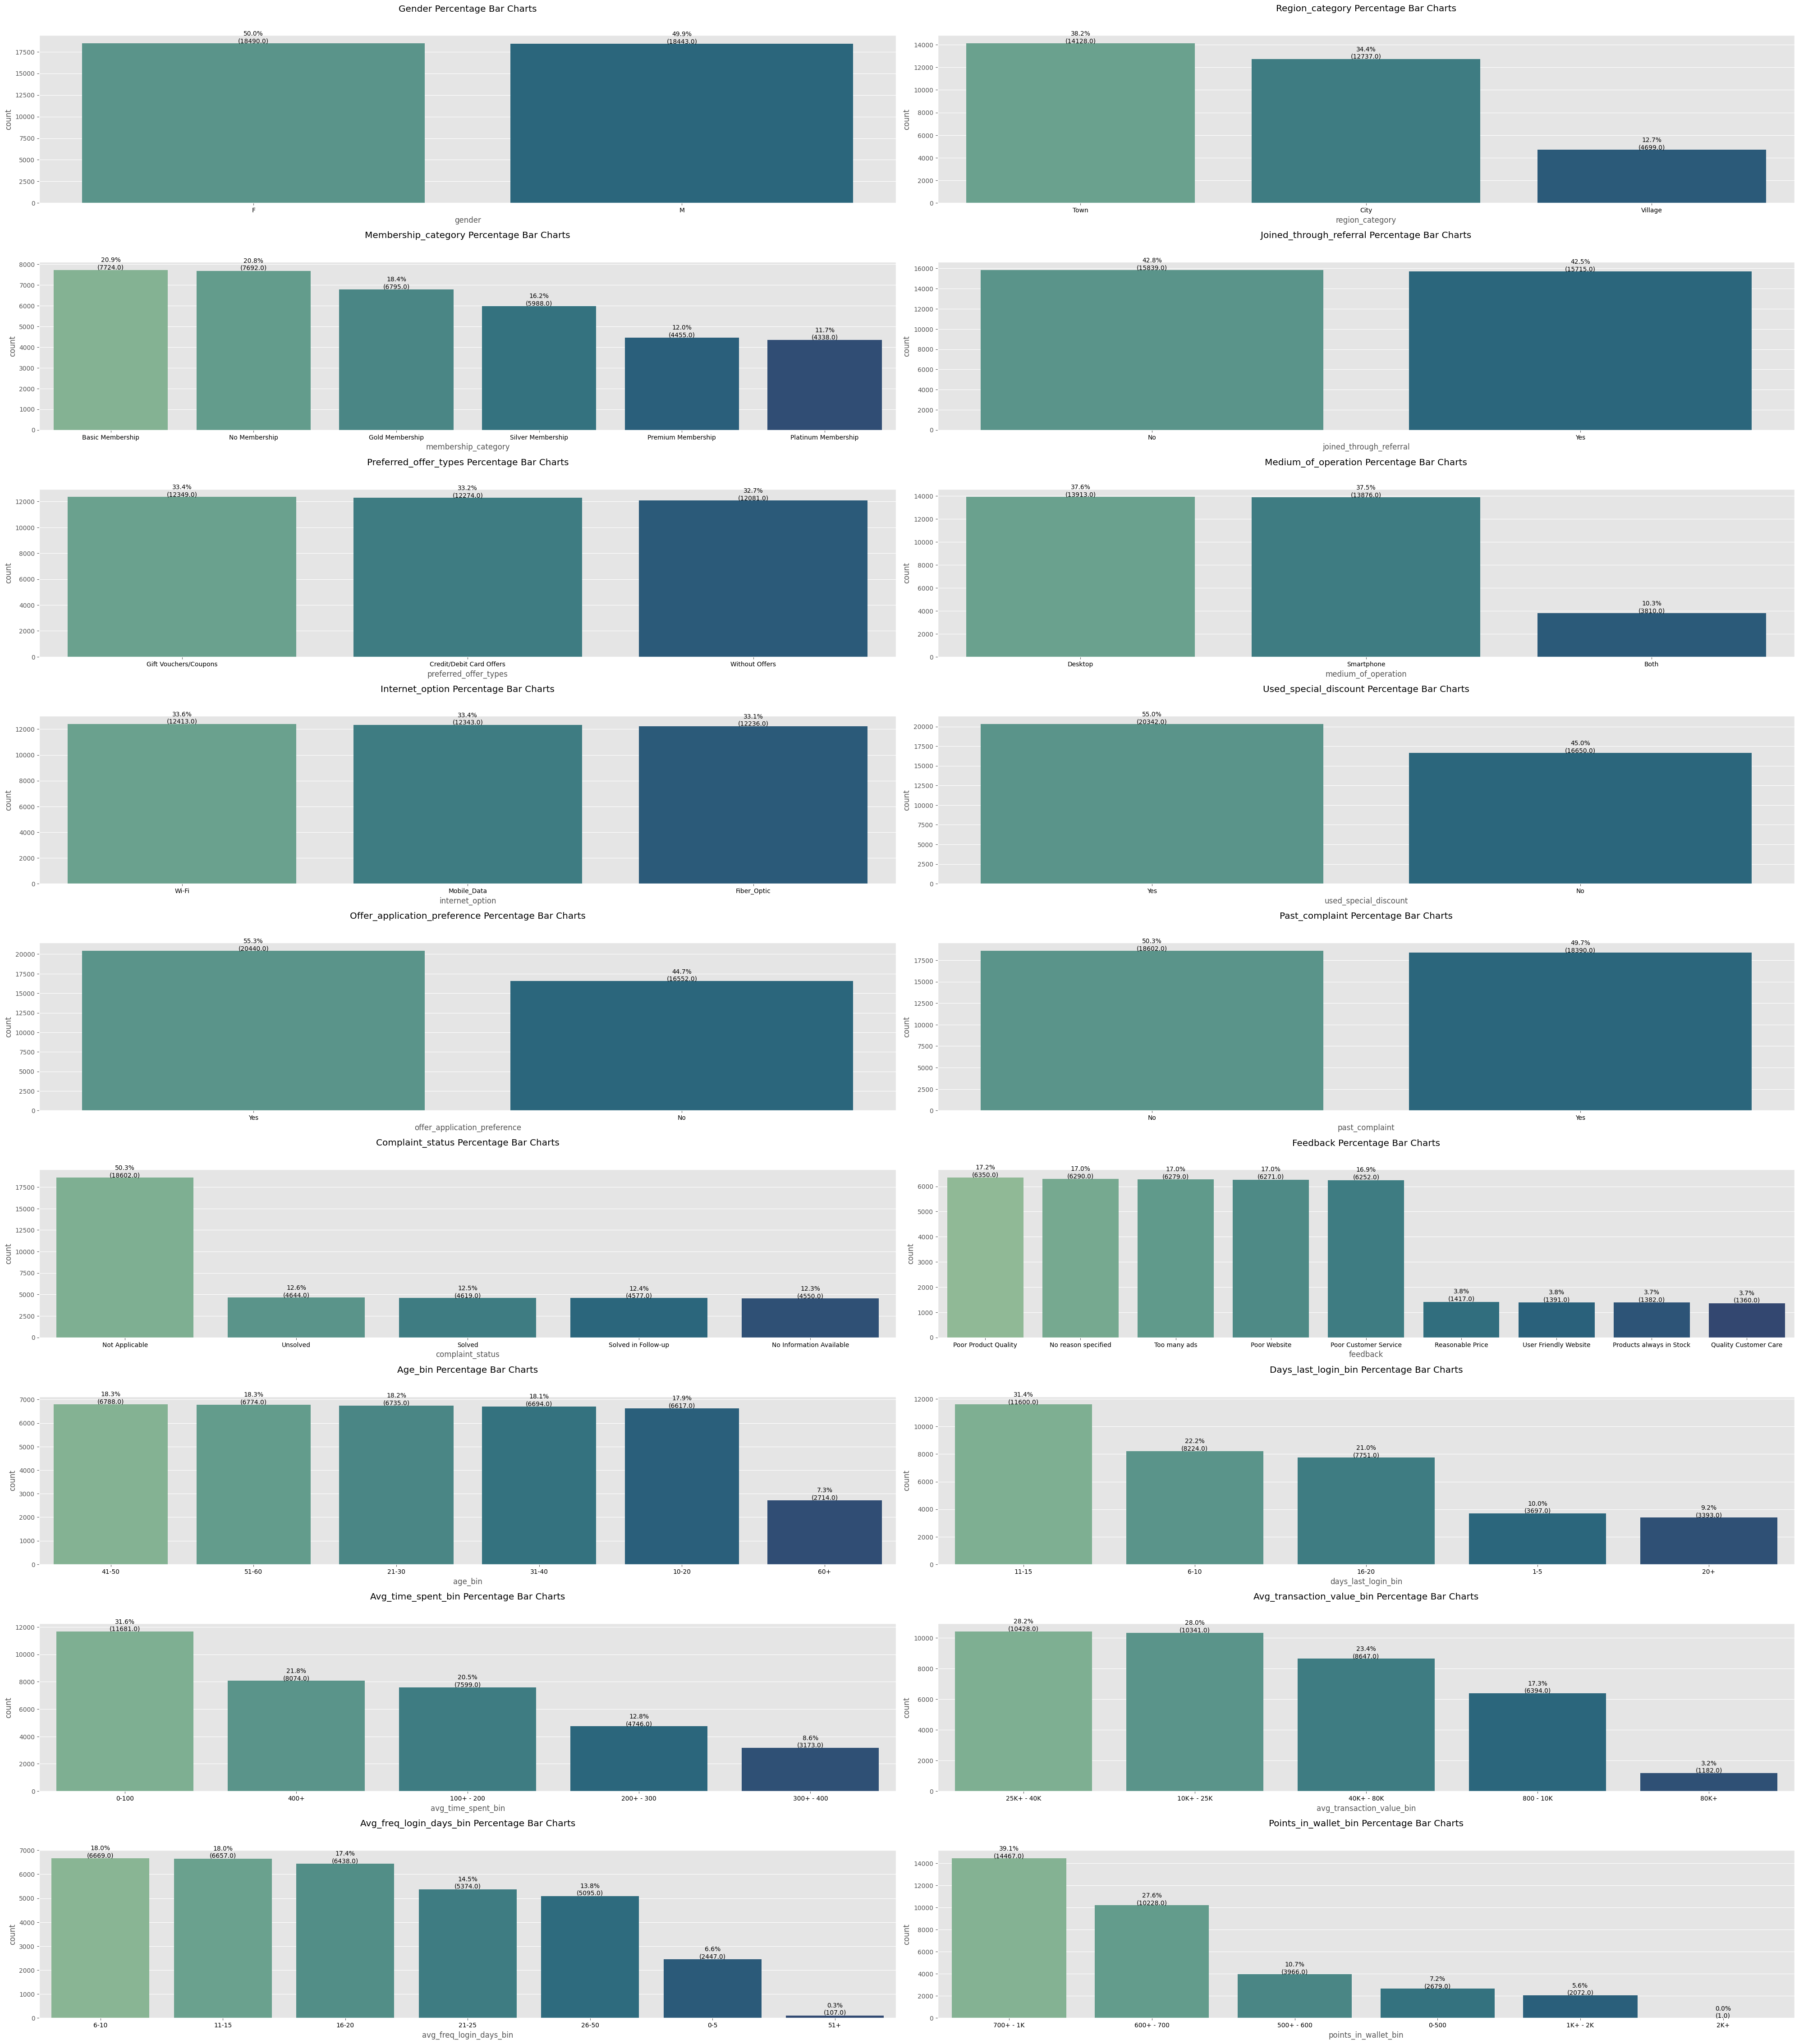

In [ ]:
# plot categorical features
category_columns = df_churn.select_dtypes(include='category').columns.tolist()
target_variable = 'churn_risk_score'
perc_on_bar(df_churn, category_columns, target_variable)

Observasi fitur-fitur kategorik:<br>
- `~93%` berada di kelompok usia `10+ - 60 tahun`. Hanya `~7%` pelanggan berusia `60+`.
- `50%` pelanggan atau sebanyak `18.490` pelanggan berjenis kelamin wanita `(F)`.
- `38,2%` pelanggan atau sebanyak `14.128` pelanggan berasal dari kota kecil `(Town)`.
- `~20,9%` pelanggan atau sebanyak `7.724` pelanggan memiliki member basic `(Basic Membership)`.
- `~42,8%` pelanggan atau sebanyak `15.839` pelanggan itu tidak menggunakan kode referal pada saat join `(No).
- `Gift Vouchers/Coupons` ditawarkan kepada `~33,4%` pelanggan atau `12.349` pelanggan.
- `~37,6%` atau `13.913` pelanggan menggunakan media `Desktop`, diikuti oleh `37,5%` atau `13.876` pelanggan menggunakan media `Smartphone`.
- `~33,6% `pelanggan menggunakan tipe layanan internet `Wi-Fi`, diikuti dengan `Mobile_Data` kemudian `Fiber_Optic`.
- `~31,4%` atau `11.600` pelanggan terakhir masuk ke website selama `11-15 hari`.
- `~31,6%` atau `11.681` pelanggan menghabiskan waktu di website rata-rata `0-100 detik`.
- `~28,2%` atau `10.428` pelanggan memiliki nilai transaksi rata-rata `25K+ - 40K`.
- `~18%` atau `6.669` pelanggan sudah masuk ke website dengan frekuensi rata-rata `6-10`.
- `~39,1%` atau sebanyak `14.467` pelanggan memiliki point dari setiap transaksinya sebesar `700+ - 1K`.
- `~55%` atau sebanyak `20.342` pelanggan menggunakan penawaran diskon spesial `Yes`.
- `~55,3%` atau sebanyak `20.440` pelanggan memiliki penawaran `Yes`.
- `~50,3%` atau sebanyak `18.602` pelanggan tidak komplain `No`.
- `~50,3%` atau sebanyak `18.602` pelanggan status komplainnya tidak dapat diterapkan `Not Applicable`.
- `~17,2%` atau sebanyak `6.350` pelanggan feedbacknya adalah `Poor Product Quality`.

## Bivariate analysis

Pada bagian ini Saya ingin melihat hubungan `(relationship)` semua variabel dengan dengan variabel target `churn_risk_score`. Tujuan dari analisis bivariat adalah untuk menemukan interdependensi antar fitur. 

### Target vs. All Numerical Columns

In [ ]:
# Below code plots box charts for each numerical feature by each type of churn_risk_score (0: Not Churn, 1: Churn)
def box_by_target(numeric_columns, target, include_outliers):
    '''
    The function takes a category column, target column, and whether to include outliers or not as input 
    and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    box_by_target(['age'], 'churn_risk_score', True)
    '''
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns)/2 + 1)
    plt.figure(figsize=(16,8*subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(data=df_churn, x=target, y=col, orient='vertical', palette="Blues", showfliers=include_outliers)
        plt.xticks(ticks=[0,1], labels=['Not Churn (0)', 'Churn (1)'])
        plt.tight_layout()
        plt.title(str(i+1)+ ': '+ target +' vs. ' + col, color='black')

#### With outliers

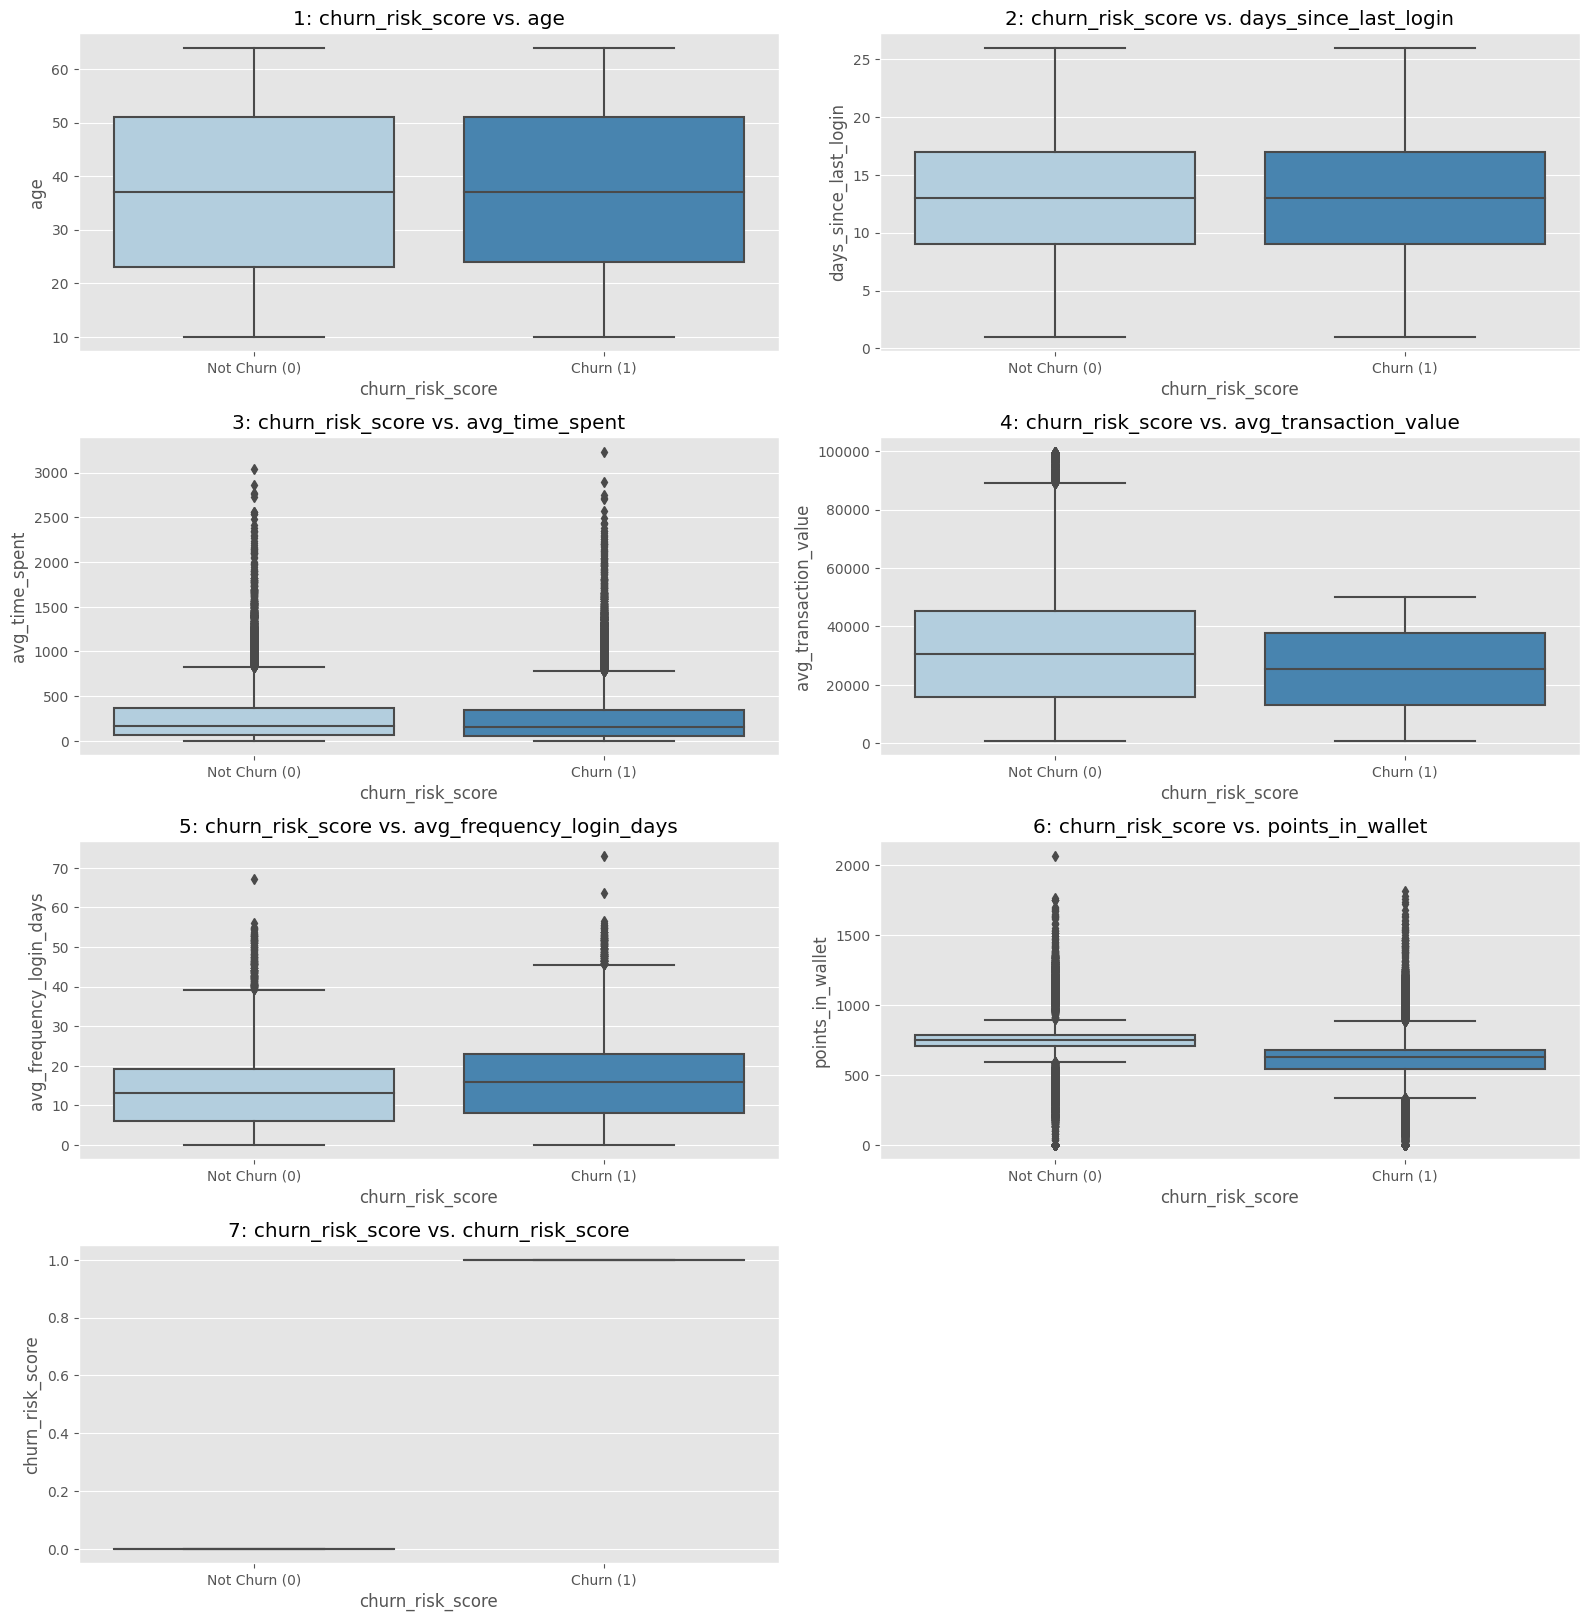

In [ ]:
# Target vs. All numerical columns with outliers
numeric_columns = df_churn.select_dtypes(include=np.number).columns.tolist()
target_variable = 'churn_risk_score'
box_by_target(numeric_columns, target_variable, True)

Observasi (dengan outlier) tentang hubungan variabel numerik dengan target yang signifikan:<br>
- Orang yang memiliki rata-rata transaksi dengan `nilai yang rendah` tampaknya lebih beresiko untuk berhenti memakai produk
- Orang yang semakin `sering masuk ke website` tampaknya lebih beresiko untuk berhenti memakai produk
- Orang yang memiliki point `rendah/sedikit` dari setiap transaksinya, cenderung beresiko untuk berhenti memakai produk

#### Without outliers

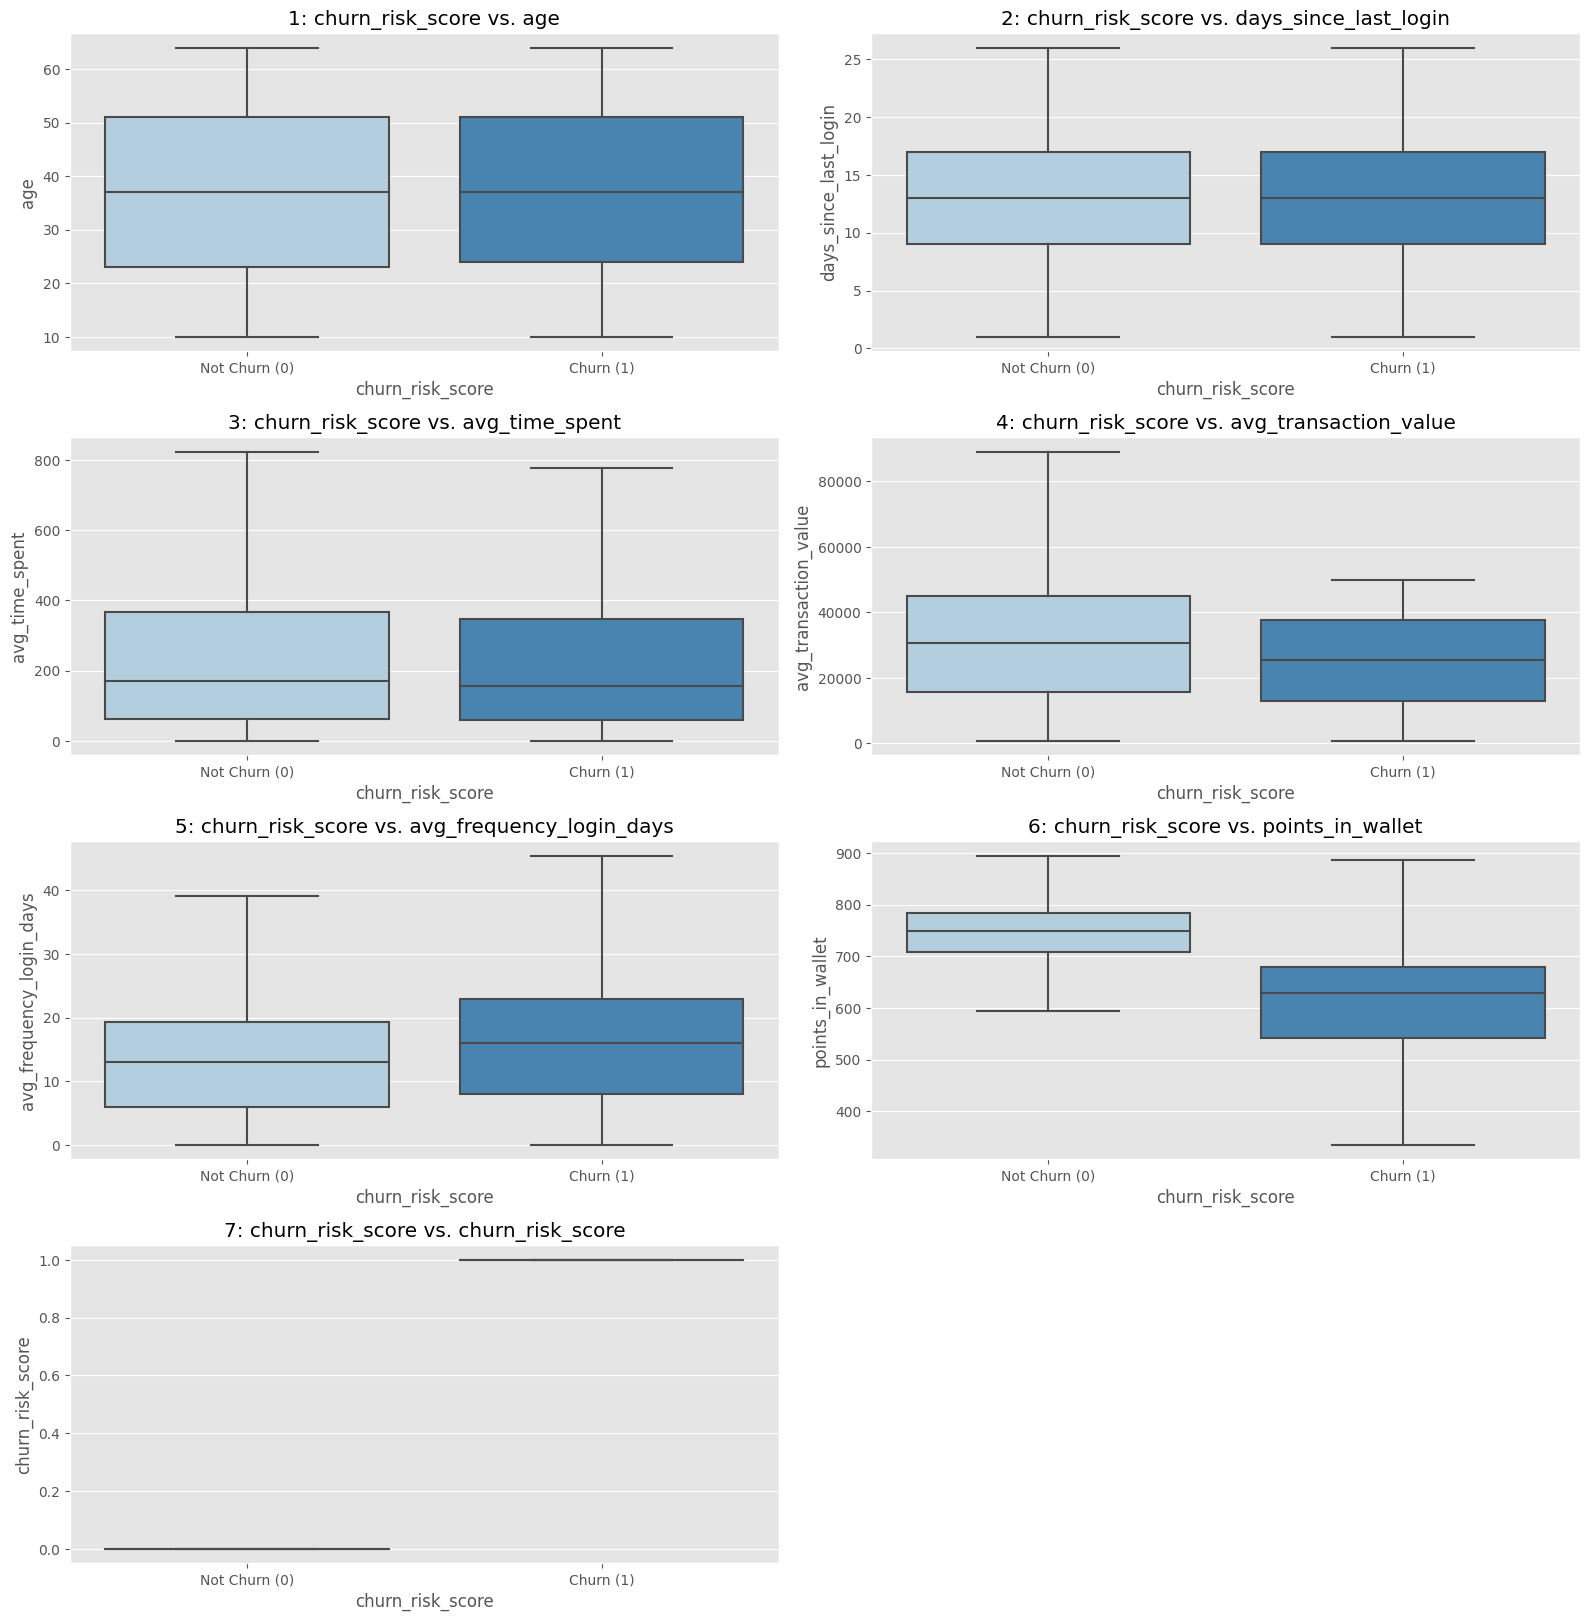

In [ ]:
# Target vs. All numerical columns without outliers
box_by_target(numeric_columns, target_variable, False)

Observasi (tanpa outlier) tentang hubungan variabel numerik dengan target yang signifikan:<br>
- Orang yang memiliki rata-rata transaksi dengan `nilai yang rendah` tampaknya lebih beresiko untuk berhenti memakai produk
- Orang yang semakin `sering masuk ke website` tampaknya lebih beresiko untuk berhenti memakai produk
- Orang yang memiliki point `rendah/sedikit` dari setiap transaksinya, cenderung beresiko untuk berhenti memakai produk

### Target vs. All Categorical Columns

In [ ]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    sns.set_palette('cubehelix')
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = df_churn.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title=x.capitalize(),
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12)

    ax[0].set_title(f'{x.capitalize()} Pie Chart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(df_churn, index = [x], columns = [target], values = ['points_in_wallet'], aggfunc = len)

    labels = df.index.tolist()
    churn_no = df.values[:, 0].tolist()
    churn_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, churn_no, width, label='Not Churn', color = color1)
    rects2 = ax[1].bar(l + width/2, churn_yes, width, label='Churn', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'medium',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    """
    Draw a Stacked Bar Graph on bottom.
    """
    
    sns.set(palette="tab10")
    tab = pd.crosstab(df_churn[x], df_churn[target].map({0:'Not Churn', 1:'Churn'}), normalize="index")
    
    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + ' Stacked Bar Plot')
    plt.legend(loc="upper right", bbox_to_anchor=(0,1))
    plt.show()

#### Gender

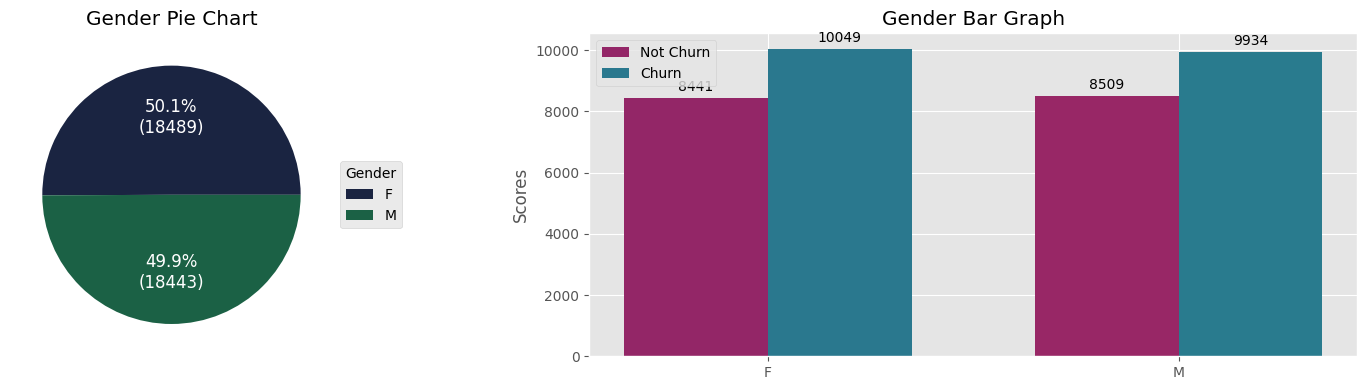

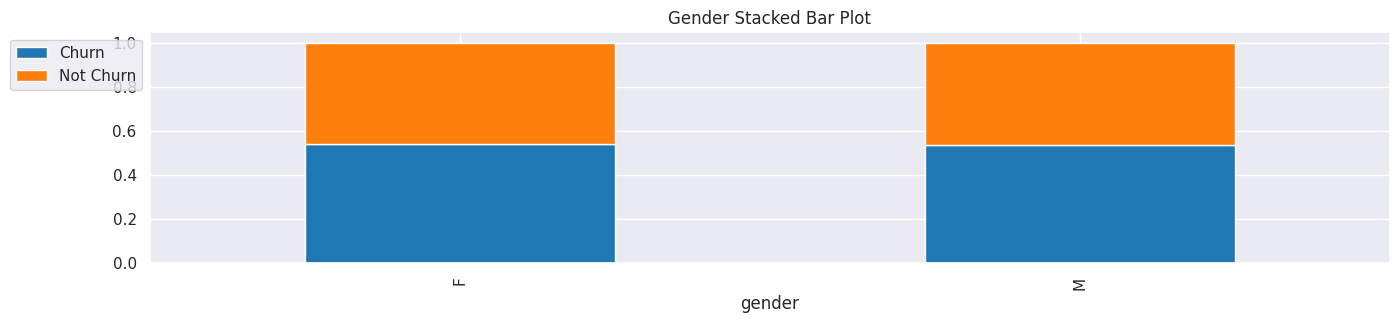

In [ ]:
# plot 'gender' vs 'churn_risk_score'
cat_view('gender', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan berjenis kelamin wanita `(F)`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `gender` atau jenis kelamin pelanggan

#### Region Category

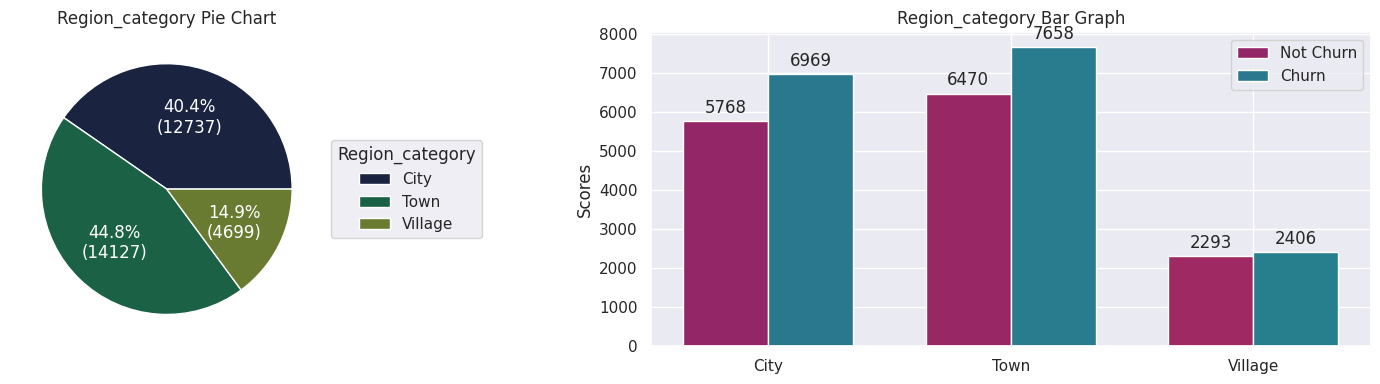

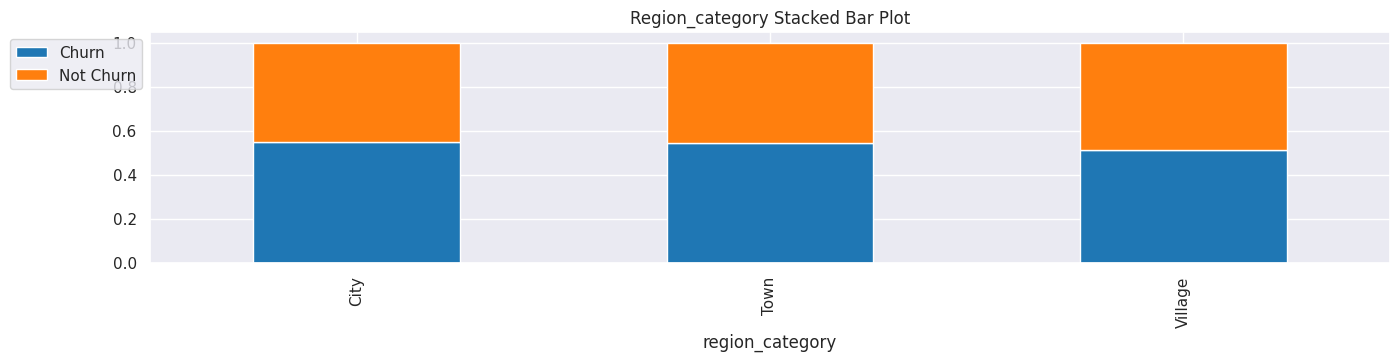

In [ ]:
# plot 'region_category' vs 'churn_risk_score'
cat_view('region_category', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan berasal dari kota kecil `(Town)`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `region_category`

#### Membership Category

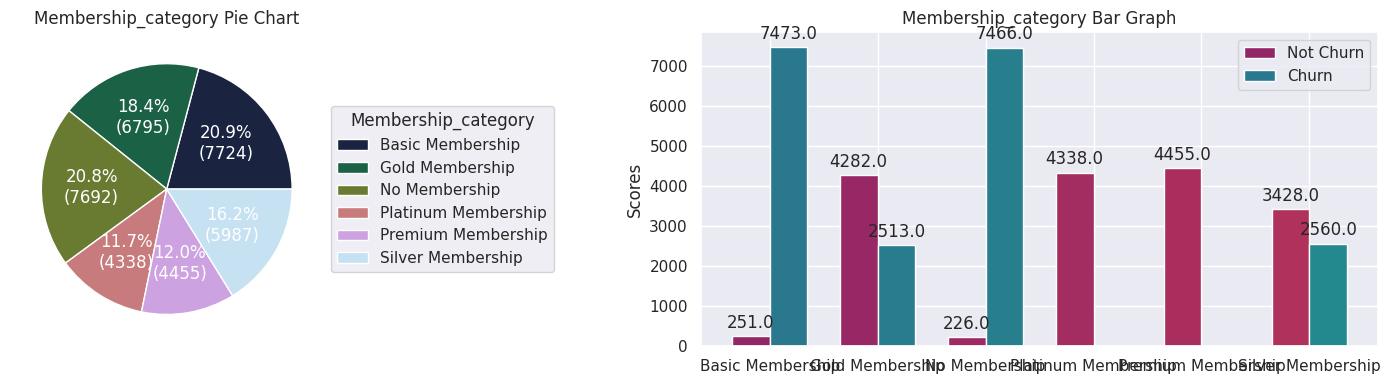

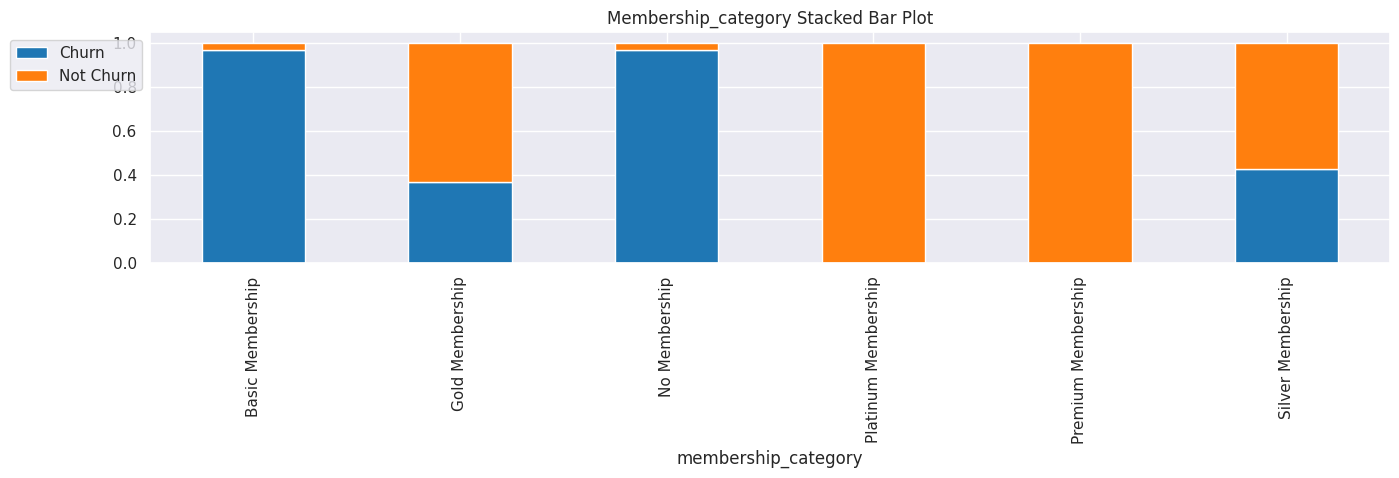

In [ ]:
# plot 'membership_category' vs 'churn_risk_score'
cat_view('membership_category', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan memiliki member basic `(Basic Membership)`
- Pelanggan dengan status member `Basic Membership` dan `No Membership` cenderung lebih beresiko berhenti memakai produk

#### Joined through referral

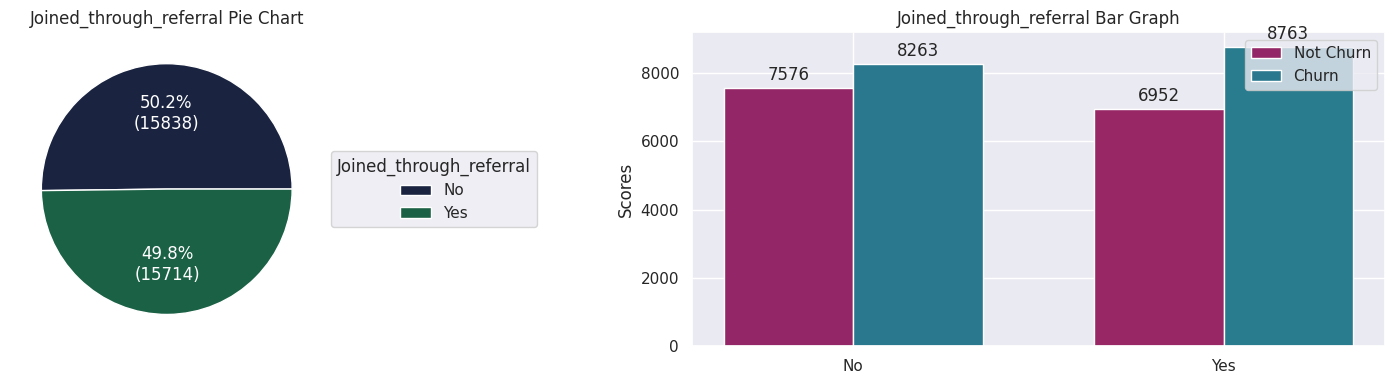

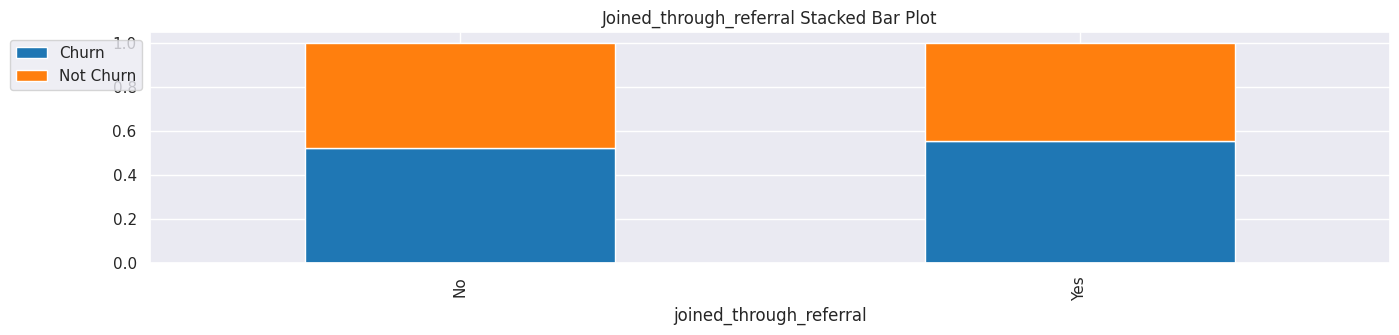

In [ ]:
# plot 'joined_through_referral' vs 'churn_risk_score'
cat_view('joined_through_referral', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan tidak menggunakan kode referal pada saat join `(No)`
- Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh `joined_through_referral`

#### Preferred Offer Types

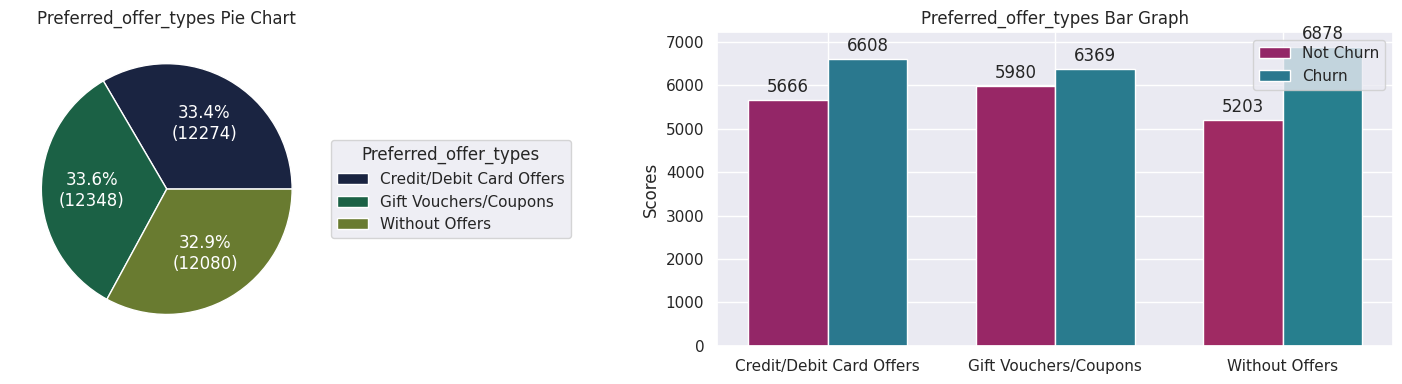

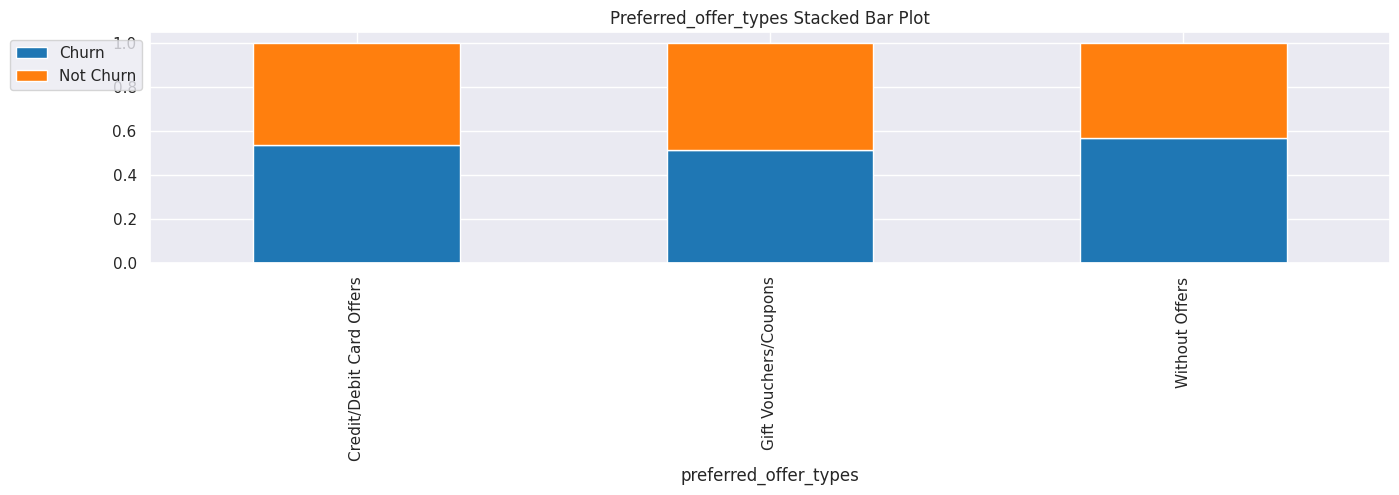

In [ ]:
# plot 'preferred_offer_types' vs 'churn_risk_score'
cat_view('preferred_offer_types', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan ditawarkan `Gift Vouchers/Coupons`
- Pelanggan yang tidak ada penawaran apapun `Without Offers` cenderung lebih beresiko berhenti memakai produk

#### Medium of Operation

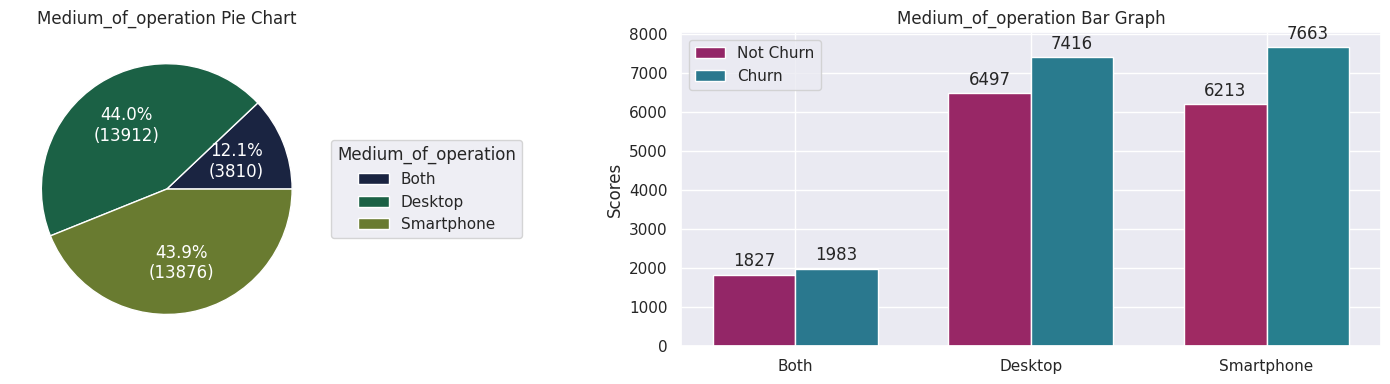

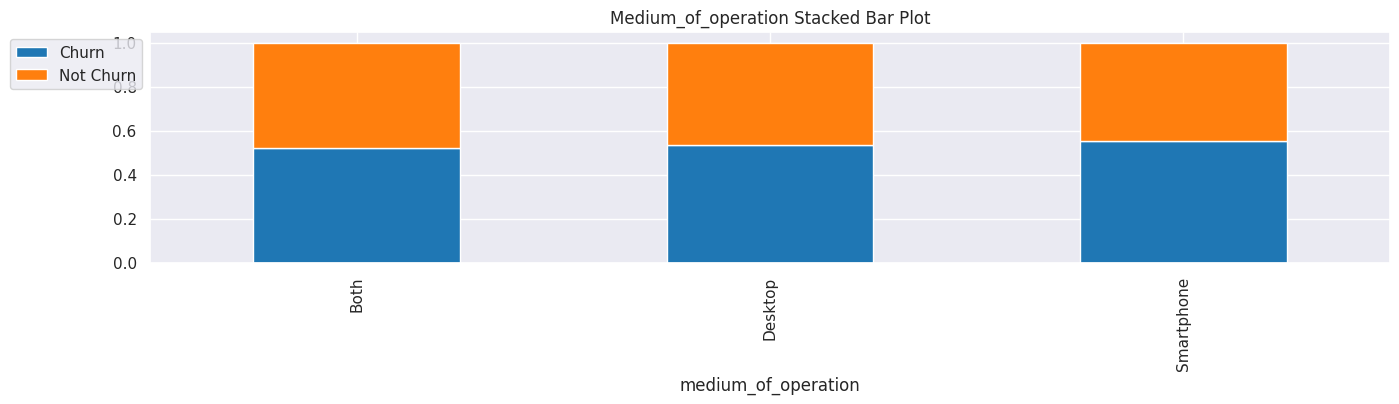

In [ ]:
# plot 'medium_of_operation' vs 'churn_risk_score'
cat_view('medium_of_operation', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan menggunakan media `Desktop`
- Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh `medium_of_operation`

#### Internet Option

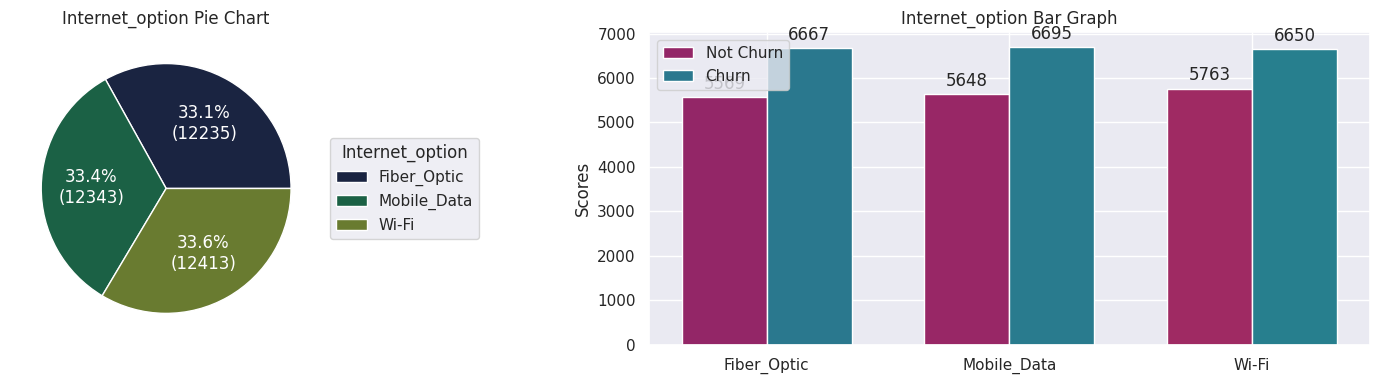

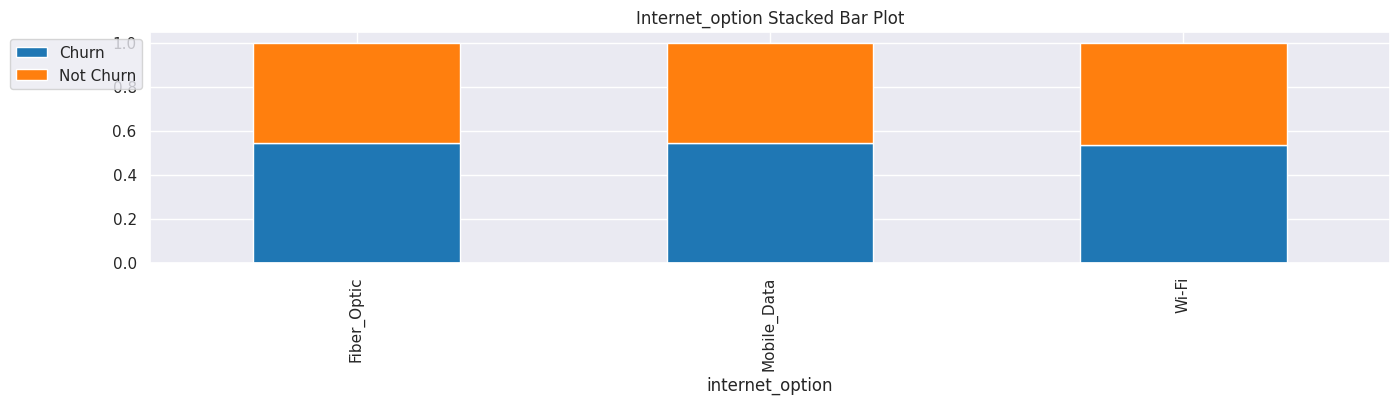

In [ ]:
# plot 'internet_option' vs 'churn_risk_score'
cat_view('internet_option', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan menggunakan tipe layanan internet `Wi-Fi`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `internet_option`

#### Used Special Discount

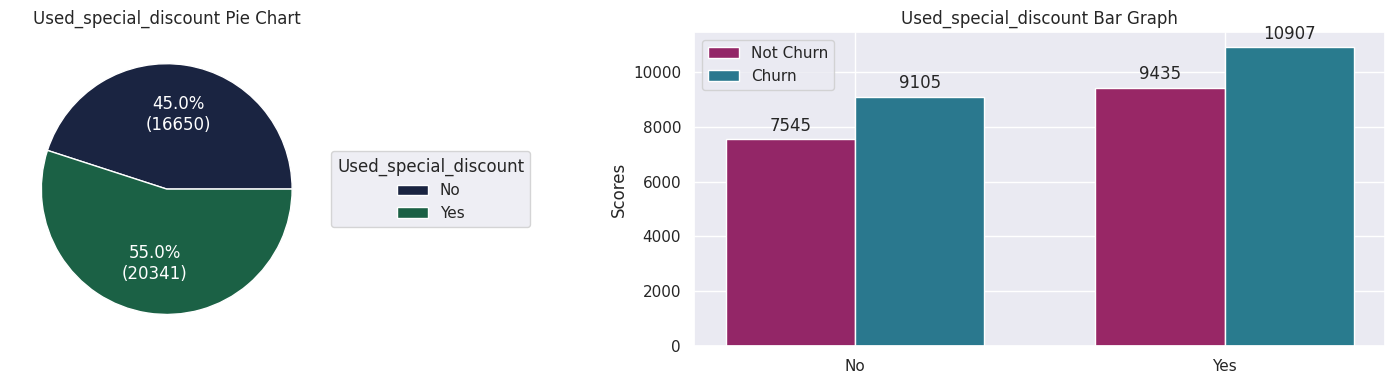

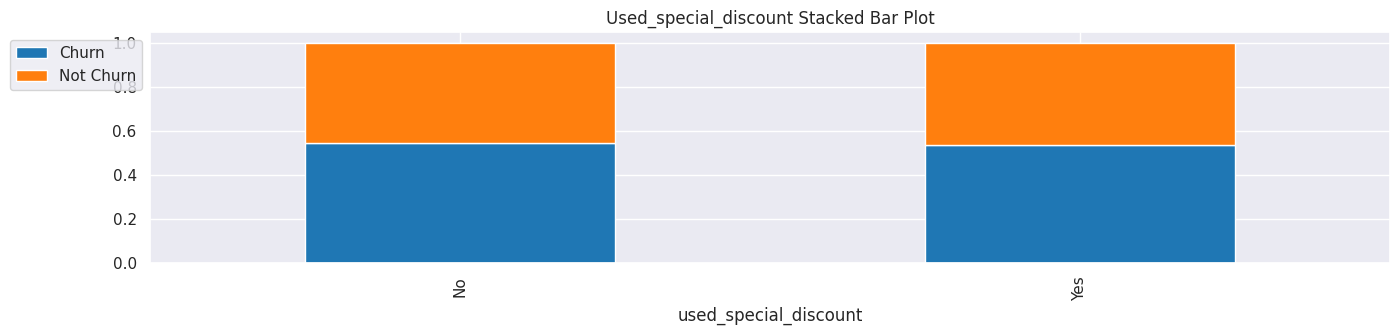

In [ ]:
# plot 'used_special_discount' vs 'churn_risk_score'
cat_view('used_special_discount', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan menggunakan penawaran diskon spesial `Yes`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `used_special_discount`

#### Offer Application Preference

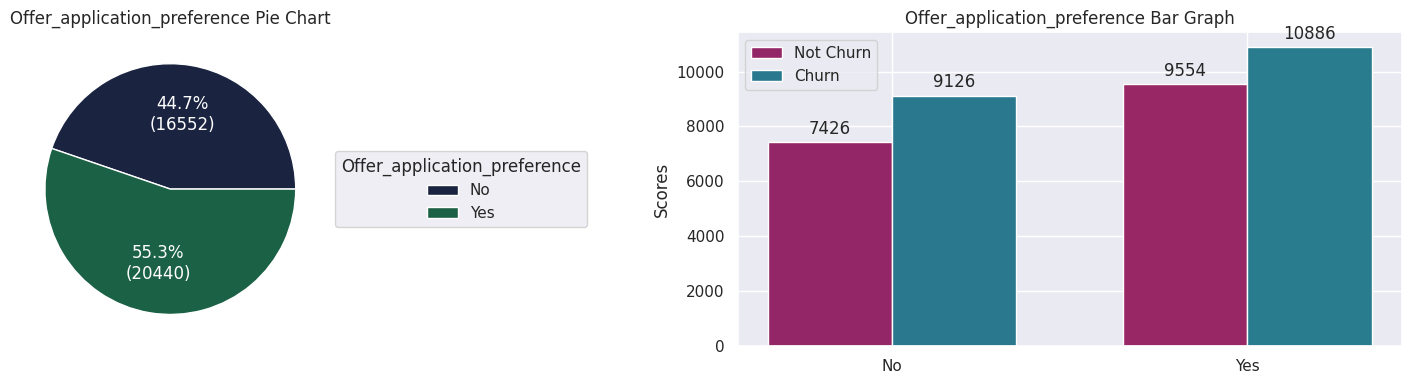

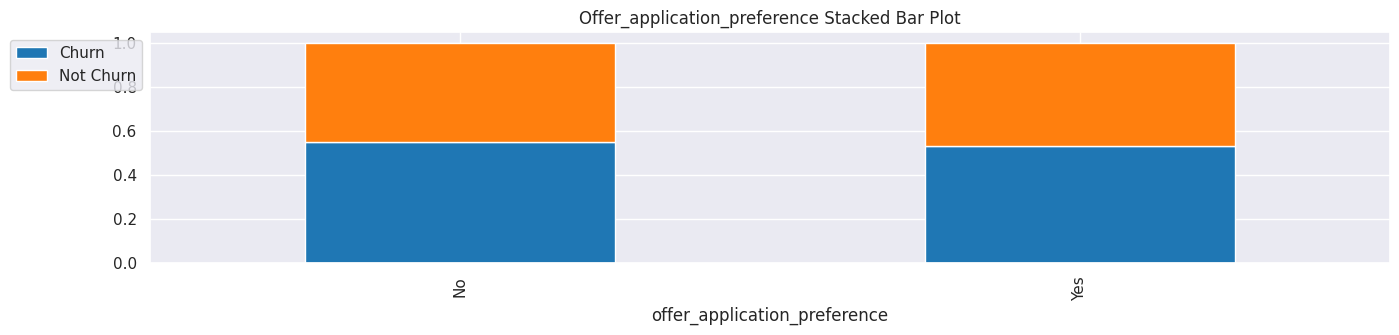

In [ ]:
# plot 'offer_application_preference' vs 'churn_risk_score'
cat_view('offer_application_preference', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan memiliki penawaran `Yes`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `offer_application_preference`

#### Past Complaint

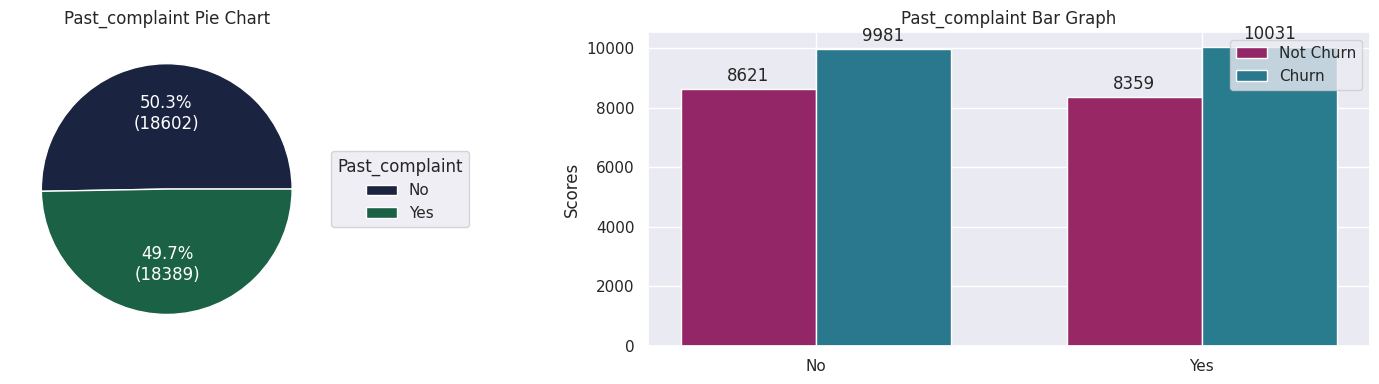

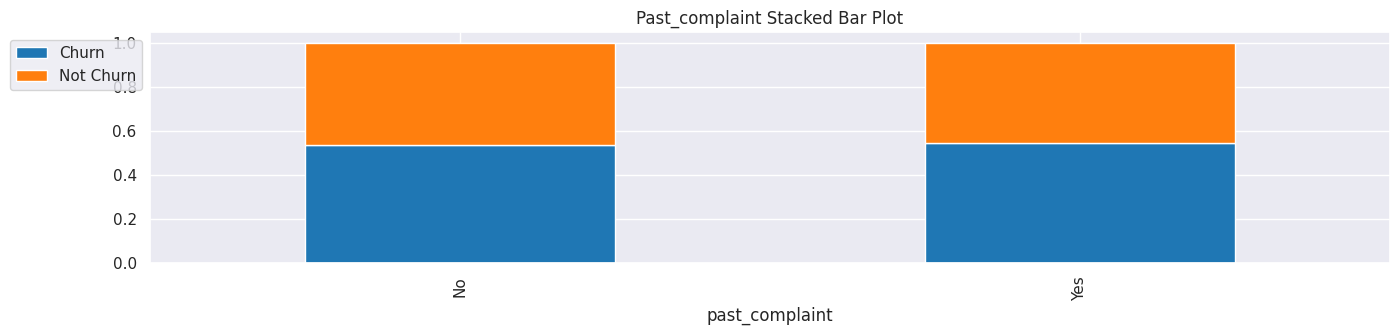

In [ ]:
# plot 'past_complaint' vs 'churn_risk_score'
cat_view('past_complaint', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan tidak komplain `No`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `past_complaint`

#### Complaint Status

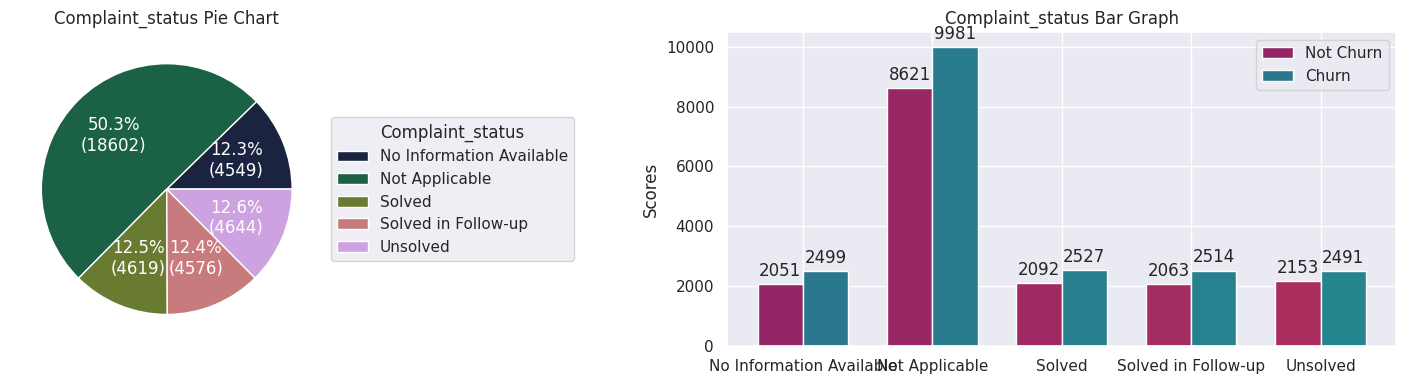

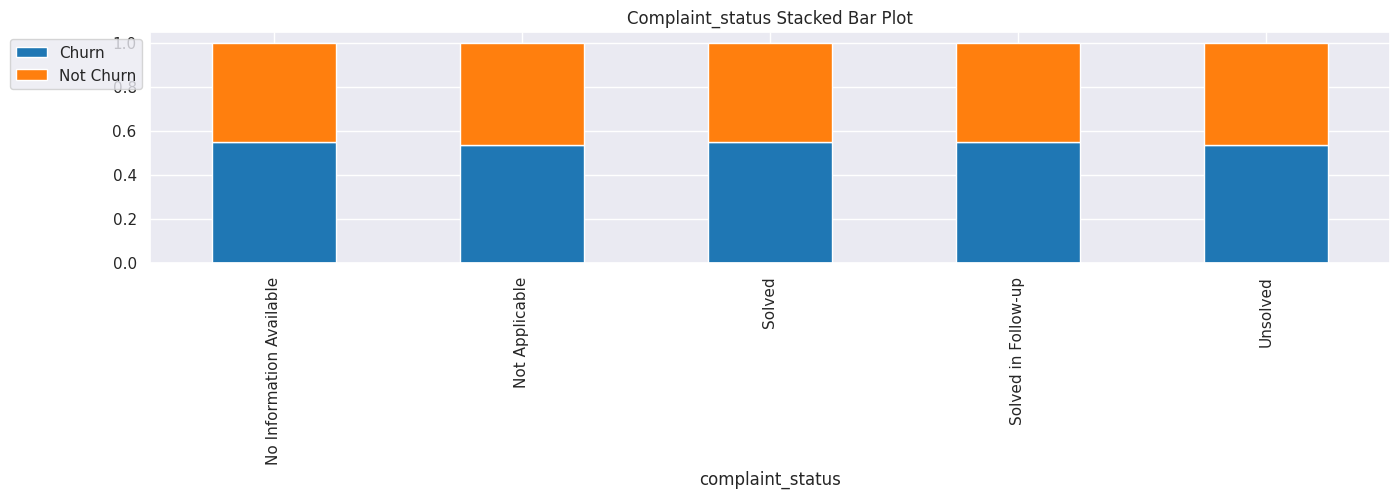

In [ ]:
# plot 'complaint_status' vs 'churn_risk_score'
cat_view('complaint_status', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan status komplainnya tidak dapat diterapkan `Not Applicable`
- Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `complaint_status`

#### Feedback

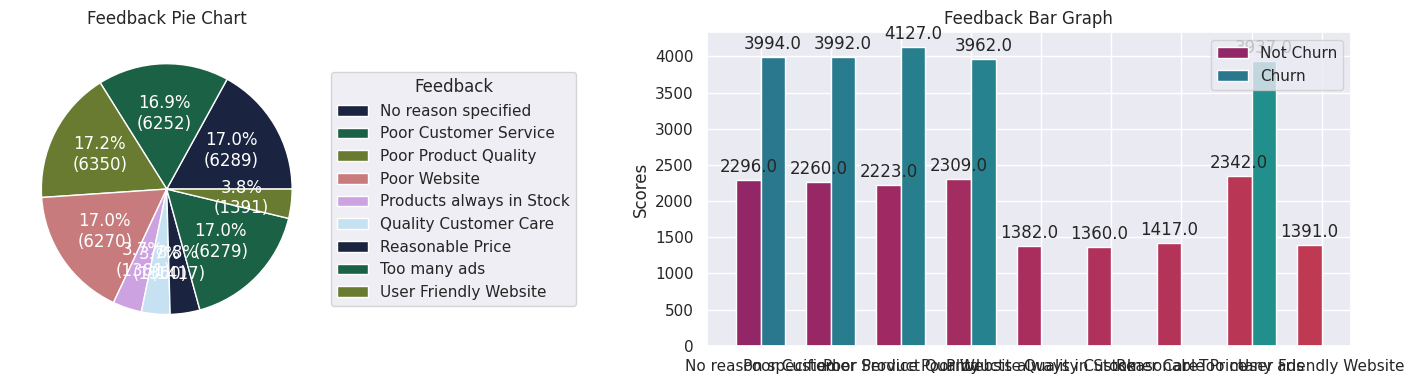

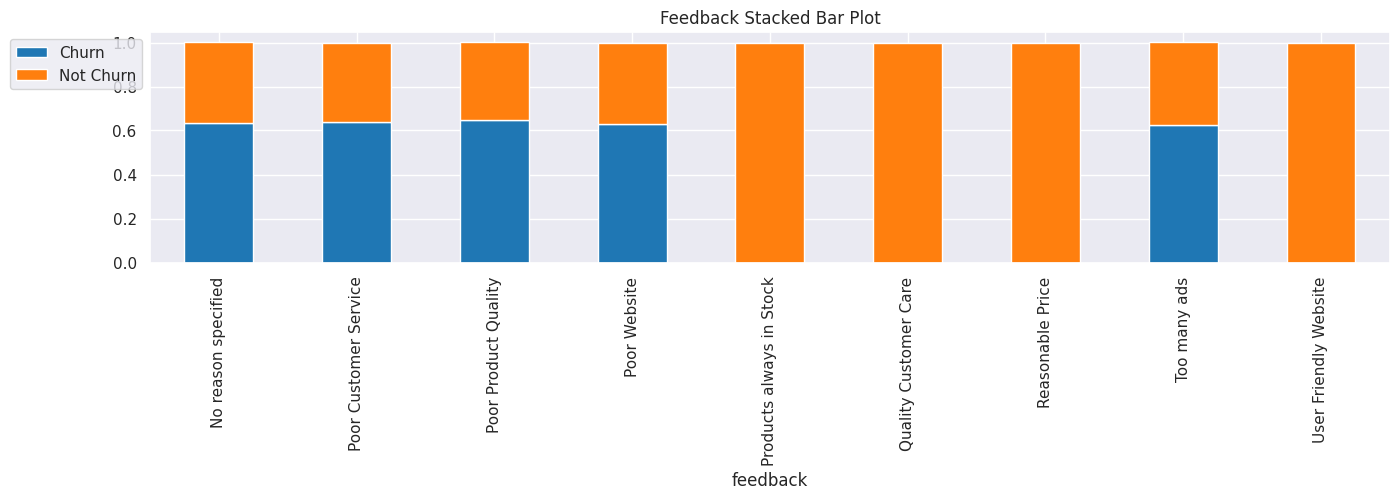

In [ ]:
# plot 'feedback' vs 'churn_risk_score'
cat_view('feedback', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan feedbacknya adalah `Poor Product Quality`
- Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk

#### Age bin

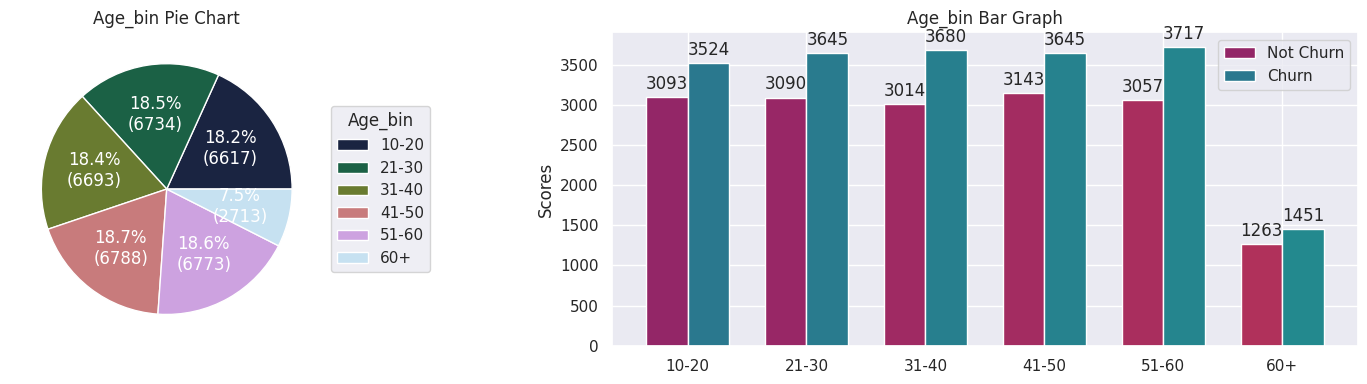

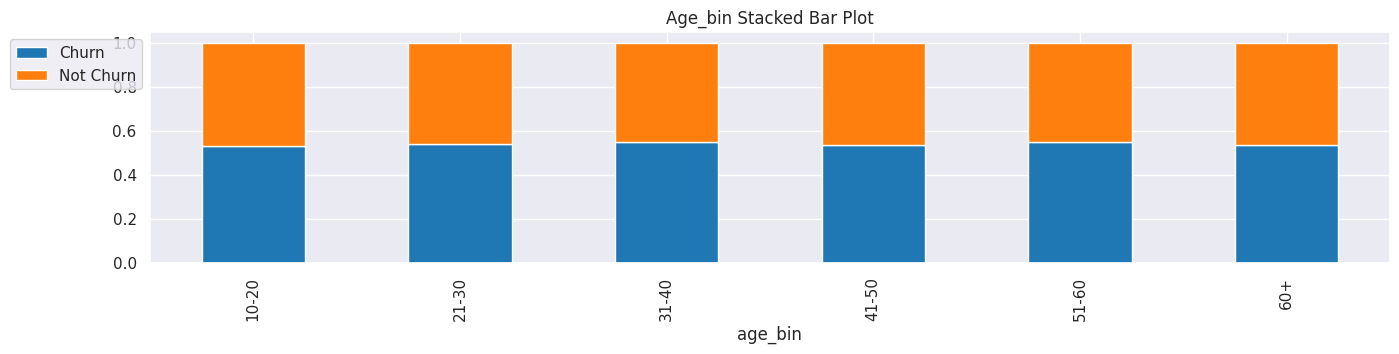

In [ ]:
# plot 'age_bin' vs 'churn_risk_score'
cat_view('age_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan berada di kelompok usia `10+ - 60 tahun`
- Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok usianya

#### Days Last Login Bin

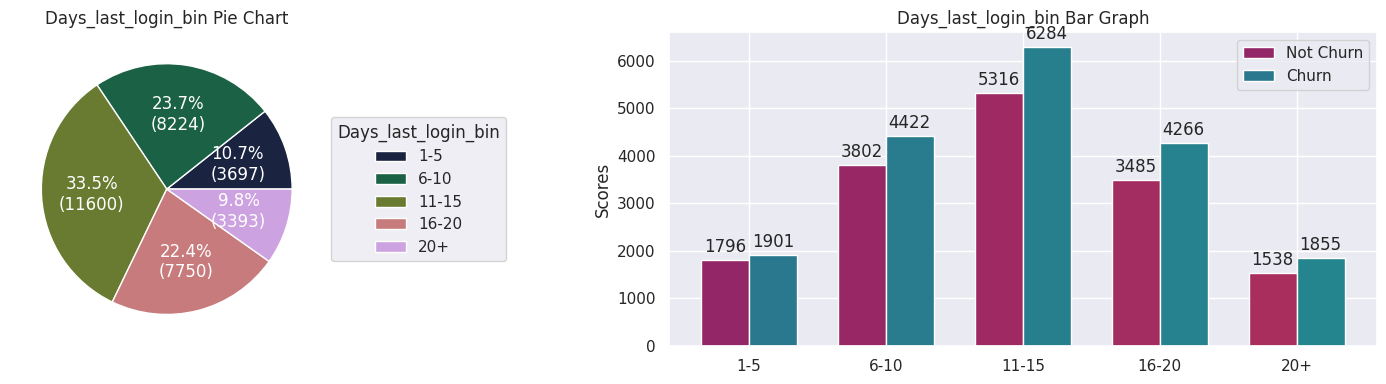

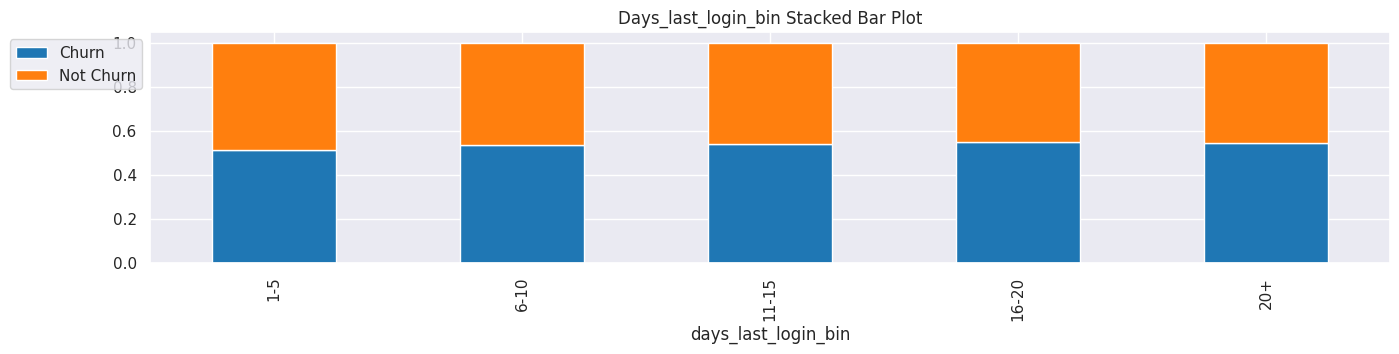

In [ ]:
# plot 'days_last_login_bin' vs 'churn_risk_score'
cat_view('days_last_login_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan terakhir masuk ke website selama `11-15 hari`
- Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok seberapa lama pelanggan terakhir masuk ke website

#### Average Time Spent Bin

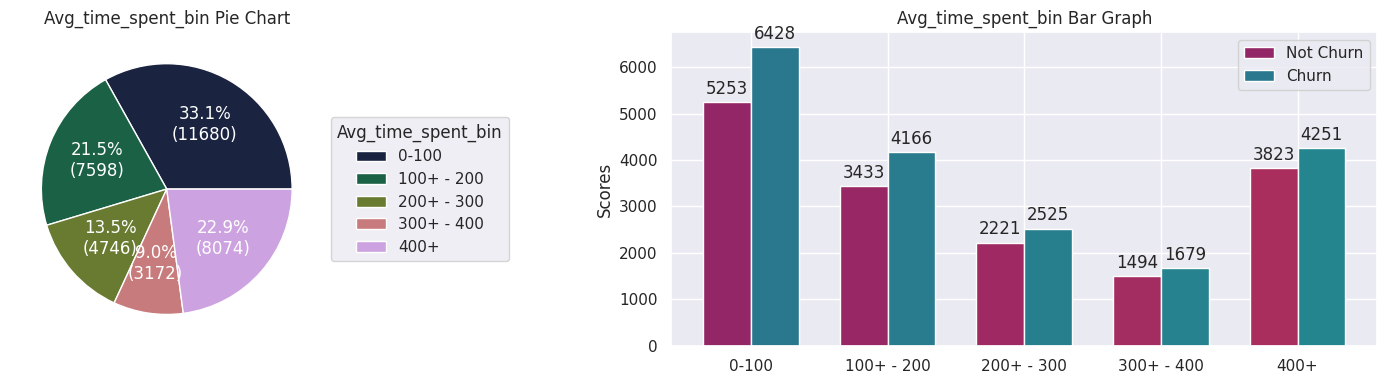

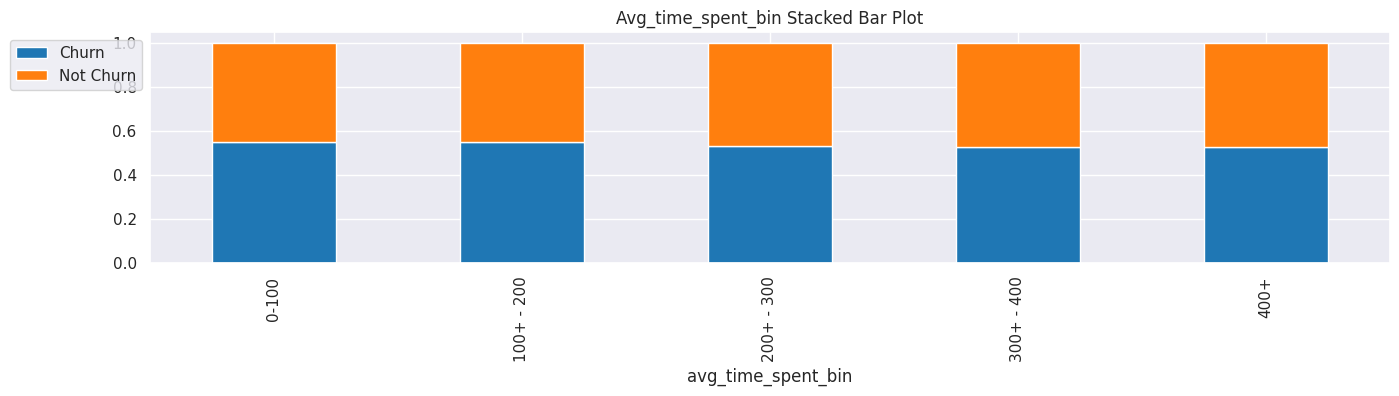

In [ ]:
# plot 'avg_time_spent_bin' vs 'churn_risk_score'
cat_view('avg_time_spent_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan menghabiskan waktu di website rata-rata `0-100 detik`
- Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok seberapa lama pelanggan menghabiskan waktu di website

#### Average Transaction Value Bin

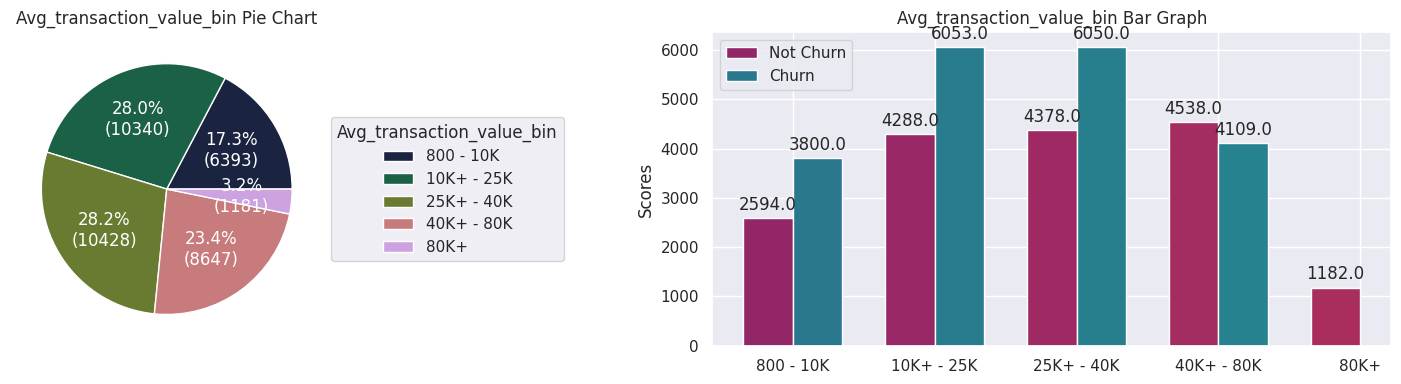

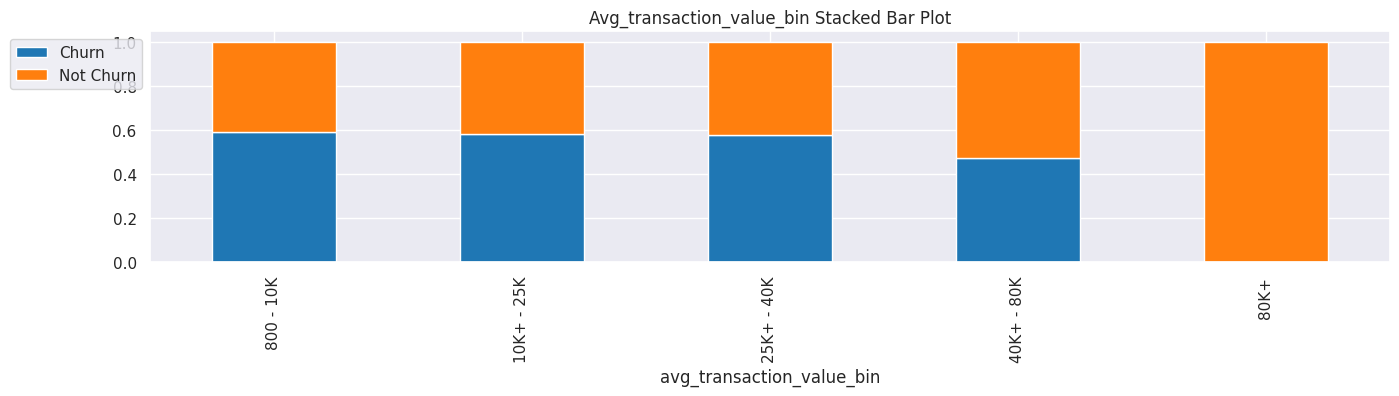

In [ ]:
# plot 'avg_transaction_value_bin' vs 'churn_risk_score'
cat_view('avg_transaction_value_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan memiliki nilai transaksi rata-rata `25K+ - 40K`
- Pelanggan dengan kelompok rata-rata transaksi sekitar `800 - 40K` cenderung lebih beresiko berhenti memakai produk

#### Average Frequency Login Days Bin

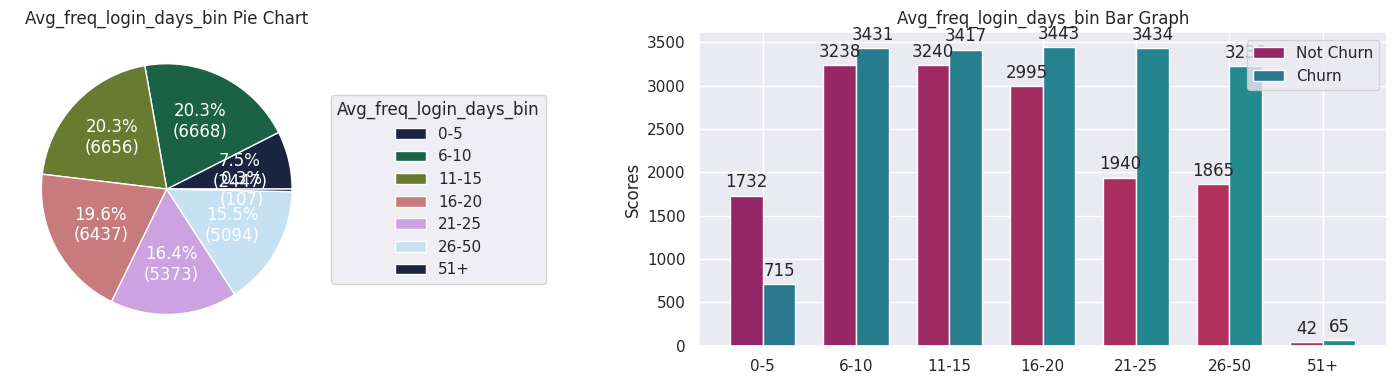

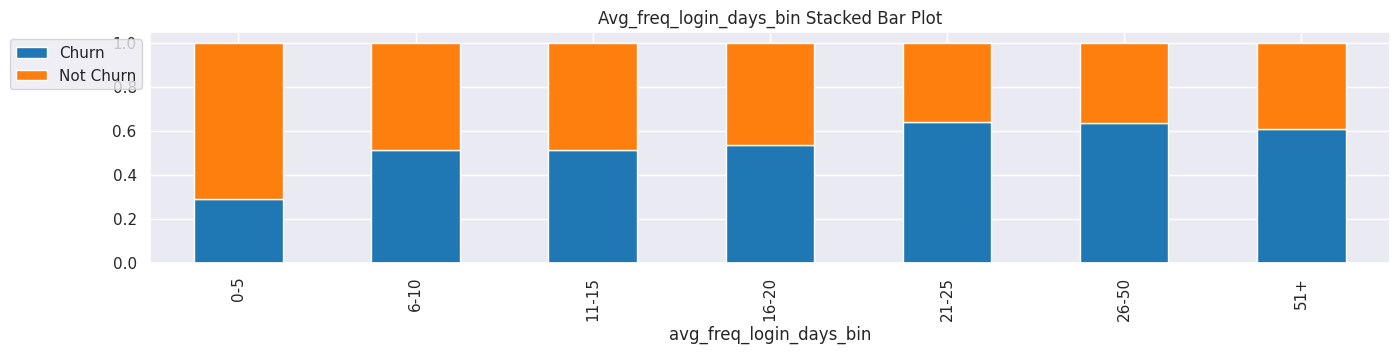

In [ ]:
# plot 'avg_freq_login_days_bin' vs 'churn_risk_score'
cat_view('avg_freq_login_days_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan sudah masuk ke website dengan frekuensi rata-rata `6-10`
- Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk

#### Points in Wallet Bin

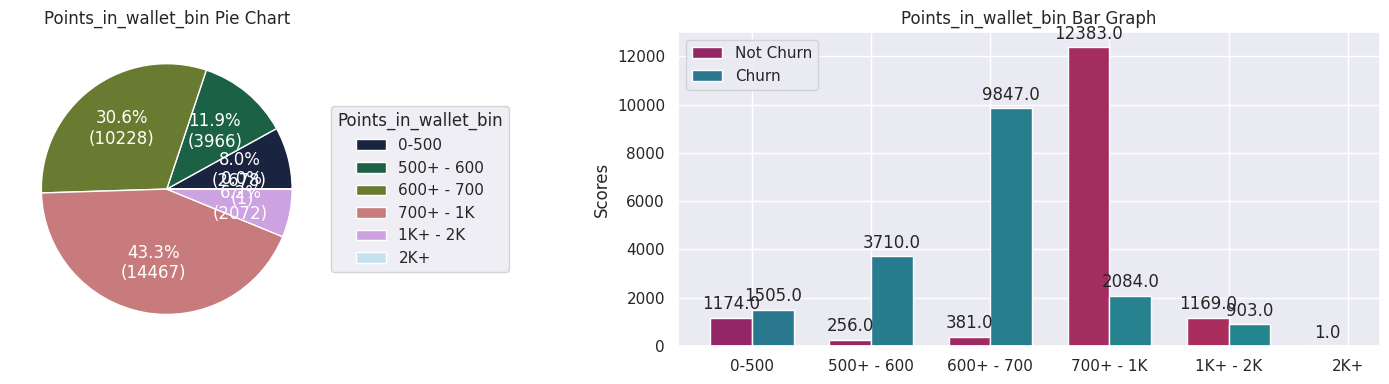

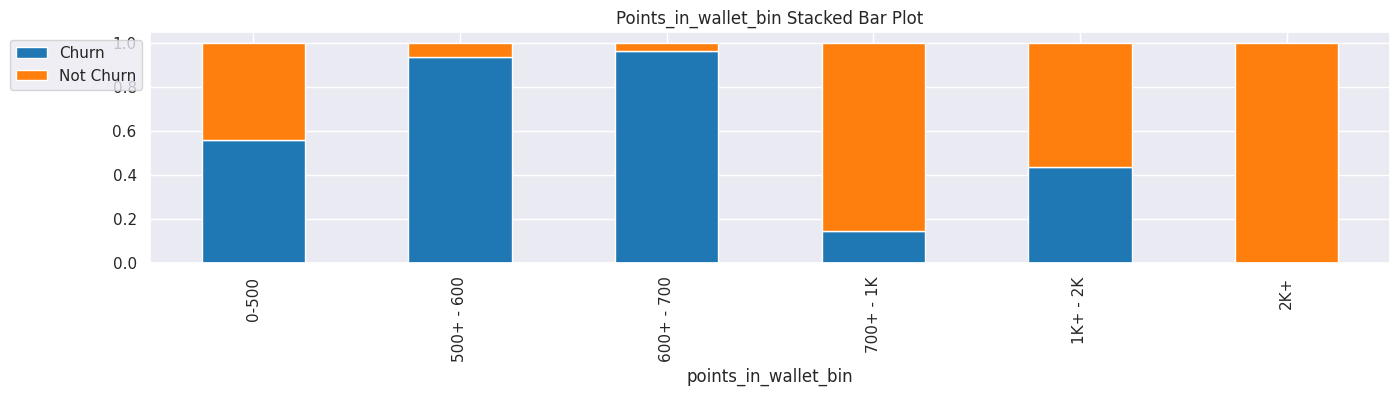

In [ ]:
# plot 'points_in_wallet_bin' vs 'churn_risk_score'
cat_view('points_in_wallet_bin', 'churn_risk_score')

Observasi:<br>
- Sebagian besar pelanggan memiliki point dari setiap transaksinya sebesar `700+ - 1K`
- Pelanggan dengan kelompok point sekitar `500+ - 700` cenderung lebih beresiko berhenti memakai produk

### Important features

Menurut analisis bivariat sejauh ini, variabel penting yang mungkin mempengaruhi kecenderungan pelanggan berhenti memakai produk, adalah:<br>
- Membership category
- Preferred offer types
- Average transaction value/Average transaction value bin
- Average frequency login days/Average frequency login days bin
- Points in wallet/ Points in wallet bin

## Multivariate analysis

### Heatmap to understand correlations between independent and dependent variables

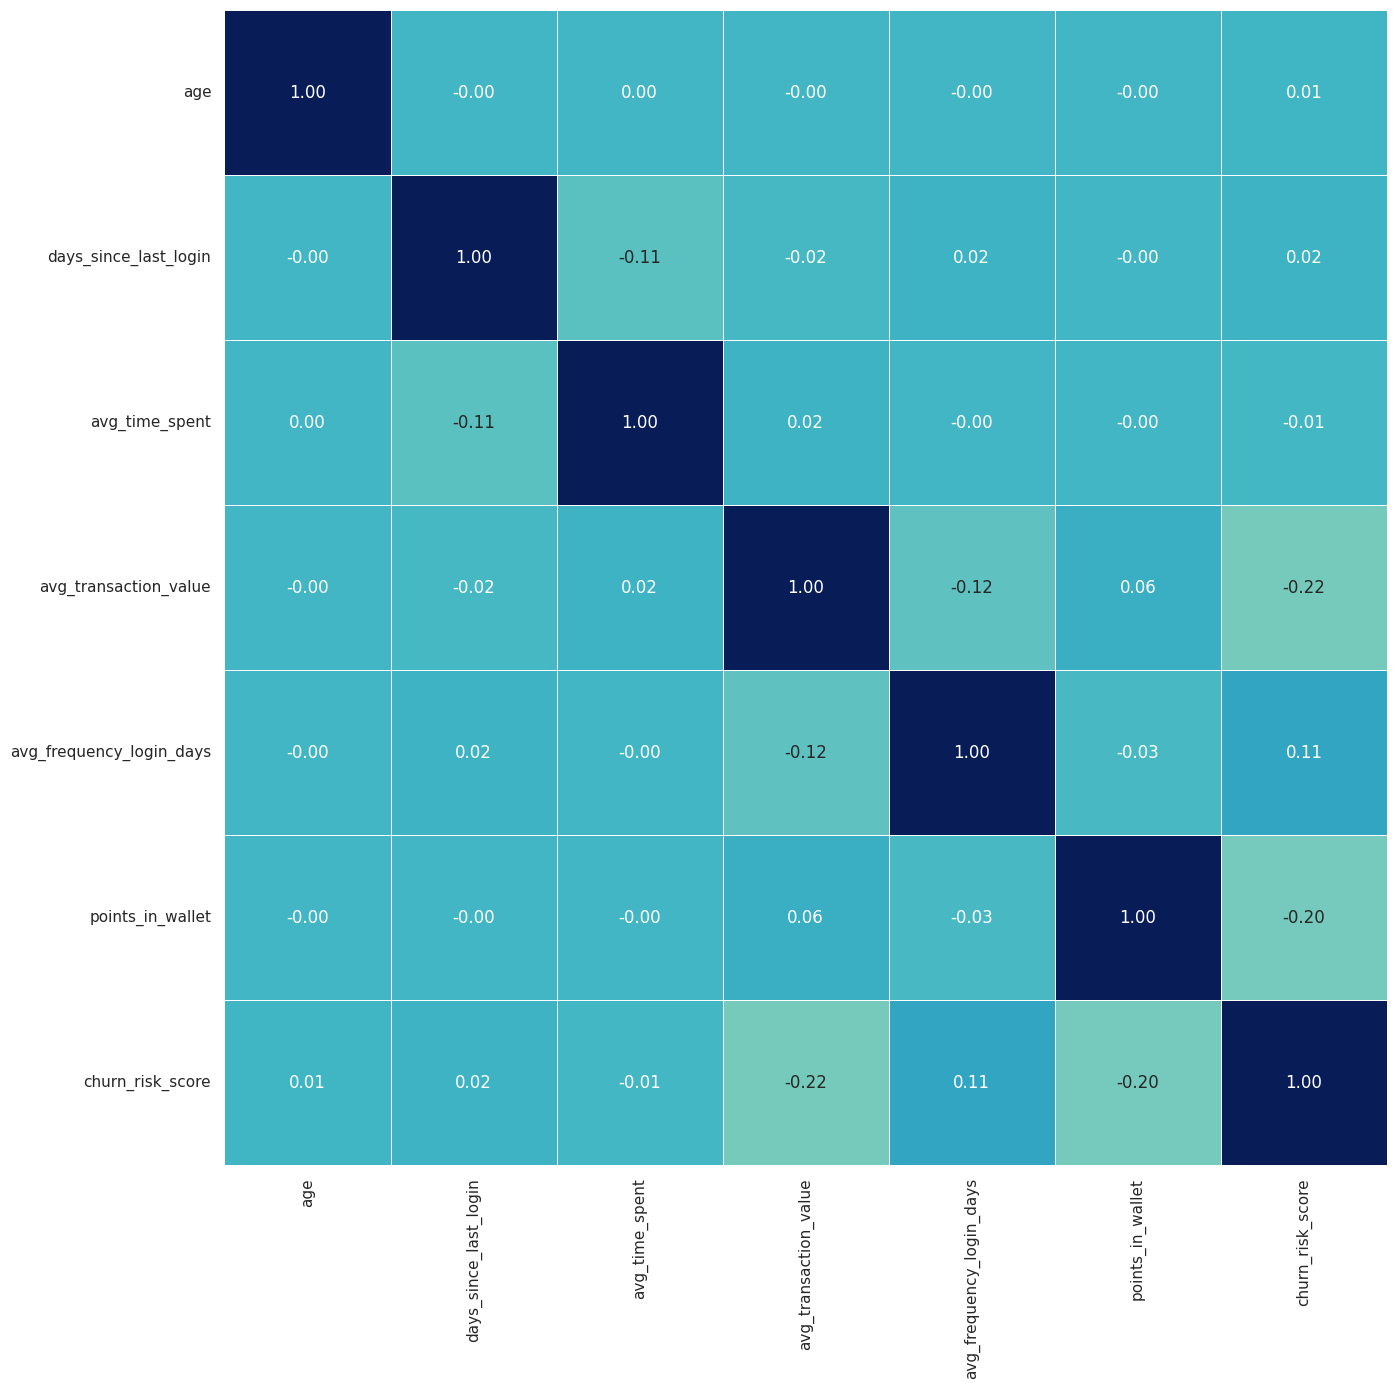

In [ ]:
# Plotting correlation heatmap of the features

sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df_churn.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

Observasi:<br>
- `avg_transaction_value`, `points_in_wallet`, dan `avg_frequency_login_days` yang memiliki hubungan yang cukup kuat dengan `churn_risk_score` dibandingkan variabel lainnya.

### Categorical variables vs. `avg_transaction_value` by Churn Risk Score

In [ ]:
# Function to plot numerical feature by each category with target hue

def plot_numeric_by_cat(category_columns: list, numeric_column: str, hue: str):
    '''
    The function plots a numerical feature in box plot by every category column specified in the list, 
    with hue of a target category
    '''
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(40, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="nipy_spectral");
        sns.boxplot(data=df_churn, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col + ' by ' + hue);

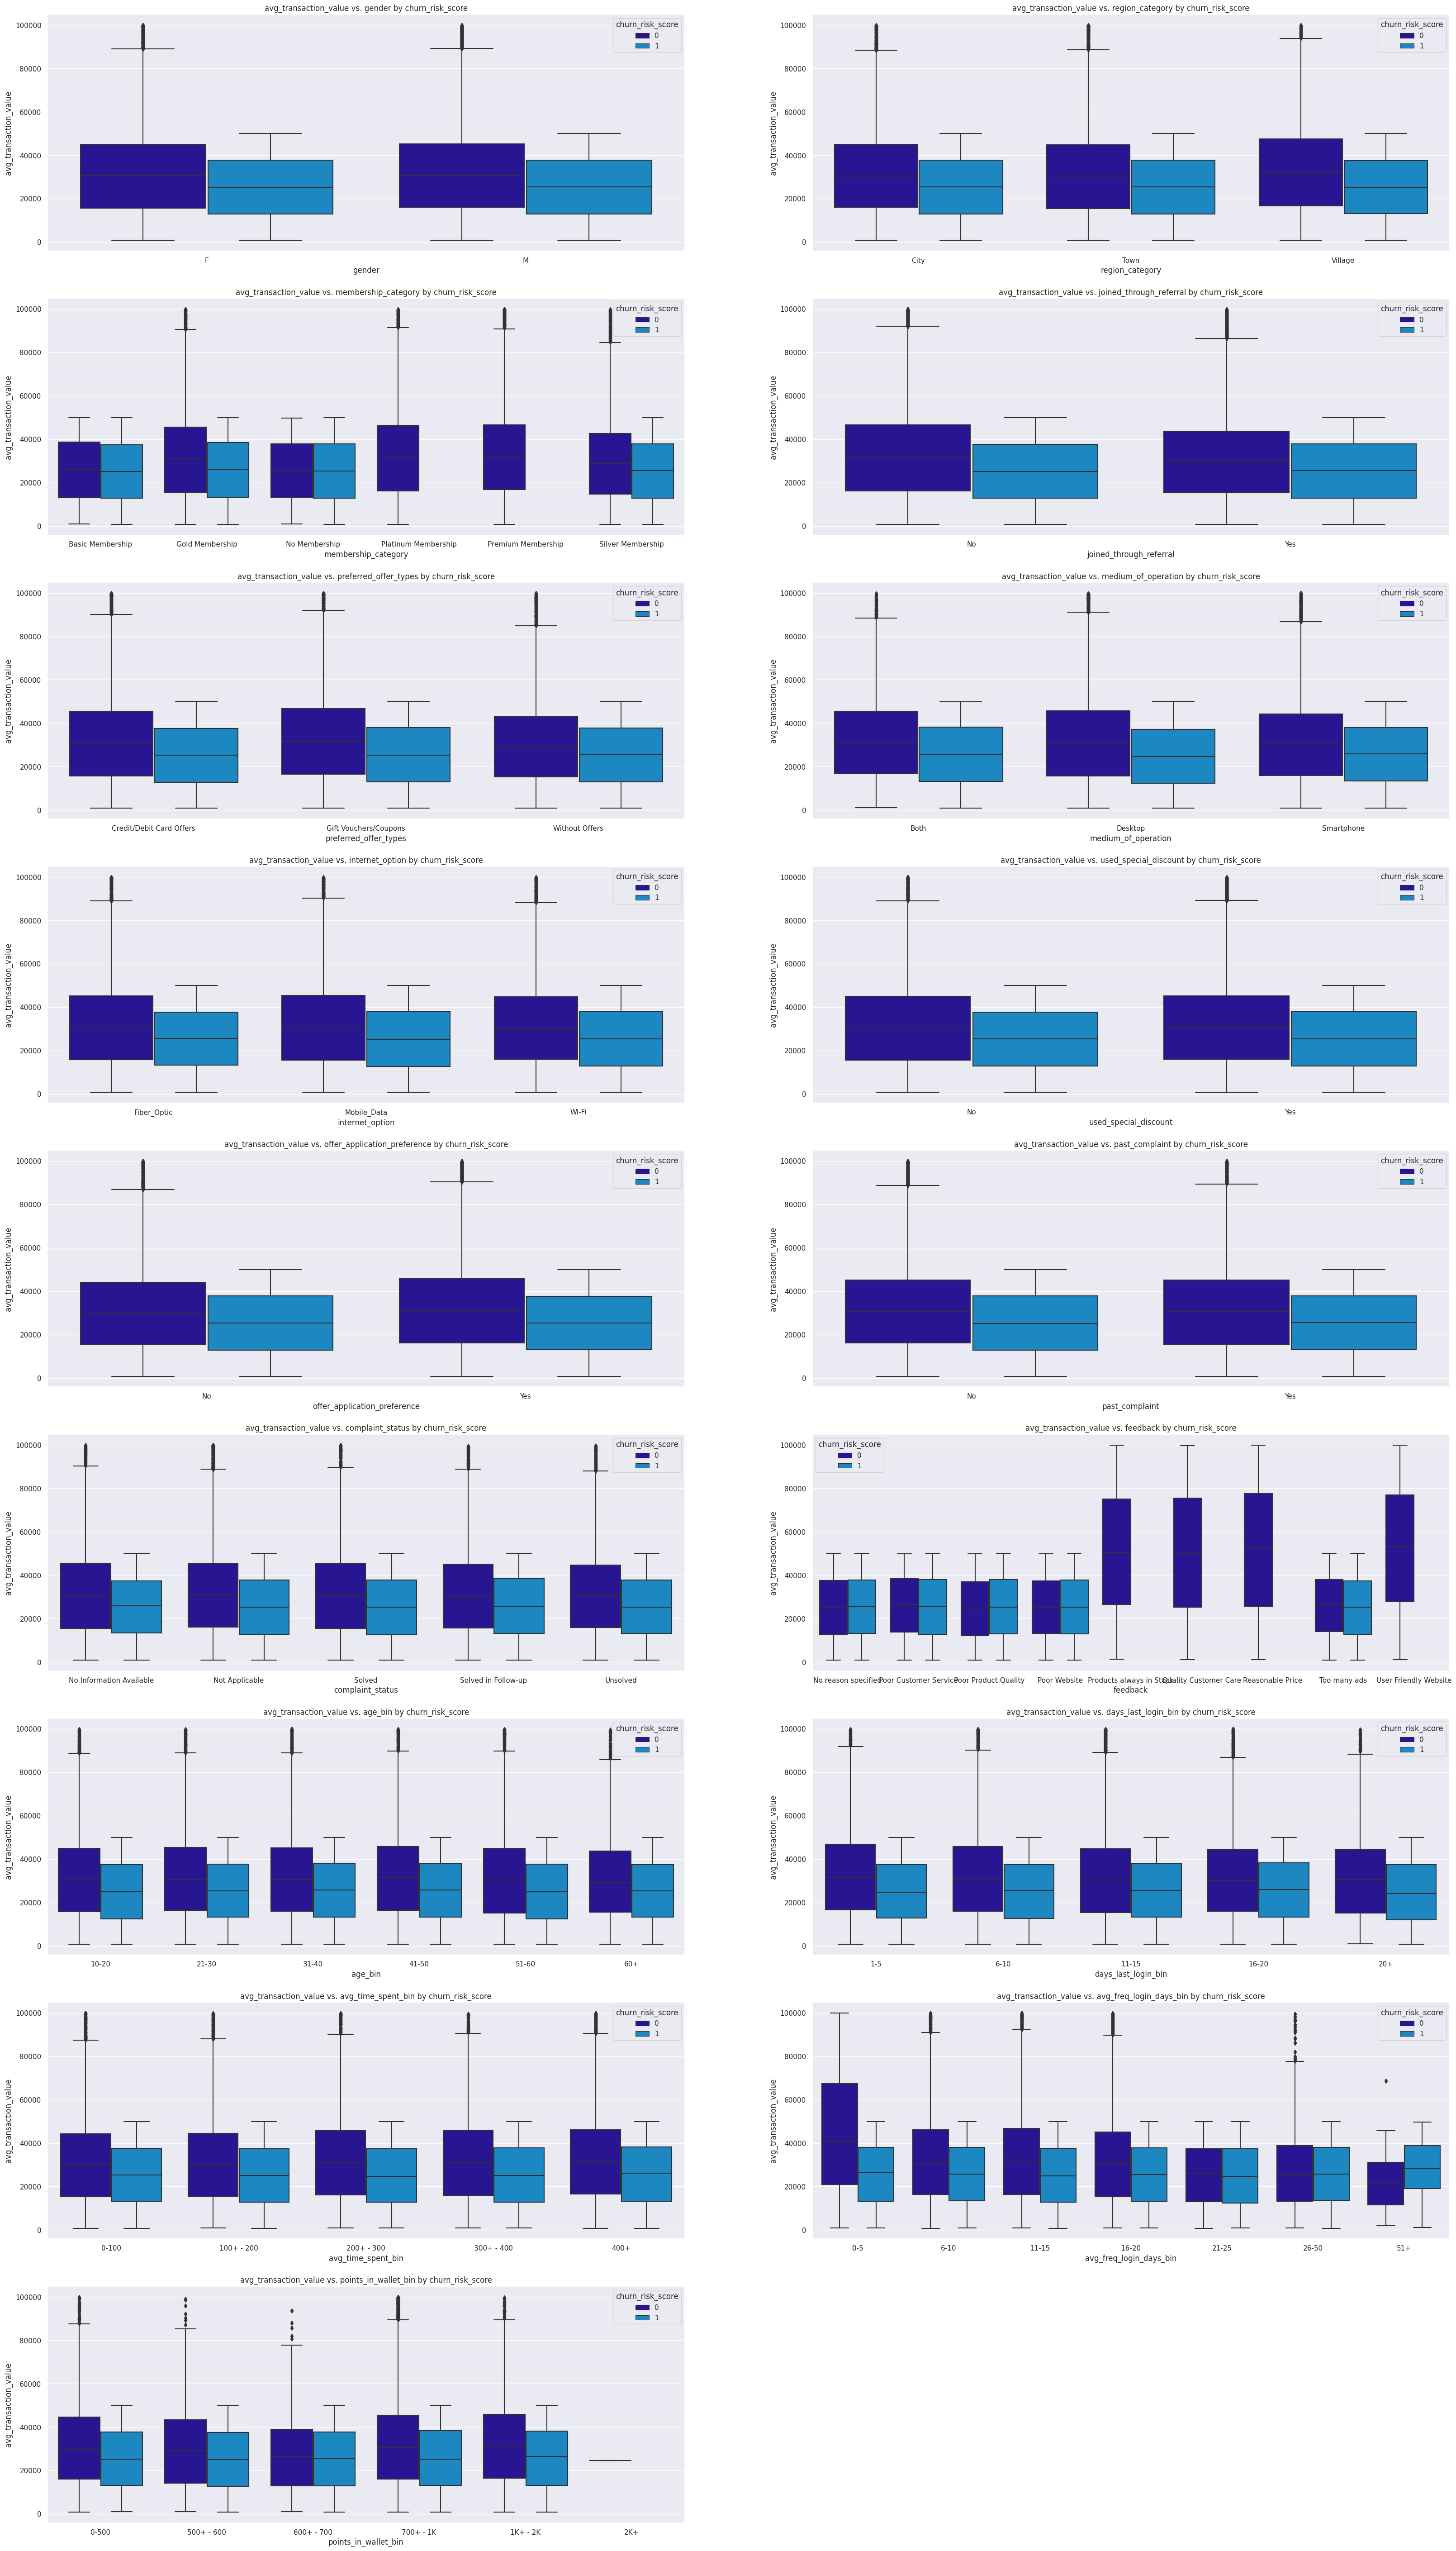

In [ ]:
# Categorical variables vs. avg_transaction_value by Churn Risk Score
category_columns = df_churn.select_dtypes(include='category').columns.tolist()
category_columns.remove('avg_transaction_value_bin')

plot_numeric_by_cat(category_columns, 'avg_transaction_value', 'churn_risk_score')

Observasi:<br>
- Secara keseluruhan, `semakin rendah rata-rata nilai transaksi`, maka `semakin besar kecenderungan untuk berhenti memakai produk yang ditawarkan`
- Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk dimana nilai transaksinya lebih rendah
- Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk yang nilai transaksinya lebih rendah
- Pelanggan dengan kelompok point sekitar `0 - 2K` cenderung lebih beresiko berhenti memakai produk dimana nilai transaksinya lebih rendah

### Categorical variables vs. `points_in_wallet` by Churn Risk Score

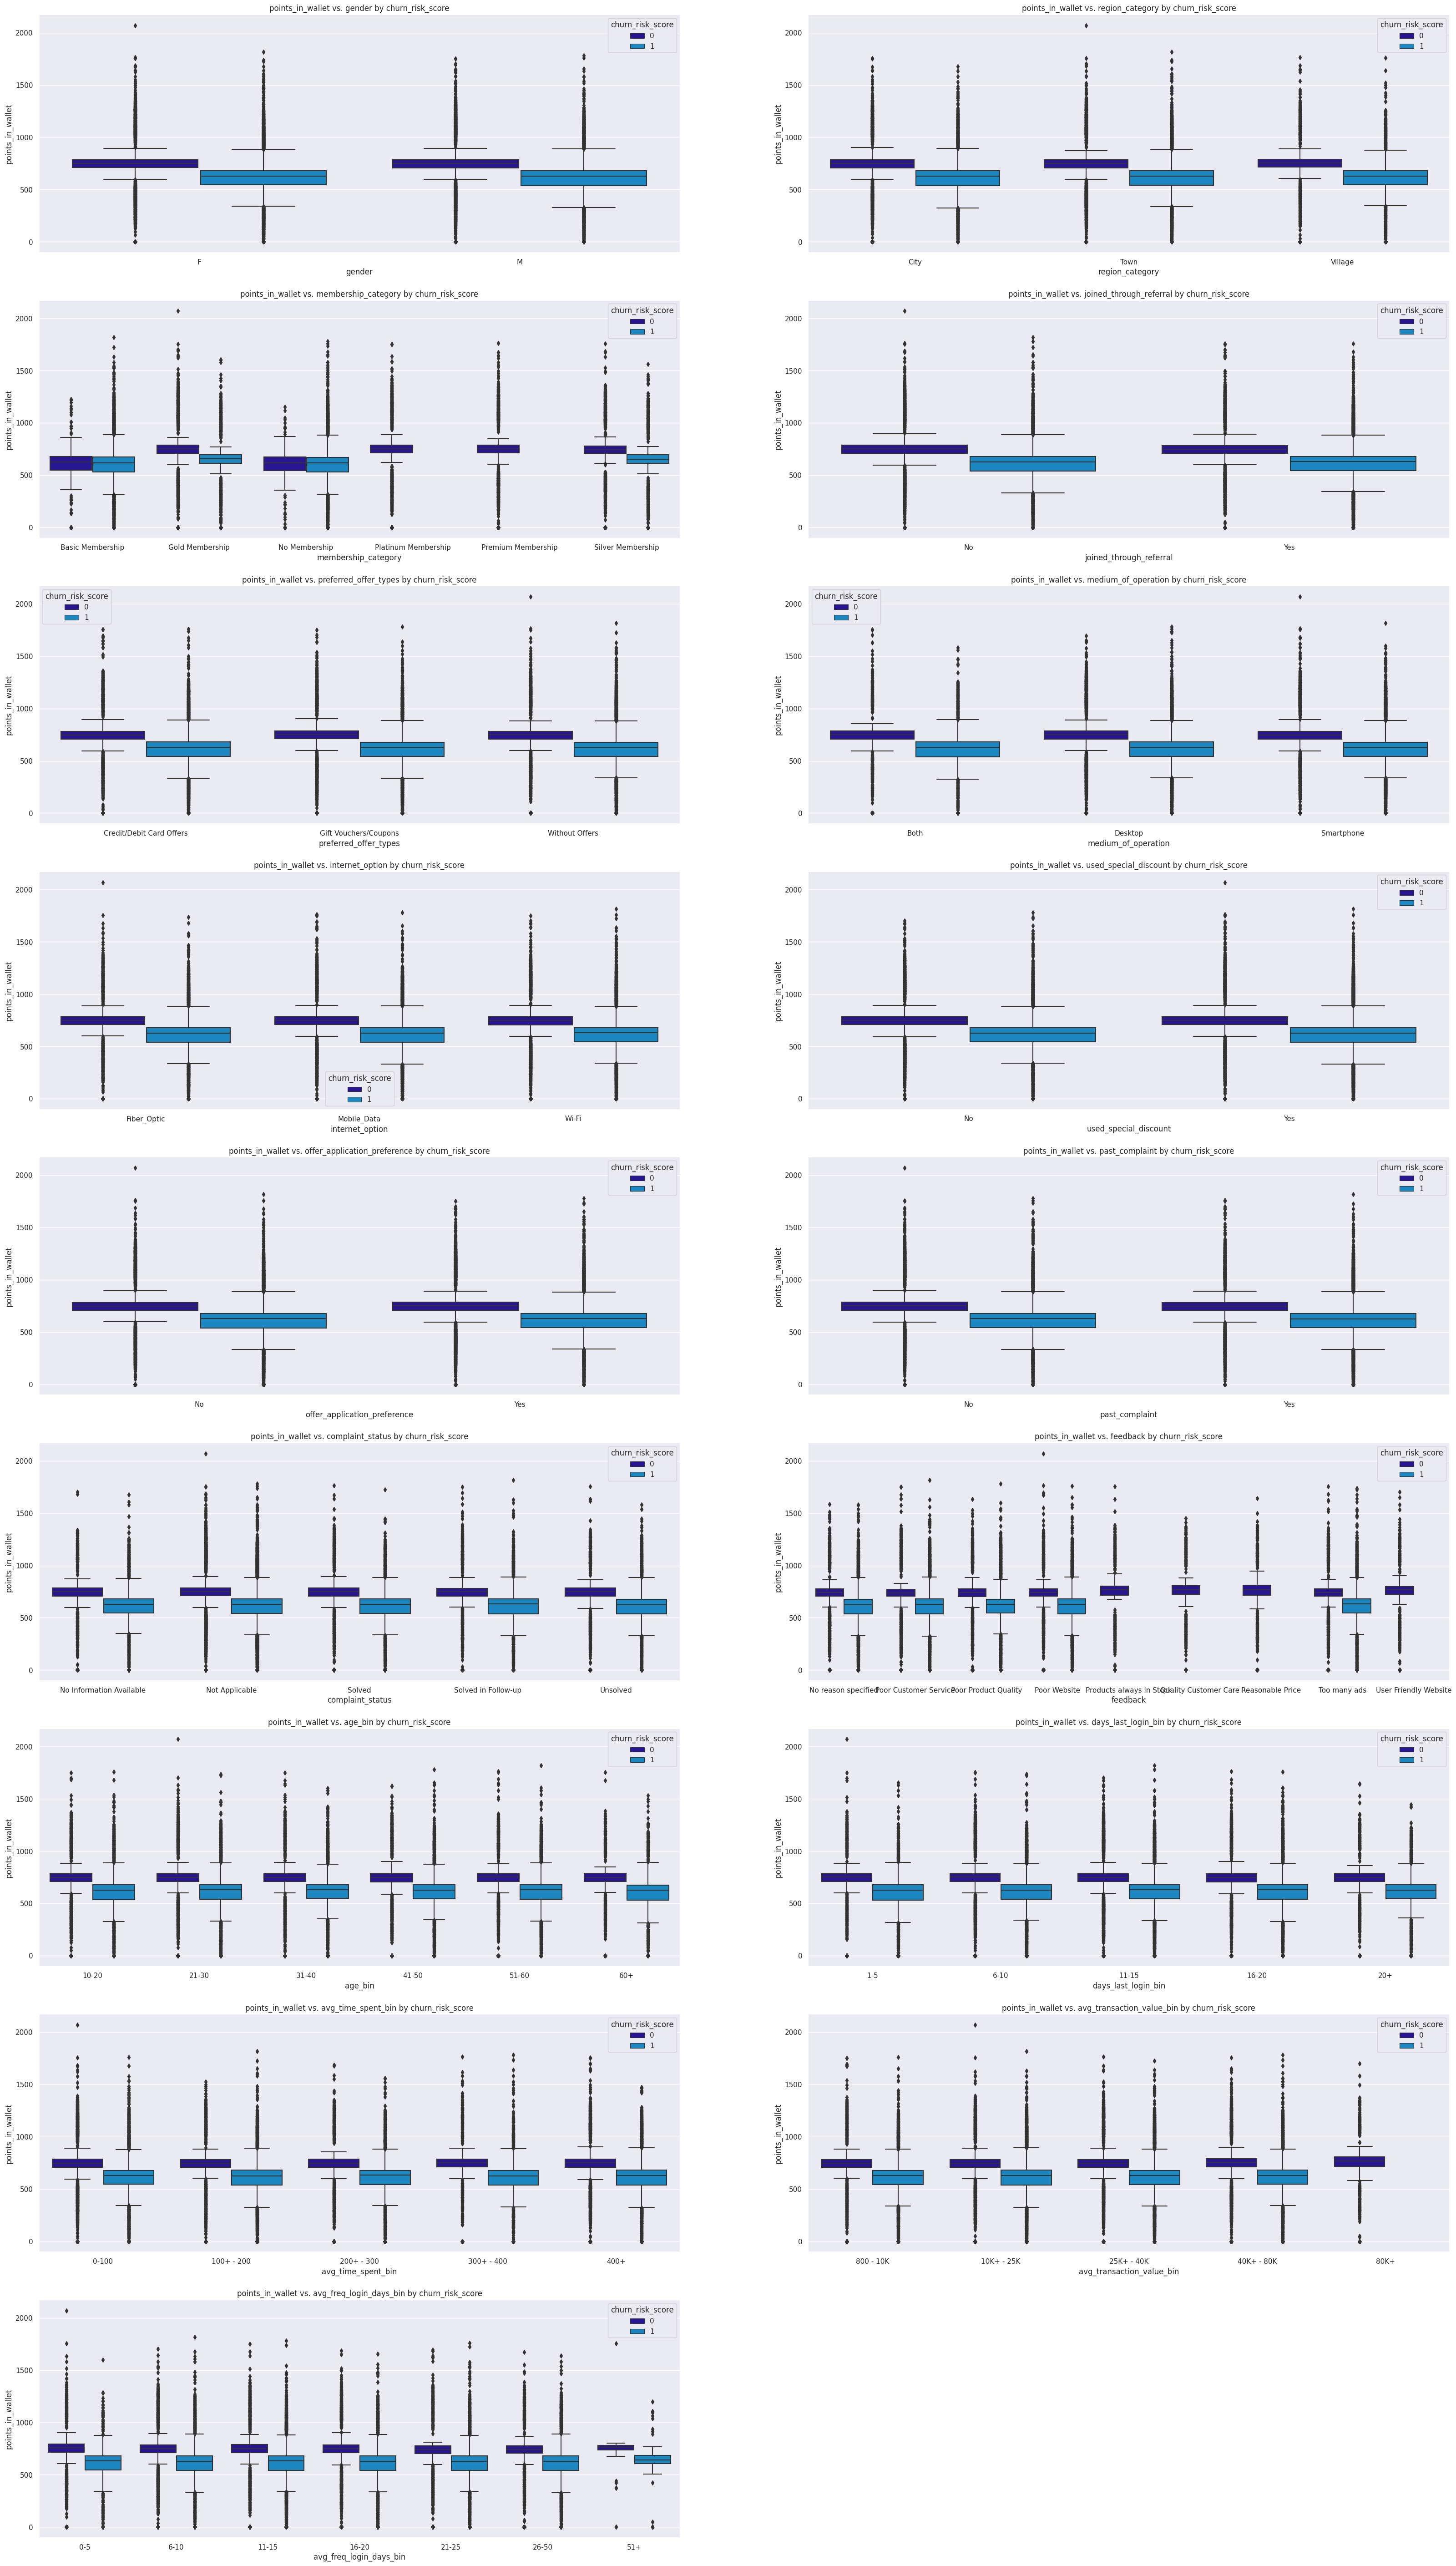

In [ ]:
# Categorical variables vs. points_in_wallet by Churn Risk Score
category_columns = df_churn.select_dtypes(include='category').columns.tolist()
category_columns.remove('points_in_wallet_bin')

plot_numeric_by_cat(category_columns, 'points_in_wallet', 'churn_risk_score')

Observasi:<br>
- Secara keseluruhan, `semakin rendah point yang dimiliki pelanggan`, maka `semakin besar kecenderungan untuk berhenti memakai produk yang ditawarkan`
- Pelanggan dengan kategori member seperti `Basic Membership` dan `No Membership` cenderung lebih beresiko berhenti memakai produk dimana pointnya lebih rendah
- Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah
- Pelanggan dengan rata-rata nilai transaksi `800 - 80K` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah
- Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah

## Customer Profiling for Churn

In [ ]:
# Creating a dataset out of the primary dataset for only the customers who churn

df_cust_churn = df_churn[df_churn['churn_risk_score'] == 1]

Untuk membuat `Profil Pelanggan` Saya akan melihat `produk yang ditawarkan` dari `setiap kategori` untuk menemukan pola.

### Count per Category for each type of internet option

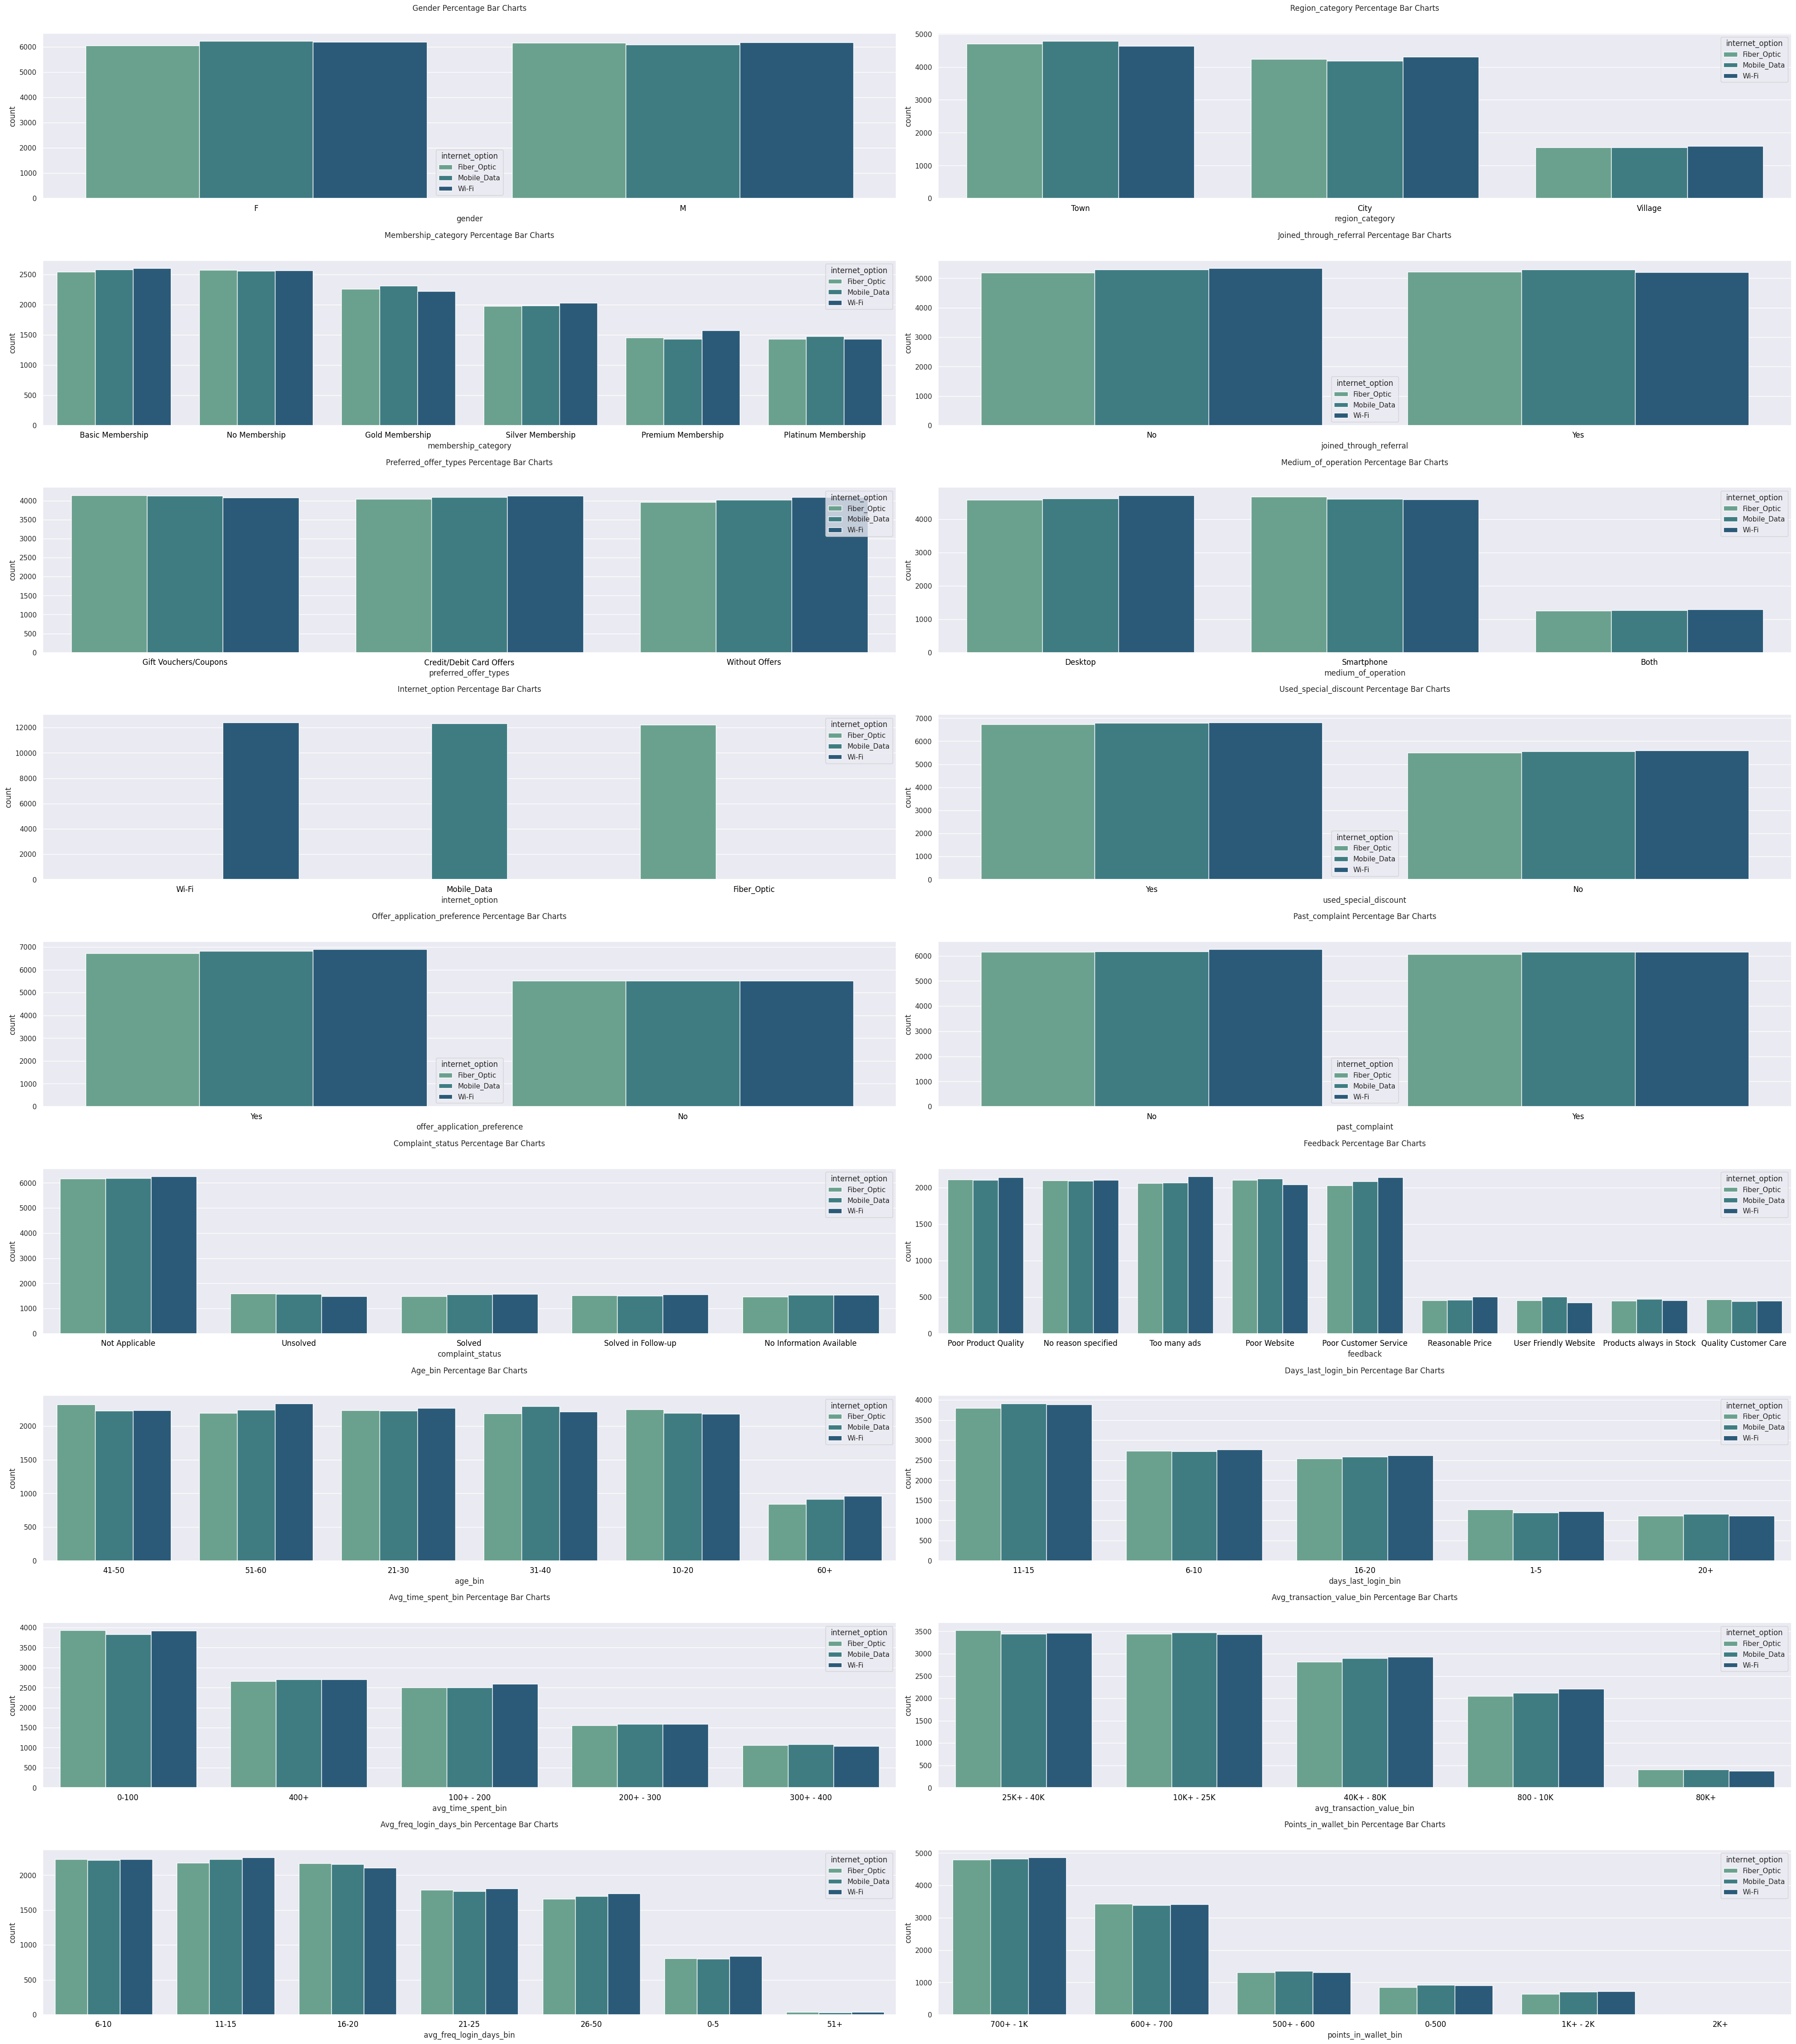

In [ ]:
# Count per Category for each type of product
category_columns = df_churn.select_dtypes(include='category').columns.tolist()
target_variable = 'internet_option'
perc_on_bar(df_churn, category_columns, 'internet_option', hue=target_variable, perc=False)

### Overall statistics for `Wi-Fi` product & based on EDA

In [ ]:
# Overall statistics for Wi-Fi product
df_cust_churn[df_cust_churn['internet_option']=='Wi-Fi'].describe(include='all').T

count unique                   top  freq  \
age                           6650.0    NaN                   NaN   NaN   
gender                          6641      2                     F  3332   
region_category                 5603      3                  Town  2465   
membership_category             6650      4      Basic Membership  2512   
joining_date                    6650   1095   2017-01-09 00:00:00    17   
joined_through_referral         5649      2                   Yes  2877   
preferred_offer_types           6592      3        Without Offers  2305   
medium_of_operation             5661      3            Smartphone  2518   
internet_option                 6650      1                 Wi-Fi  6650   
last_visit_time                 6650   6395   1900-01-01 09:37:41     3   
days_since_last_login         6251.0    NaN                   NaN   NaN   
avg_time_spent                6650.0    NaN                   NaN   NaN   
avg_transaction_value         6650.0    NaN                   NaN   NaN   
avg_frequency_login_days      6650.0    NaN                   NaN   NaN   
points_in_wallet              6650.0    NaN                   NaN   NaN   
used_special_discount           6650      2                   Yes  3635   
offer_application_preference    6650      2                   Yes  3616   
past_complaint                  6650      2                   Yes  3369   
complaint_status                6650      5        Not Applicable  3281   
feedback                        6650      5  Poor Product Quality  1407   
churn_risk_score              6650.0    NaN                   NaN   NaN   
age_bin                         6534      6                 51-60  1271   
days_last_login_bin             6194      5                 11-15  2069   
avg_time_spent_bin              6319      5                 0-100  2097   
avg_transaction_value_bin       6650      4            25K+ - 40K  1993   
avg_freq_login_days_bin         5900      7                 11-15  1177   
points_in_wallet_bin            6008      5            600+ - 700  3287   

                                           first                last  \
age                                          NaT                 NaT   
gender                                       NaT                 NaT   
region_category                              NaT                 NaT   
membership_category                          NaT                 NaT   
joining_date                 2015-01-01 00:00:00 2017-12-31 00:00:00   
joined_through_referral                      NaT                 NaT   
preferred_offer_types                        NaT                 NaT   
medium_of_operation                          NaT                 NaT   
internet_option                              NaT                 NaT   
last_visit_time              1900-01-01 00:00:04 1900-01-01 23:59:48   
days_since_last_login                        NaT                 NaT   
avg_time_spent                               NaT                 NaT   
avg_transaction_value                        NaT                 NaT   
avg_frequency_login_days                     NaT                 NaT   
points_in_wallet                             NaT                 NaT   
used_special_discount                        NaT                 NaT   
offer_application_preference                 NaT                 NaT   
past_complaint                               NaT                 NaT   
complaint_status                             NaT                 NaT   
feedback                                     NaT                 NaT   
churn_risk_score                             NaT                 NaT   
age_bin                                      NaT                 NaT   
days_last_login_bin                          NaT                 NaT   
avg_time_spent_bin                           NaT                 NaT   
avg_transaction_value_bin                    NaT                 NaT   
avg_freq_login_days_bin                      NaT          

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang memakai produk `Wi-Fi`:<br>
- `age_bin`: 51-60
- `gender`: Female
- `region_category`: Town
- `membership_category`: Basic Membership
- `joined_through_referral`: Yes
- `preferred_offer_types`: Without Offers
- `medium_of_operation`: Smartphone
- `used_special_discount`: Yes
- `offer_application_preference`: Yes
- `past_complaint`: Yes
- `complaint_status`: Not Applicable
- `feedback`: Poor Product Quality
- `days_last_login_bin`: 11-15
- `avg_time_spent_bin`: 0-100
- `avg_transaction_value_bin`: 25K+ - 40K
- `avg_freq_login_days_bin`: 11-15
- `points_in_wallet_bin`: 600+ - 700

### Overall statistics for `Mobile_Data` product & based on EDA

In [ ]:
# Overall statistics for Mobile_Data product
df_cust_churn[df_cust_churn['internet_option']=='Mobile_Data'].describe(include='all').T

count unique                   top  freq  \
age                           6695.0    NaN                   NaN   NaN   
gender                          6686      2                     F  3397   
region_category                 5730      3                  Town  2597   
membership_category             6695      4      Basic Membership  2500   
joining_date                    6695   1095   2016-09-05 00:00:00    15   
joined_through_referral         5717      2                   Yes  2963   
preferred_offer_types           6641      3        Without Offers  2307   
medium_of_operation             5702      3            Smartphone  2562   
internet_option                 6695      1           Mobile_Data  6695   
last_visit_time                 6695   6432   1900-01-01 21:51:48     3   
days_since_last_login         6324.0    NaN                   NaN   NaN   
avg_time_spent                6695.0    NaN                   NaN   NaN   
avg_transaction_value         6695.0    NaN                   NaN   NaN   
avg_frequency_login_days      6695.0    NaN                   NaN   NaN   
points_in_wallet              6695.0    NaN                   NaN   NaN   
used_special_discount           6695      2                   Yes  3637   
offer_application_preference    6695      2                   Yes  3648   
past_complaint                  6695      2                   Yes  3364   
complaint_status                6695      5        Not Applicable  3331   
feedback                        6695      5  Poor Product Quality  1363   
churn_risk_score              6695.0    NaN                   NaN   NaN   
age_bin                         6571      6                 31-40  1256   
days_last_login_bin             6269      5                 11-15  2147   
avg_time_spent_bin              6350      5                 0-100  2140   
avg_transaction_value_bin       6695      4            10K+ - 25K  2030   
avg_freq_login_days_bin         5921      7                 16-20  1166   
points_in_wallet_bin            6054      5            600+ - 700  3263   

                                           first                last  \
age                                          NaT                 NaT   
gender                                       NaT                 NaT   
region_category                              NaT                 NaT   
membership_category                          NaT                 NaT   
joining_date                 2015-01-01 00:00:00 2017-12-31 00:00:00   
joined_through_referral                      NaT                 NaT   
preferred_offer_types                        NaT                 NaT   
medium_of_operation                          NaT                 NaT   
internet_option                              NaT                 NaT   
last_visit_time              1900-01-01 00:00:02 1900-01-01 23:59:59   
days_since_last_login                        NaT                 NaT   
avg_time_spent                               NaT                 NaT   
avg_transaction_value                        NaT                 NaT   
avg_frequency_login_days                     NaT                 NaT   
points_in_wallet                             NaT                 NaT   
used_special_discount                        NaT                 NaT   
offer_application_preference                 NaT                 NaT   
past_complaint                               NaT                 NaT   
complaint_status                             NaT                 NaT   
feedback                                     NaT                 NaT   
churn_risk_score                             NaT                 NaT   
age_bin                                      NaT                 NaT   
days_last_login_bin                          NaT                 NaT   
avg_time_spent_bin                           NaT                 NaT   
avg_transaction_value_bin                    NaT                 NaT   
avg_freq_login_days_bin                      NaT          

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang memakai produk `Mobile_Data`:<br>
- `age_bin`: 31-40
- `gender`: Female
- `region_category`: Town
- `membership_category`: Basic Membership
- `joined_through_referral`: Yes
- `preferred_offer_types`: Without Offers
- `medium_of_operation`: Smartphone
- `used_special_discount`: Yes
- `offer_application_preference`: Yes
- `past_complaint`: Yes
- `complaint_status`: Not Applicable
- `feedback`: Poor Product Quality
- `days_last_login_bin`: 11-15
- `avg_time_spent_bin`: 0-100
- `avg_transaction_value_bin`: 10K+ - 25K
- `avg_freq_login_days_bin`: 16-20
- `points_in_wallet_bin`: 600+ - 700

### Overall statistics for `Fiber_Optic` product & based on EDA

In [ ]:
# Overall statistics for Fiber_Optic product
df_cust_churn[df_cust_churn['internet_option']=='Fiber_Optic'].describe(include='all').T

count unique                   top  freq  \
age                           6667.0    NaN                   NaN   NaN   
gender                          6656      2                     M  3336   
region_category                 5700      3                  Town  2596   
membership_category             6667      4         No Membership  2481   
joining_date                    6667   1094   2017-05-11 00:00:00    14   
joined_through_referral         5660      2                   Yes  2923   
preferred_offer_types           6622      3        Without Offers  2266   
medium_of_operation             5699      3            Smartphone  2583   
internet_option                 6667      1           Fiber_Optic  6667   
last_visit_time                 6667   6399   1900-01-01 00:28:28     3   
days_since_last_login         6328.0    NaN                   NaN   NaN   
avg_time_spent                6667.0    NaN                   NaN   NaN   
avg_transaction_value         6667.0    NaN                   NaN   NaN   
avg_frequency_login_days      6667.0    NaN                   NaN   NaN   
points_in_wallet              6667.0    NaN                   NaN   NaN   
used_special_discount           6667      2                   Yes  3635   
offer_application_preference    6667      2                   Yes  3622   
past_complaint                  6667      2                    No  3369   
complaint_status                6667      5        Not Applicable  3369   
feedback                        6667      5  Poor Product Quality  1357   
churn_risk_score              6667.0    NaN                   NaN   NaN   
age_bin                         6557      6                 21-30  1248   
days_last_login_bin             6265      5                 11-15  2068   
avg_time_spent_bin              6380      5                 0-100  2191   
avg_transaction_value_bin       6667      4            25K+ - 40K  2081   
avg_freq_login_days_bin         5914      7                  6-10  1185   
points_in_wallet_bin            5987      5            600+ - 700  3297   

                                           first                last  \
age                                          NaT                 NaT   
gender                                       NaT                 NaT   
region_category                              NaT                 NaT   
membership_category                          NaT                 NaT   
joining_date                 2015-01-01 00:00:00 2017-12-31 00:00:00   
joined_through_referral                      NaT                 NaT   
preferred_offer_types                        NaT                 NaT   
medium_of_operation                          NaT                 NaT   
internet_option                              NaT                 NaT   
last_visit_time              1900-01-01 00:00:40 1900-01-01 23:59:56   
days_since_last_login                        NaT                 NaT   
avg_time_spent                               NaT                 NaT   
avg_transaction_value                        NaT                 NaT   
avg_frequency_login_days                     NaT                 NaT   
points_in_wallet                             NaT                 NaT   
used_special_discount                        NaT                 NaT   
offer_application_preference                 NaT                 NaT   
past_complaint                               NaT                 NaT   
complaint_status                             NaT                 NaT   
feedback                                     NaT                 NaT   
churn_risk_score                             NaT                 NaT   
age_bin                                      NaT                 NaT   
days_last_login_bin                          NaT                 NaT   
avg_time_spent_bin                           NaT                 NaT   
avg_transaction_value_bin                    NaT                 NaT   
avg_freq_login_days_bin                      NaT          

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang memakai produk `Fiber_Optic`:<br>
- `age_bin`: 21-30
- `gender`: Male
- `region_category`: Town
- `membership_category`: No Membership
- `joined_through_referral`: Yes
- `preferred_offer_types`: Without Offers
- `medium_of_operation`: Smartphone
- `used_special_discount`: Yes
- `offer_application_preference`: Yes
- `past_complaint`: No
- `complaint_status`: Not Applicable
- `feedback`: Poor Product Quality
- `days_last_login_bin`: 11-15
- `avg_time_spent_bin`: 0-100
- `avg_transaction_value_bin`: 25K+ - 40K
- `avg_freq_login_days_bin`: 6-10
- `points_in_wallet_bin`: 600+ - 700



## Columns to be dropped

- Berdasarkan *personal judgement*, kolom `joining_date` tidak ada hubungannya dengan resiko pelanggan yang churn. Begitu juga dengan kolom `last_visit_time`.
- `age_bin`, `days_last_login_bin`, `avg_time_spent_bin`, `avg_transaction_value_bin`, `avg_freq_login_days_bin`, `points_in_wallet_bin` akan dihapus juga karena ini digunakan untuk membantu proses EDA saja.

# v. Feature Engineering

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model.

Feature Engineering yang dilakukan adalah:

1. Mengambil data untuk model inference
2. Memisahkan antara X (Features) and y (Target)
3. Memisahkan antara Train-Set, Val-Set dan Test-Set
4. Feature Selection analysis
5. Melakukan Dropping kolom yang tidak digunakan untuk membuat model
6. Mendeteksi dan Handling data Outlier
7. Handling Missing Values
8. Memisahkan antara kolom Numerikal dan kolom Kategorikal
9. Feature Scaling
10. Feature Encoding
11. Melakukan `bundle preprocessing` (Pipeline) untuk data numerikal dan kategorikal menggunakan `ColumnTransformer`
12. Input Tensorflow Pipeline 

## Mengambil data untuk Model Inference

In [ ]:
# First building a copy dataset so that if required we can re-visit and re-execute some parts of the EDA 
# without running the whole notebook 

df_churn_risk = df_churn.copy()

In [ ]:
# Retrieving sample data for Model Inference

df_inf = df_churn_risk.sample(10, random_state=178234)
df_inf

age gender region_category membership_category joining_date  \
30015   29      M             NaN   Silver Membership   2016-02-16   
21893   38      F            Town  Premium Membership   2017-10-23   
10947   35      M            City     Gold Membership   2015-03-26   
15871   25      M            City       No Membership   2017-12-13   
14335   42      M         Village    Basic Membership   2017-04-11   
7132    32      M            Town     Gold Membership   2016-03-14   
29885   60      M             NaN     Gold Membership   2016-03-24   
19148   16      F            City    Basic Membership   2017-04-13   
7929    46      F            City       No Membership   2017-09-30   
13570   54      M            City    Basic Membership   2015-03-03   

      joined_through_referral     preferred_offer_types medium_of_operation  \
30015                      No  Credit/Debit Card Offers             Desktop   
21893                      No     Gift Vouchers/Coupons                Both   
10947                      No            Without Offers                Both   
15871                     NaN     Gift Vouchers/Coupons                 NaN   
14335                     NaN            Without Offers             Desktop   
7132                      Yes  Credit/Debit Card Offers                Both   
29885                     Yes                       NaN             Desktop   
19148                      No            Without Offers             Desktop   
7929                      Yes  Credit/Debit Card Offers          Smartphone   
13570                     Yes  Credit/Debit Card Offers          Smartphone   

      internet_option     last_visit_time  days_since_last_login  \
30015     Fiber_Optic 1900-01-01 15:45:40                    8.0   
21893     Fiber_Optic 1900-01-01 00:18:18                   14.0   
10947     Fiber_Optic 1900-01-01 23:40:39                   17.0   
15871     Mobile_Data 1900-01-01 12:29:33                   11.0   
14335     Fiber_Optic 1900-01-01 08:39:44                    5.0   
7132      Mobile_Data 1900-01-01 08:20:53                    5.0   
29885           Wi-Fi 1900-01-01 12:45:32                   13.0   
19148     Mobile_Data 1900-01-01 17:01:21                   19.0   
7929            Wi-Fi 1900-01-01 16:34:23                   24.0   
13570     Mobile_Data 1900-01-01 09:52:50                    NaN   

       avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
30015          334.55               48523.56                      14.0   
21893          294.47               34862.73                       4.0   
10947          219.13               70247.76                       3.0   
15871          206.97               11178.99                      22.0   
14335          745.57               18074.30                      11.0   
7132           213.45               43547.33                       8.0   
29885          167.42                7821.78                      25.0   
19148           78.80               36702.10                      21.0   
7929           135.31               14597.55                      17.0   
13570          225.95               30020.72                      15.0   

       points_in_wallet used_special_discount offer_application_preference  \
30015        788.580000                   Yes                           No   
21893        772.620000                   Yes                          Yes   
10947       1293.169381                   Yes                          Yes   
15871        184.775450                    No                          Yes   
14335        631.880000                   Yes                          Yes   
7132         793.350000                    No                          Yes   
29885        302.528047                   Yes                           No   
19148        626.370000                   Yes                           No   
7929         585.230000                   Yes                           No   
13570        961.05580

In [ ]:
# Drop the Inference-Set data in the dataset

df_train_test = df_churn_risk.drop(df_inf.index)
df_train_test

age gender region_category membership_category joining_date  \
0       29      F             NaN       No Membership   2017-04-05   
1       50      M             NaN    Basic Membership   2017-03-31   
2       26      F            City   Silver Membership   2017-02-11   
3       63      F         Village       No Membership   2015-12-23   
4       64      M            Town   Silver Membership   2015-03-20   
...    ...    ...             ...                 ...          ...   
37005   36      M            Town     Gold Membership   2015-03-05   
37006   27      F            City     Gold Membership   2017-01-15   
37007   20      M             NaN     Gold Membership   2015-07-11   
37008   38      F            City     Gold Membership   2016-05-25   
37009   36      M            Town     Gold Membership   2016-10-18   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                         Yes            Without Offers                 NaN   
1                         Yes            Without Offers             Desktop   
2                         NaN  Credit/Debit Card Offers                 NaN   
3                          No  Credit/Debit Card Offers             Desktop   
4                         NaN     Gift Vouchers/Coupons          Smartphone   
...                       ...                       ...                 ...   
37005                     NaN  Credit/Debit Card Offers                 NaN   
37006                     Yes            Without Offers             Desktop   
37007                     Yes            Without Offers                 NaN   
37008                     Yes            Without Offers             Desktop   
37009                     NaN            Without Offers                Both   

      internet_option     last_visit_time  days_since_last_login  \
0               Wi-Fi 1900-01-01 22:29:49                    4.0   
1         Fiber_Optic 1900-01-01 15:44:56                   11.0   
2         Fiber_Optic 1900-01-01 20:31:53                    8.0   
3         Fiber_Optic 1900-01-01 14:28:05                   10.0   
4               Wi-Fi 1900-01-01 04:16:48                    9.0   
...               ...                 ...                    ...   
37005     Fiber_Optic 1900-01-01 09:32:50                   15.0   
37006           Wi-Fi 1900-01-01 02:28:52                   15.0   
37007     Mobile_Data 1900-01-01 17:50:38                   13.0   
37008           Wi-Fi 1900-01-01 17:07:57                    NaN   
37009     Fiber_Optic 1900-01-01 03:50:49                    3.0   

       avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
0         1184.490000               38604.69                      10.0   
1          338.150000                7665.66                      17.0   
2          235.140000               37671.69                       5.0   
3           56.670000               15678.14                      11.0   
4          153.990000                8422.68                       0.0   
...               ...                    ...                       ...   
37005      199.330000               29455.29                       9.0   
37006      368.500000               27038.47                       8.0   
37007      272.130000               39305.35                      27.0   
37008       65.070000               46108.73                       6.0   
37009      972.776679               26905.49                      22.0   

       points_in_wallet used_special_discount offer_application_preference  \
0                627.48                   Yes                          Yes   
1                575.97                   Yes                           No   
2                767.93                   Yes                           No   
3                590.22                    No                          Yes   
4                722.04                   Yes                           No   
...                 ...                   .

In [ ]:
# Reset index to minimize errors

df_train_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)
df_inf

age gender region_category membership_category joining_date  \
0   29      M             NaN   Silver Membership   2016-02-16   
1   38      F            Town  Premium Membership   2017-10-23   
2   35      M            City     Gold Membership   2015-03-26   
3   25      M            City       No Membership   2017-12-13   
4   42      M         Village    Basic Membership   2017-04-11   
5   32      M            Town     Gold Membership   2016-03-14   
6   60      M             NaN     Gold Membership   2016-03-24   
7   16      F            City    Basic Membership   2017-04-13   
8   46      F            City       No Membership   2017-09-30   
9   54      M            City    Basic Membership   2015-03-03   

  joined_through_referral     preferred_offer_types medium_of_operation  \
0                      No  Credit/Debit Card Offers             Desktop   
1                      No     Gift Vouchers/Coupons                Both   
2                      No            Without Offers                Both   
3                     NaN     Gift Vouchers/Coupons                 NaN   
4                     NaN            Without Offers             Desktop   
5                     Yes  Credit/Debit Card Offers                Both   
6                     Yes                       NaN             Desktop   
7                      No            Without Offers             Desktop   
8                     Yes  Credit/Debit Card Offers          Smartphone   
9                     Yes  Credit/Debit Card Offers          Smartphone   

  internet_option     last_visit_time  days_since_last_login  avg_time_spent  \
0     Fiber_Optic 1900-01-01 15:45:40                    8.0          334.55   
1     Fiber_Optic 1900-01-01 00:18:18                   14.0          294.47   
2     Fiber_Optic 1900-01-01 23:40:39                   17.0          219.13   
3     Mobile_Data 1900-01-01 12:29:33                   11.0          206.97   
4     Fiber_Optic 1900-01-01 08:39:44                    5.0          745.57   
5     Mobile_Data 1900-01-01 08:20:53                    5.0          213.45   
6           Wi-Fi 1900-01-01 12:45:32                   13.0          167.42   
7     Mobile_Data 1900-01-01 17:01:21                   19.0           78.80   
8           Wi-Fi 1900-01-01 16:34:23                   24.0          135.31   
9     Mobile_Data 1900-01-01 09:52:50                    NaN          225.95   

   avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
0               48523.56                      14.0        788.580000   
1               34862.73                       4.0        772.620000   
2               70247.76                       3.0       1293.169381   
3               11178.99                      22.0        184.775450   
4               18074.30                      11.0        631.880000   
5               43547.33                       8.0        793.350000   
6                7821.78                      25.0        302.528047   
7               36702.10                      21.0        626.370000   
8               14597.55                      17.0        585.230000   
9               30020.72                      15.0        961.055804   

  used_special_discount offer_application_preference past_complaint  \
0                   Yes                           No            Yes   
1                   Yes                          Yes             No   
2                   Yes                          Yes             No   
3                    No                          Yes            Yes   
4                   Yes                          Yes             No   
5                    No                          Yes             No   
6                   Yes                           No            Yes   
7                   Yes                           No             No   
8                   Yes                           No             No   
9                   Yes                          Yes            Ye

Dari dataframe di atas tampaknya kolom bertambah karena hasil binning yang sebelumnya dilakukan pada proses EDA. Karena kolom-kolom itu hanya digunakan untuk membantu proses EDA dan tidak digunakan dalam model, maka setelah ini Saya akan drop kolom-kolom tersebut bersamaan dengan kolom `joining_date` dan `last_visit_time`.

In [ ]:
# create a new variable containing columns to drop
drop_col = df_inf[['age_bin', 'days_last_login_bin', 'avg_time_spent_bin', 'avg_transaction_value_bin', 'avg_freq_login_days_bin', 'points_in_wallet_bin', 'joining_date', 'last_visit_time']]   

# drop columns in df_inf and df_train_test which are in `drop_col`
df_inf.drop(drop_col, axis=1, inplace=True)
df_train_test.drop(drop_col, axis=1, inplace=True)
df_inf

age gender region_category membership_category joined_through_referral  \
0   29      M             NaN   Silver Membership                      No   
1   38      F            Town  Premium Membership                      No   
2   35      M            City     Gold Membership                      No   
3   25      M            City       No Membership                     NaN   
4   42      M         Village    Basic Membership                     NaN   
5   32      M            Town     Gold Membership                     Yes   
6   60      M             NaN     Gold Membership                     Yes   
7   16      F            City    Basic Membership                      No   
8   46      F            City       No Membership                     Yes   
9   54      M            City    Basic Membership                     Yes   

      preferred_offer_types medium_of_operation internet_option  \
0  Credit/Debit Card Offers             Desktop     Fiber_Optic   
1     Gift Vouchers/Coupons                Both     Fiber_Optic   
2            Without Offers                Both     Fiber_Optic   
3     Gift Vouchers/Coupons                 NaN     Mobile_Data   
4            Without Offers             Desktop     Fiber_Optic   
5  Credit/Debit Card Offers                Both     Mobile_Data   
6                       NaN             Desktop           Wi-Fi   
7            Without Offers             Desktop     Mobile_Data   
8  Credit/Debit Card Offers          Smartphone           Wi-Fi   
9  Credit/Debit Card Offers          Smartphone     Mobile_Data   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                    8.0          334.55               48523.56   
1                   14.0          294.47               34862.73   
2                   17.0          219.13               70247.76   
3                   11.0          206.97               11178.99   
4                    5.0          745.57               18074.30   
5                    5.0          213.45               43547.33   
6                   13.0          167.42                7821.78   
7                   19.0           78.80               36702.10   
8                   24.0          135.31               14597.55   
9                    NaN          225.95               30020.72   

   avg_frequency_login_days  points_in_wallet used_special_discount  \
0                      14.0        788.580000                   Yes   
1                       4.0        772.620000                   Yes   
2                       3.0       1293.169381                   Yes   
3                      22.0        184.775450                    No   
4                      11.0        631.880000                   Yes   
5                       8.0        793.350000                    No   
6                      25.0        302.528047                   Yes   
7                      21.0        626.370000                   Yes   
8                      17.0        585.230000                   Yes   
9                      15.0        961.055804                   Yes   

  offer_application_preference past_complaint          complaint_status  \
0                           No            Yes  No Information Available   
1                          Yes             No            Not Applicable   
2                          Yes             No            Not Applicable   
3                          Yes            Yes       Solved in Follow-up   
4                          Yes             No            Not Applicable   
5                          Yes             No            Not Applicable   
6                           No            Yes                  Unsolved   
7                           No             No            Not Applicable   
8                           No             No            Not Applicable   
9                          Yes            Yes  No Information Available   

                feedback  churn_risk_score  
0   Poor Product Quality  

Setelah ini, Saya akan export data inference ke dalam format csv untuk dilakukan prediksi `churn_risk_score` kedepannya di notebook yang berbeda.

In [ ]:
# Export data inference to csv
df_inf_csv = df_inf.to_csv('/content/drive/MyDrive/RMT - 018/PHASE 2/Milestone 1.csv', index=False)
df_inf_csv

## Memisahkan antara `X` (Features) dan `y` (Target)

In [ ]:
# Splitting between `X` and `y`

X = df_train_test.drop(['churn_risk_score'], axis=1)
y = df_train_test['churn_risk_score']
X

age gender region_category membership_category joined_through_referral  \
0       29      F             NaN       No Membership                     Yes   
1       50      M             NaN    Basic Membership                     Yes   
2       26      F            City   Silver Membership                     NaN   
3       63      F         Village       No Membership                      No   
4       64      M            Town   Silver Membership                     NaN   
...    ...    ...             ...                 ...                     ...   
36977   36      M            Town     Gold Membership                     NaN   
36978   27      F            City     Gold Membership                     Yes   
36979   20      M             NaN     Gold Membership                     Yes   
36980   38      F            City     Gold Membership                     Yes   
36981   36      M            Town     Gold Membership                     NaN   

          preferred_offer_types medium_of_operation internet_option  \
0                Without Offers                 NaN           Wi-Fi   
1                Without Offers             Desktop     Fiber_Optic   
2      Credit/Debit Card Offers                 NaN     Fiber_Optic   
3      Credit/Debit Card Offers             Desktop     Fiber_Optic   
4         Gift Vouchers/Coupons          Smartphone           Wi-Fi   
...                         ...                 ...             ...   
36977  Credit/Debit Card Offers                 NaN     Fiber_Optic   
36978            Without Offers             Desktop           Wi-Fi   
36979            Without Offers                 NaN     Mobile_Data   
36980            Without Offers             Desktop           Wi-Fi   
36981            Without Offers                Both     Fiber_Optic   

       days_since_last_login  avg_time_spent  avg_transaction_value  \
0                        4.0     1184.490000               38604.69   
1                       11.0      338.150000                7665.66   
2                        8.0      235.140000               37671.69   
3                       10.0       56.670000               15678.14   
4                        9.0      153.990000                8422.68   
...                      ...             ...                    ...   
36977                   15.0      199.330000               29455.29   
36978                   15.0      368.500000               27038.47   
36979                   13.0      272.130000               39305.35   
36980                    NaN       65.070000               46108.73   
36981                    3.0      972.776679               26905.49   

       avg_frequency_login_days  points_in_wallet used_special_discount  \
0                          10.0            627.48                   Yes   
1                          17.0            575.97                   Yes   
2                           5.0            767.93                   Yes   
3                          11.0            590.22                    No   
4                           0.0            722.04                   Yes   
...                         ...               ...                   ...   
36977                       9.0            846.52                   Yes   
36978                       8.0            835.98                    No   
36979                      27.0            714.90                   Yes   
36980                       6.0            744.99                    No   
36981                      22.0            700.93                   Yes   

      offer_application_preference past_complaint          complaint_status  \
0                              Yes            Yes  No Information Available   
1                               No            Yes  No Information Available   
2                               No            Yes  No Information Available   
3                              Yes             No            Not Applicable   
4                               

## Memisahkan antara Train-Set, Val-Set dan Test-Set

In [ ]:
# split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=178234)

# split data train dan data val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=178234)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23668, 18)
Val Size :  (5917, 18)
Test Size :  (7397, 18)


Berdasarkan informasi di atas, diketahui bahwa:<br>
- data Train-Set terdiri dari 23.668 baris dan 18 kolom
- data Val-Set adalah 5.917 baris dan 18 kolom.
- data Test-Set adalah 7.397 baris dan 18 kolom.

In [ ]:
# Reset index to minimize errors

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
X_train

age gender region_category  membership_category  \
0       48      M            City        No Membership   
1       42      M             NaN      Gold Membership   
2       33      M             NaN     Basic Membership   
3       47      F            Town        No Membership   
4       62      F            Town   Premium Membership   
...    ...    ...             ...                  ...   
23663   23      F            Town        No Membership   
23664   33      F            City        No Membership   
23665   60      M         Village  Platinum Membership   
23666   15      F         Village     Basic Membership   
23667   15      M         Village     Basic Membership   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                         Yes                       NaN             Desktop   
1                          No            Without Offers          Smartphone   
2                         Yes     Gift Vouchers/Coupons          Smartphone   
3                          No  Credit/Debit Card Offers             Desktop   
4                          No     Gift Vouchers/Coupons             Desktop   
...                       ...                       ...                 ...   
23663                      No     Gift Vouchers/Coupons          Smartphone   
23664                     Yes     Gift Vouchers/Coupons          Smartphone   
23665                     Yes     Gift Vouchers/Coupons                 NaN   
23666                     Yes  Credit/Debit Card Offers          Smartphone   
23667                     Yes            Without Offers                 NaN   

      internet_option  days_since_last_login  avg_time_spent  \
0         Mobile_Data                    8.0      960.620000   
1         Mobile_Data                   15.0      154.130000   
2         Fiber_Optic                   17.0     1083.805549   
3         Mobile_Data                   11.0      156.260000   
4         Mobile_Data                   11.0      367.100000   
...               ...                    ...             ...   
23663           Wi-Fi                   20.0      164.980000   
23664     Mobile_Data                    5.0        0.000000   
23665     Fiber_Optic                    6.0      571.450000   
23666     Fiber_Optic                   15.0      371.230000   
23667     Mobile_Data                   11.0       81.640000   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
0                   13954.02                      17.0        631.150000   
1                   45700.33                       7.0        708.000000   
2                   48029.53                       9.0        860.534163   
3                   28492.07                       7.0        665.480000   
4                   34057.05                      10.0        765.900000   
...                      ...                       ...               ...   
23663                7633.08                       0.0          0.000000   
23664               28724.29                      13.0        679.250000   
23665                7778.92                       5.0        704.930000   
23666               47818.44                      12.0        610.090000   
23667               15801.72                      28.0        528.180000   

      used_special_discount offer_application_preference past_complaint  \
0                        No                          Yes            Yes   
1                       Yes                           No             No   
2                        No                          Yes            Yes   
3                       Yes                           No             No   
4                       Yes                          Yes            Yes   
...                     ...                          ...            ...   
23663                    No                          Yes             No   
23664                   Yes                           No            Yes   
2366

## Feature Selection analysis

Disini Saya ingin menggabungkan data X_train dan y_train terlebih dahulu. Karena setelah ini Saya ingin mendapatkan fitur apa saja yang mempunyai korelasi dengan variabel target *churn_risk_score*. 

Tujuannya disini adalah untuk menyeleksi fitur-fitur yang akan mengalami proses Feature Engineering (FE) lebih lanjut dan juga yang akan digunakan dalam membuat model.

In [ ]:
# concate data train
data_train = pd.concat([X_train, y_train], axis=1)
data_train

age gender region_category  membership_category  \
0       48      M            City        No Membership   
1       42      M             NaN      Gold Membership   
2       33      M             NaN     Basic Membership   
3       47      F            Town        No Membership   
4       62      F            Town   Premium Membership   
...    ...    ...             ...                  ...   
23663   23      F            Town        No Membership   
23664   33      F            City        No Membership   
23665   60      M         Village  Platinum Membership   
23666   15      F         Village     Basic Membership   
23667   15      M         Village     Basic Membership   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                         Yes                       NaN             Desktop   
1                          No            Without Offers          Smartphone   
2                         Yes     Gift Vouchers/Coupons          Smartphone   
3                          No  Credit/Debit Card Offers             Desktop   
4                          No     Gift Vouchers/Coupons             Desktop   
...                       ...                       ...                 ...   
23663                      No     Gift Vouchers/Coupons          Smartphone   
23664                     Yes     Gift Vouchers/Coupons          Smartphone   
23665                     Yes     Gift Vouchers/Coupons                 NaN   
23666                     Yes  Credit/Debit Card Offers          Smartphone   
23667                     Yes            Without Offers                 NaN   

      internet_option  days_since_last_login  avg_time_spent  \
0         Mobile_Data                    8.0      960.620000   
1         Mobile_Data                   15.0      154.130000   
2         Fiber_Optic                   17.0     1083.805549   
3         Mobile_Data                   11.0      156.260000   
4         Mobile_Data                   11.0      367.100000   
...               ...                    ...             ...   
23663           Wi-Fi                   20.0      164.980000   
23664     Mobile_Data                    5.0        0.000000   
23665     Fiber_Optic                    6.0      571.450000   
23666     Fiber_Optic                   15.0      371.230000   
23667     Mobile_Data                   11.0       81.640000   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
0                   13954.02                      17.0        631.150000   
1                   45700.33                       7.0        708.000000   
2                   48029.53                       9.0        860.534163   
3                   28492.07                       7.0        665.480000   
4                   34057.05                      10.0        765.900000   
...                      ...                       ...               ...   
23663                7633.08                       0.0          0.000000   
23664               28724.29                      13.0        679.250000   
23665                7778.92                       5.0        704.930000   
23666               47818.44                      12.0        610.090000   
23667               15801.72                      28.0        528.180000   

      used_special_discount offer_application_preference past_complaint  \
0                        No                          Yes            Yes   
1                       Yes                           No             No   
2                        No                          Yes            Yes   
3                       Yes                           No             No   
4                       Yes                          Yes            Yes   
...                     ...                          ...            ...   
23663                    No                          Yes             No   
23664                   Yes                           No            Yes   
2366

Dalam proses menyelesi fitur dalam kasus ini, Saya menggunakan metode `Phi_K Correlation` karena metode ini menerapkan konstanta korelasi praktis yang bekerja secara konsisten antara variabel kategori, ordinal, dan interval. 

### phik correlation

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


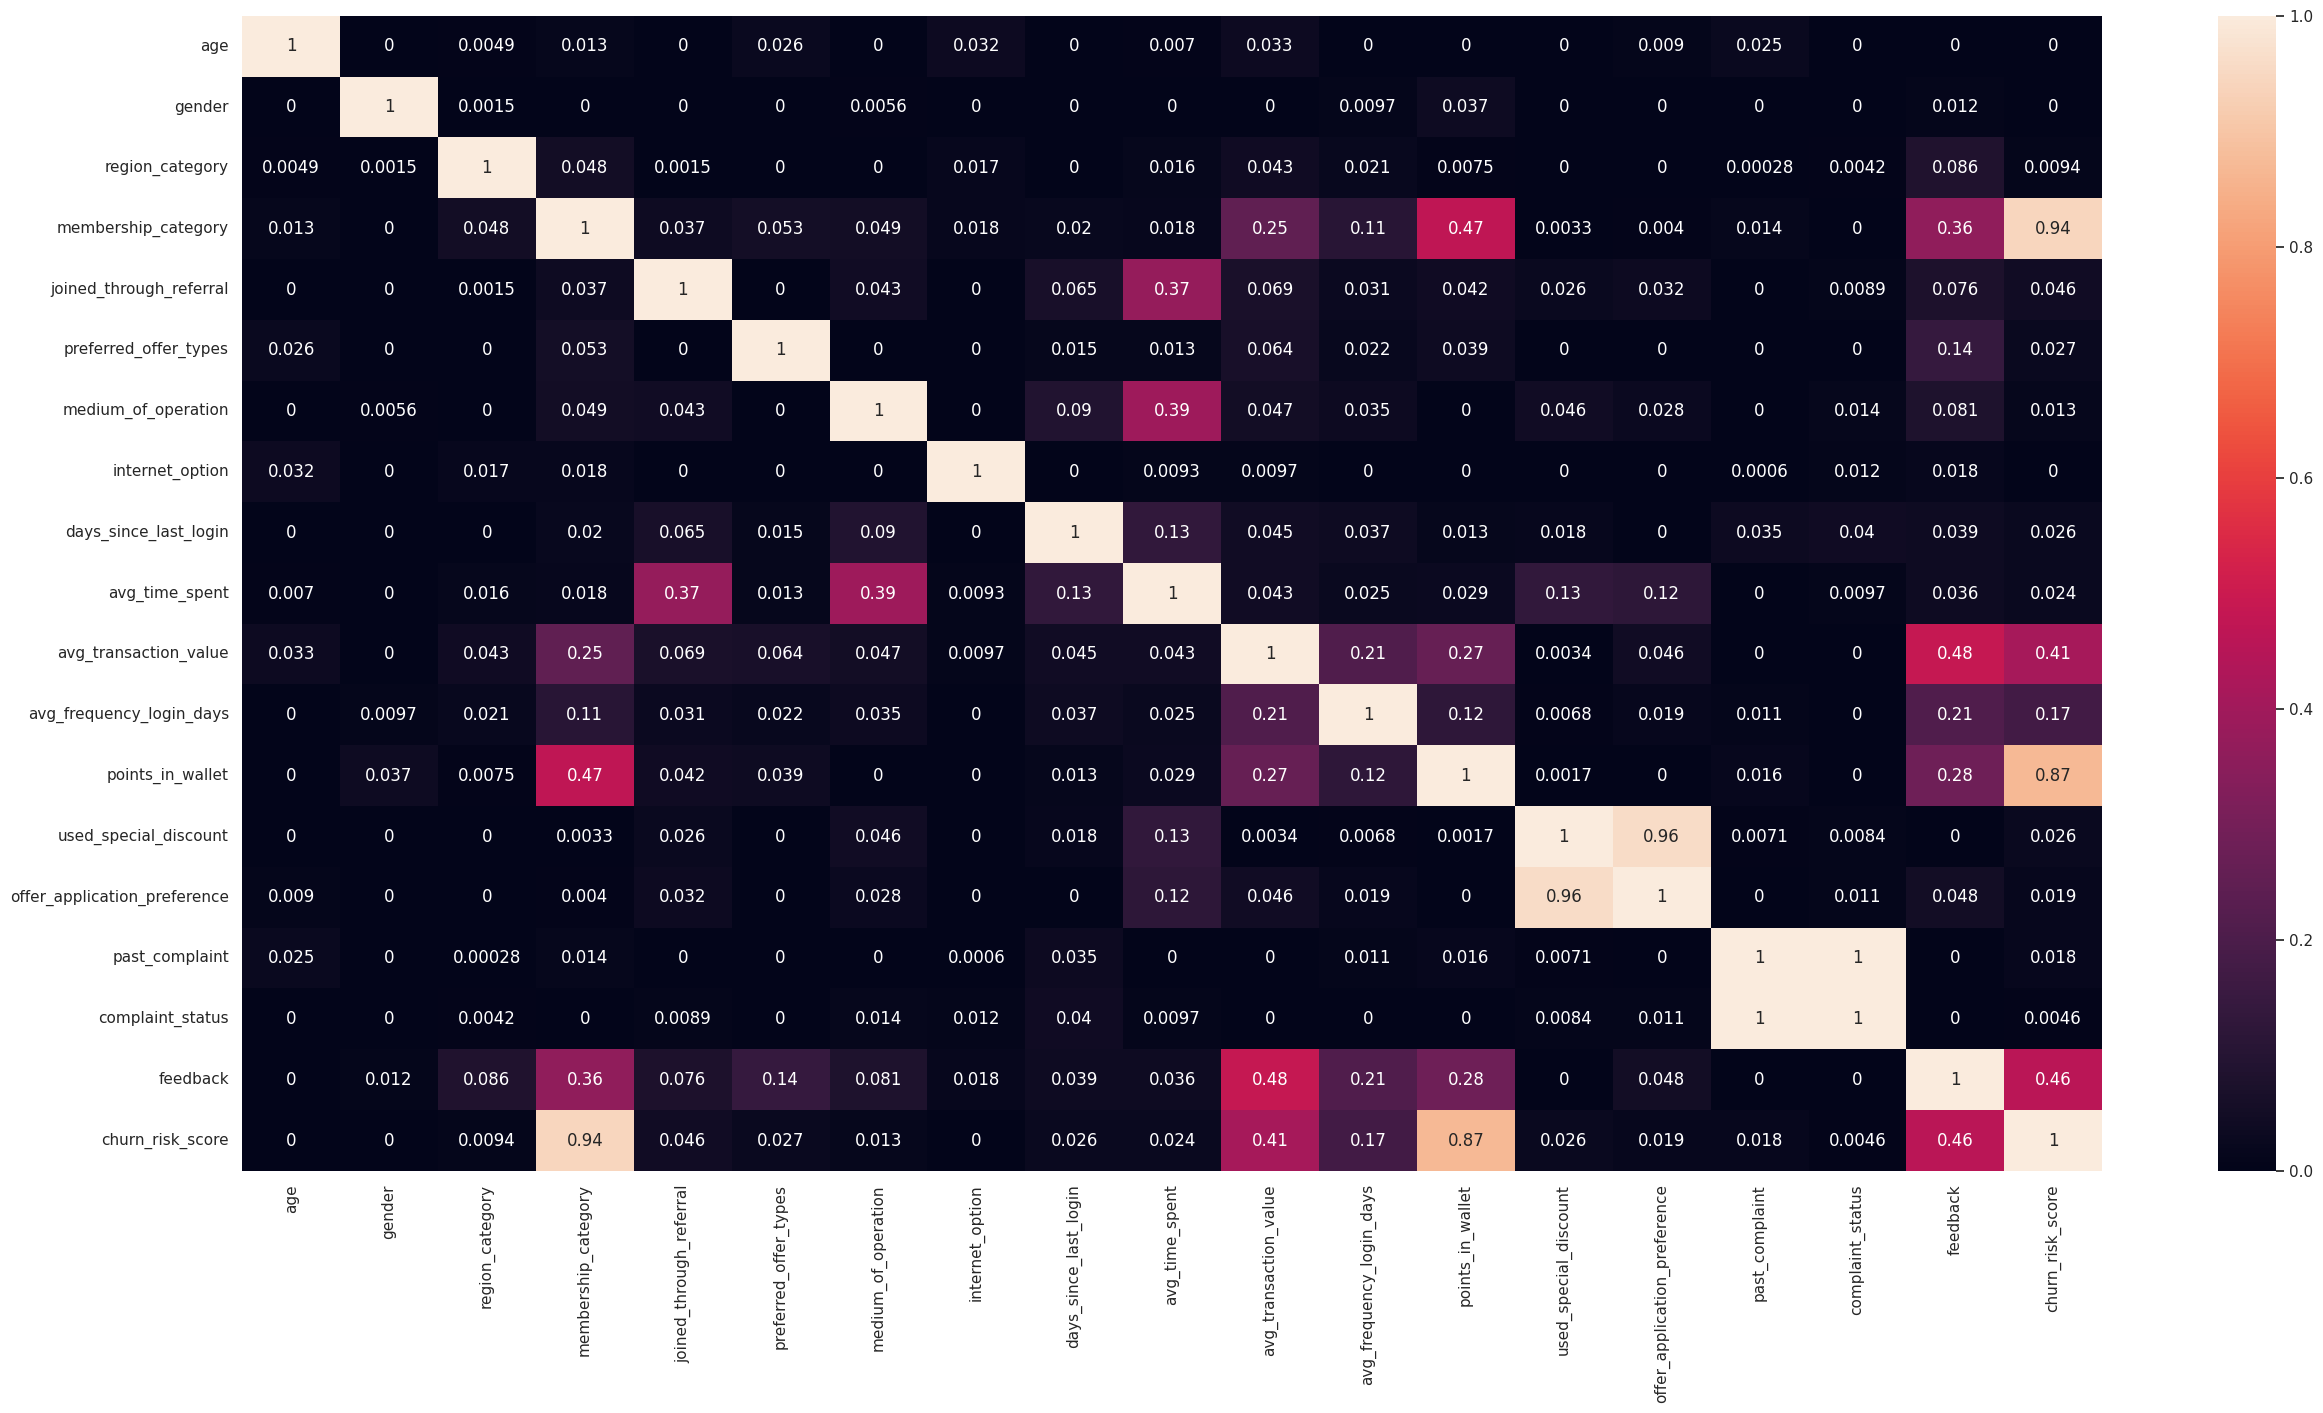

In [ ]:
# correlation matrix (heatmap style)
phik_overview = data_train.phik_matrix()
phik_overview.round(2)

plt.figure(figsize=(30, 15))
sns.heatmap(phik_overview, annot= True, vmin=0, vmax=1)
plt.show()

<Axes: >

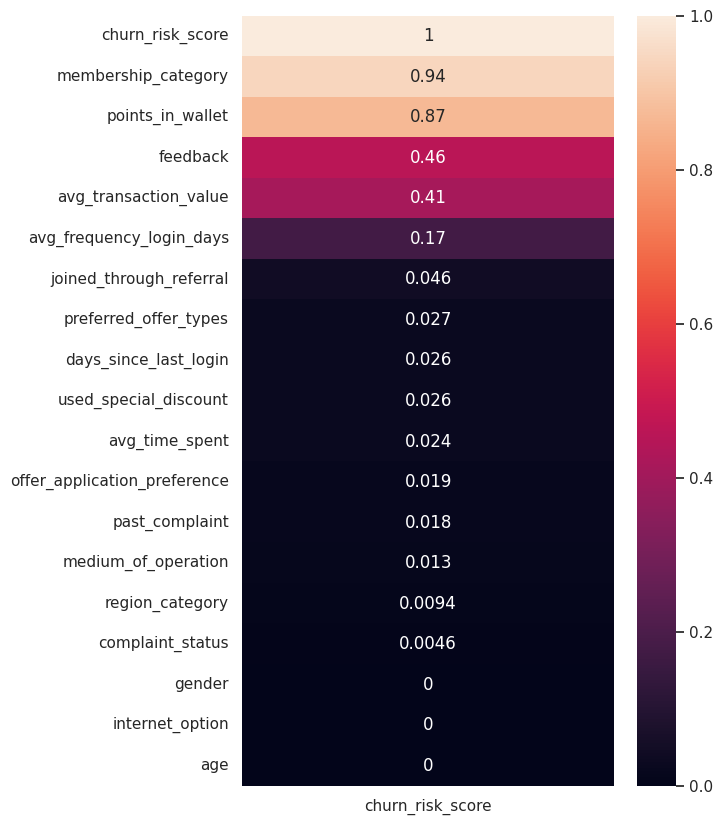

In [ ]:
# Summary correlation matrix to churn_risk_score
plt.figure(figsize=(6,10))
sns.heatmap(phik_overview[['churn_risk_score']].sort_values(by=['churn_risk_score'],ascending=False,),annot=True)

Suatu variabel dikatakan mempunyai korelasi yang positif terhadap target ketika nilai variabel tersebut mendekati nilai 1 (warna sangat cerah) atau sebaliknya, suatu variabel dikatakan mempunyai korelasi yang negatif terhadap target ketika nilai variabel tersebut mendekati nilai -1 (warna sangat gelap). Jika nilai variabel semakin mendekati 0, maka variabel tersebut tidak ada korelasi terhadap target.

Pada proses kedepannya nanti, Saya akan melakukan `drop` untuk variabel-variabel yang tidak mempunyai hubungan signifikan dengan kolom target. Berdasarkan heatmap di atas dengan mempertimbangkan hasil EDA yang telah dilakukan sebelumnya, kolom yang akan di `drop` yaitu:<br>
  - joined_through_referral
  - preferred_offer_types
  - days_since_last_login
  - used_special_discount
  - avg_time_spent
  - offer_application_preference
  - past_complaint
  - medium_of_operation
  - region_category
  - complaint_status
  - gender
  - internet_option
  - age
<br>

Sedangkan variabel yang mempunyai korelasi kuat sampai ke cukup kuat terhadap target *churn_risk_score* adalah:
  - membership_category
  - points_in_wallet
  - feedback
  - avg_transaction_value
  - avg_frequency_login_days

## Melakukan `Dropping` kolom yang tidak digunakan untuk membuat model

Disini Saya akan melakukan `drop` kolom seperti:  
  - joined_through_referral
  - preferred_offer_types
  - days_since_last_login
  - used_special_discount
  - avg_time_spent
  - offer_application_preference
  - past_complaint
  - medium_of_operation
  - region_category
  - complaint_status
  - gender
  - internet_option
  - age

In [ ]:
# Dropping unnecessary columns from the train-val-test-set, which we'll use going forward

X_train.drop(['joined_through_referral', 'preferred_offer_types', 'days_since_last_login', 'used_special_discount', 'avg_time_spent', 'offer_application_preference', 'past_complaint', 'medium_of_operation', 'region_category', 'complaint_status', 'gender', 'internet_option', 'age'], axis=1, inplace=True)
X_val.drop(['joined_through_referral', 'preferred_offer_types', 'days_since_last_login', 'used_special_discount', 'avg_time_spent', 'offer_application_preference', 'past_complaint', 'medium_of_operation', 'region_category', 'complaint_status', 'gender', 'internet_option', 'age'], axis=1, inplace=True)
X_test.drop(['joined_through_referral', 'preferred_offer_types', 'days_since_last_login', 'used_special_discount', 'avg_time_spent', 'offer_application_preference', 'past_complaint', 'medium_of_operation', 'region_category', 'complaint_status', 'gender', 'internet_option', 'age'], axis=1, inplace=True)

# check shape dataset
print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (23668, 5)
Val Size :  (5917, 5)
Test Size  :  (7397, 5)


Berdasarkan informasi di atas, diketahui bahwa:<br>
- data Train-Set terdiri dari 23.668 baris dan 5 kolom
- data Val-Set adalah 5.917 baris dan 5 kolom.
- data Test-Set adalah 7.397 baris dan 5 kolom.

## Mendeteksi dan Handling data Outlier

Sebelum proses handling outlier, sebaiknya kita melakukan pendeteksian outlier untuk masing-masing variabel numerik baik yang datanya terdistribusi normal maupun yang datanya tidak terdistribusi normal *(skewed)*.

Pertama, Saya ingin mengecek dulu variabel apa saja yang memiliki outlier dengan `box plot`:

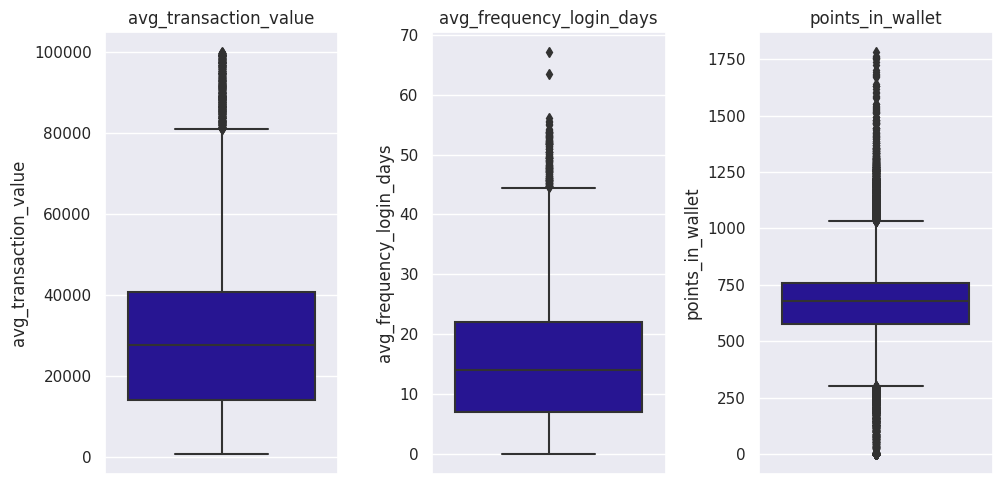

In [ ]:
# Check outlier
numerical_col = X_train.select_dtypes(exclude='category').columns.tolist()
plt.figure(figsize=(20,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=X_train[variable], orient='h')
    plt.tight_layout()
    plt.title(variable)

plt.show()

Berdasarkan box plot di atas, dapat dilihat bahwa variabel yang memiliki outlier adalah `avg_transaction_value`, `avg_frequency_login_days`, `points_in_wallet`.
Namun, Saya mengasumsikan bahwa outlier yang ada di ketiga variabel ini merupakan natural outlier. Sehingga, Saya tidak melakukan handling outlier apapun disini.

## Handling Missing Values

In [ ]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

membership_category         0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
feedback                    0
dtype: int64

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

membership_category         0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
feedback                    0
dtype: int64

In [ ]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

membership_category         0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
feedback                    0
dtype: int64

In [ ]:
# Check Missing Values in `y_train`
mv_y_train = y_train.isnull().sum()
print('Jumlah Missing Value di y_train : ', mv_y_train)

# Check Missing Values in `y_val`
mv_y_val = y_val.isnull().sum()
print('Jumlah Missing Value di y_val : ', mv_y_val)

# Check Missing Values in `y_test`
mv_y_test = y_test.isnull().sum()
print('Jumlah Missing Value di y_test : ', mv_y_test)

Jumlah Missing Value di y_train :  0
Jumlah Missing Value di y_val :  0
Jumlah Missing Value di y_test :  0


Berdasarkan informasi di atas menunjukkan bahwa tidak ada missing value pada X_train, X_val, X_test, y_train, y_val, dan y_test. Sehingga, tidak ada proses handling missing value yang dilakukan disini.


## Memisahkan antara kolom Numerikal dan kolom Kategorikal

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(exclude='category').columns.tolist()
cat_columns = X_train.select_dtypes(include='category').columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat Columns :  ['membership_category', 'feedback']


In [ ]:
# for X-train numeric and categoric
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# for X-validation numeric and categoric
X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

# untuk X-test numeric and categoric
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [ ]:
# Show X_train_cat
X_train_cat

membership_category               feedback
0            No Membership  Poor Customer Service
1          Gold Membership   Poor Product Quality
2         Basic Membership           Too many ads
3            No Membership   Poor Product Quality
4       Premium Membership           Too many ads
...                    ...                    ...
23663        No Membership  Poor Customer Service
23664        No Membership           Poor Website
23665  Platinum Membership           Poor Website
23666     Basic Membership   Poor Product Quality
23667     Basic Membership    No reason specified

[23668 rows x 2 columns]

Disini Saya akan memisahkan kolom kategorikal yang akan dilakukan proses feature encoding kedepannya. <br>
Jika dilihat value dari `membership_category` itu memiliki makna tingkatan seperti `No Membership` merupakan tingkat yang lebih rendah daripada `Basic Membership`, dan seterusnya. Sehingga untuk proses encoding di kolom ini Saya akan menggunakan `OrdinalEncoder()`.<br>
Sedangkan pada kolom `feedback` itu tidak memiliki arti tingakatan didalamnya. Sehingga untuk proses encoding di kolom ini Saya akan menggunakan `OneHotEncoder()`.

In [ ]:
# Get Categorical column (1) and (2)
cat_col_ordinal = X_train_cat[['membership_category']].columns.tolist()
cat_col_onehot = X_train_cat[['feedback']].columns.tolist()
print('cat_col_ordinal : ', cat_col_ordinal)
print('cat_col_onehot : ', cat_col_onehot)

cat_col_ordinal :  ['membership_category']
cat_col_onehot :  ['feedback']


## Feature Scaling

Saya akan melakukan feature scaling untuk kolom numerikal. Proses ini dibutuhkan karena skala dari data numerik yang kita punya itu berbeda-beda. <br>

Tujuan feature scaling disini adalah untuk membuat data kita mempunyai skala yang sama agar algoritma memperlakukan semua fitur dengan adil dan tentunya hal ini akan mempercepat pembelajaran dari suatu model terhadap datanya.<br>

Dalam proses feature scaling disini, Saya akan treat scalling variabel `'points_in_wallet', 'avg_transaction_value', 'avg_frequence_login_days'` menggunakan **`Normalization/MinMaxScaler`** karena beberapa variabelnya mempunyai data yang tidak berdistribusi normal/skewed.<br>

Jadi, Saya akan mendefinisikan proses feature scaling ini menggunakan `MinMaxScaler` di proses `bundle preprocessing` kedepannya.

## Feature Encoding

Feature Encoding adalah proses untuk mengubah data kategorikal menjadi numerik. Proses ini perlu dilakukan karena model tidak dapat memproses data dengan tipe data kategorik.<br>

Kita telah mengetahui bahwa value dari `membership_category` itu memiliki makna tingkatan seperti `No Membership` merupakan tingkat yang lebih rendah daripada `Basic Membership`, dan seterusnya. Sehingga untuk proses encoding di kolom ini Saya akan menggunakan `OrdinalEncoder()`.<br>
Sedangkan pada kolom `feedback` itu tidak memiliki arti tingakatan didalamnya. Sehingga untuk proses encoding di kolom ini Saya akan menggunakan `OneHotEncoder()`.<br>

Jadi, Saya akan mendefinisikan proses feature encoding ini menggunakan `OrdinalEncoder()`dan `OneHotEncoder()` sesuai dengan kolomnya di proses `bundle preprocessing` kedepannya.

## Melakukan `bundle preprocessing` (Pipeline) untuk data numerikal dan kategorikal menggunakan `ColumnTransformer`

In [ ]:
# Preprocessing for numerical data
numerical_transformer = make_pipeline(MinMaxScaler())

In [ ]:
# Preprocessing for categorical data (ordinal)
categorical_transformer1 = make_pipeline(OrdinalEncoder())

In [ ]:
# Preprocessing for categorical data (onehot)
categorical_transformer2 = make_pipeline(OneHotEncoder())

In [ ]:
# Bundle preprocessing for numerical and categorical data (ordinal) and (onehot)
final_pipeline = ColumnTransformer([
                    ('pipe_num', numerical_transformer, num_columns),
                    ('pipe_cat1', categorical_transformer1, cat_col_ordinal),
                    ('pipe_cat2', categorical_transformer2, cat_col_onehot),
])

In [ ]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

# check shape dataset
print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (23668, 13)
Val Size :  (5917, 13)
Test Size  :  (7397, 13)


Berdasarkan informasi di atas, diketahui bahwa:<br>
- data Train-Set terdiri dari 23.668 baris dan 13 kolom
- data Val-Set adalah 5.917 baris dan 13 kolom.
- data Test-Set adalah 7.397 baris dan 13 kolom.

## Input Tensorflow Pipeline 

In [ ]:
# Input tensorflow pipeline

train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(27)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(27)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(len(X_test)).batch(27)

# vi. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model seperti alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai.

## Sequential API

Untuk baseline model sequential, Saya menggunakan:<br>
- `2 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 26 dan 2 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
- Weight initializations: `HeNormal` 
- Activation Function hidden layer: `relu`
- BatchNormalization dan Dropout dengan rate `0.1` pada hidden layer 2
- `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
- Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
- Ditraining dengan `epoch 30`

In [ ]:
# Clear Session

seed = 20 
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

In [ ]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(26, input_shape=(13,), kernel_initializer='HeNormal', activation='relu')) # Hidden Layer 1

model_sequential.add(tf.keras.layers.Dense(2))
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Activation('relu'))
model_sequential.add(tf.keras.layers.Dropout(rate=0.1)) # Hidden Layer 2

model_sequential.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer. Menggunakan activation 'sigmoid' karena ini kasus binary

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 2)                 54        
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                        

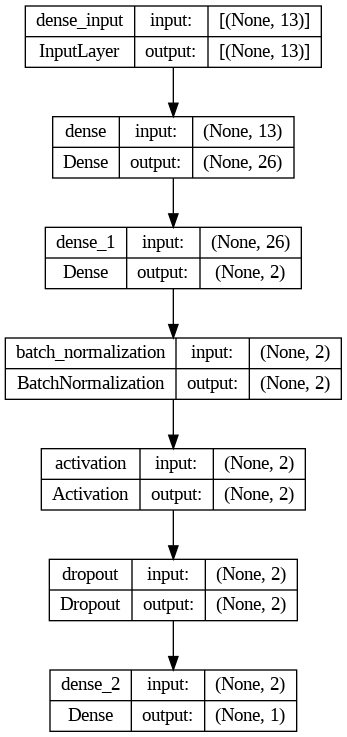

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## Functional API

Untuk baseline model functional, Saya menggunakan:<br>
- `2 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 39 dan 3 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
- Weight initializations: `HeNormal` 
- Activation Function hidden layer: `relu`
- `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
- Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
- Ditraining dengan `epoch 30`

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Functional Model

input_layer = Input(shape=(13,))
hidden_layer1 = Dense(39, kernel_initializer='HeNormal', activation='relu')(input_layer)
hidden_layer2 = Dense(3, activation='relu')(hidden_layer1)

concat_layer = concatenate([input_layer, hidden_layer2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 39)           546         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 3)            120         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 16)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

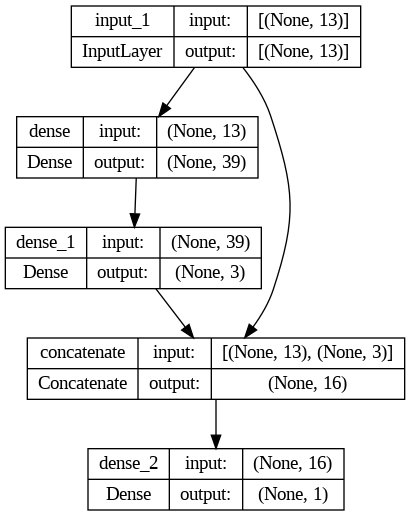

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

# vii. Model Training

>Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Sequential API

In [ ]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=30,
                                   validation_data=val_pipe)

Epoch 1/30
877/877 [==============================] - 3s 2ms/step - loss: 0.5897 - accuracy: 0.7405 - val_loss: 0.5077 - val_accuracy: 0.7914
Epoch 2/30
877/877 [==============================] - 2s 2ms/step - loss: 0.5032 - accuracy: 0.7806 - val_loss: 0.4507 - val_accuracy: 0.8062
Epoch 3/30
877/877 [==============================] - 2s 3ms/step - loss: 0.4607 - accuracy: 0.7953 - val_loss: 0.4066 - val_accuracy: 0.8317
Epoch 4/30
877/877 [==============================] - 2s 2ms/step - loss: 0.4162 - accuracy: 0.8214 - val_loss: 0.3661 - val_accuracy: 0.8398
Epoch 5/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8374 - val_loss: 0.3612 - val_accuracy: 0.8580
Epoch 6/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3650 - accuracy: 0.8389 - val_loss: 0.3379 - val_accuracy: 0.8503
Epoch 7/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3596 - accuracy: 0.8412 - val_loss: 0.3165 - val_accuracy: 0.8521
Epoch 

## Functional API

In [ ]:
# Train the Model

%%time
history_func = model_functional.fit(train_pipe,
                                    epochs=30,
                                    validation_data=val_pipe)

Epoch 1/30
877/877 [==============================] - 2s 2ms/step - loss: 0.4984 - accuracy: 0.7692 - val_loss: 0.4304 - val_accuracy: 0.7703
Epoch 2/30
877/877 [==============================] - 2s 2ms/step - loss: 0.4182 - accuracy: 0.7984 - val_loss: 0.4029 - val_accuracy: 0.8033
Epoch 3/30
877/877 [==============================] - 2s 3ms/step - loss: 0.3957 - accuracy: 0.8130 - val_loss: 0.3801 - val_accuracy: 0.8400
Epoch 4/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.8295 - val_loss: 0.3610 - val_accuracy: 0.8572
Epoch 5/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3547 - accuracy: 0.8483 - val_loss: 0.3410 - val_accuracy: 0.8618
Epoch 6/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3351 - accuracy: 0.8531 - val_loss: 0.3214 - val_accuracy: 0.8633
Epoch 7/30
877/877 [==============================] - 2s 2ms/step - loss: 0.3177 - accuracy: 0.8592 - val_loss: 0.3065 - val_accuracy: 0.8663
Epoch 

# viii. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

## Sequential API

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

loss  accuracy  val_loss  val_accuracy
0   0.589734  0.740536  0.507652      0.791448
1   0.503232  0.780590  0.450657      0.806152
2   0.460726  0.795251  0.406590      0.831671
3   0.416191  0.821447  0.366116      0.839784
4   0.380028  0.837375  0.361227      0.858036
5   0.365008  0.838939  0.337885      0.850262
6   0.359553  0.841220  0.316545      0.852121
7   0.354474  0.840713  0.304794      0.845699
8   0.347742  0.842910  0.285477      0.862261
9   0.342039  0.843502  0.301394      0.848065
10  0.341209  0.842657  0.282900      0.854149
11  0.342039  0.838347  0.323268      0.845699
12  0.342270  0.839065  0.304503      0.853135
13  0.339965  0.841136  0.279262      0.862261
14  0.336935  0.844389  0.287864      0.854994
15  0.339639  0.842868  0.295869      0.850769
16  0.329325  0.845445  0.274828      0.863782
17  0.333603  0.842910  0.277951      0.861078
18  0.329914  0.844093  0.274578      0.854149
19  0.327085  0.842868  0.282319      0.853642
20  0.331639  0.844643  0.273099      0.860402
21  0.333929  0.840248  0.287458      0.860571
22  0.326705  0.844051  0.269397      0.861247
23  0.325722  0.846713  0.276991      0.853473
24  0.325855  0.847220  0.279255      0.849248
25  0.328114  0.844558  0.279899      0.861923
26  0.326206  0.847093  0.267961      0.867500
27  0.325381  0.844600  0.269581      0.851107
28  0.325716  0.846333  0.268573      0.859050
29  0.324905  0.844727  0.271157      0.862768

<Axes: >

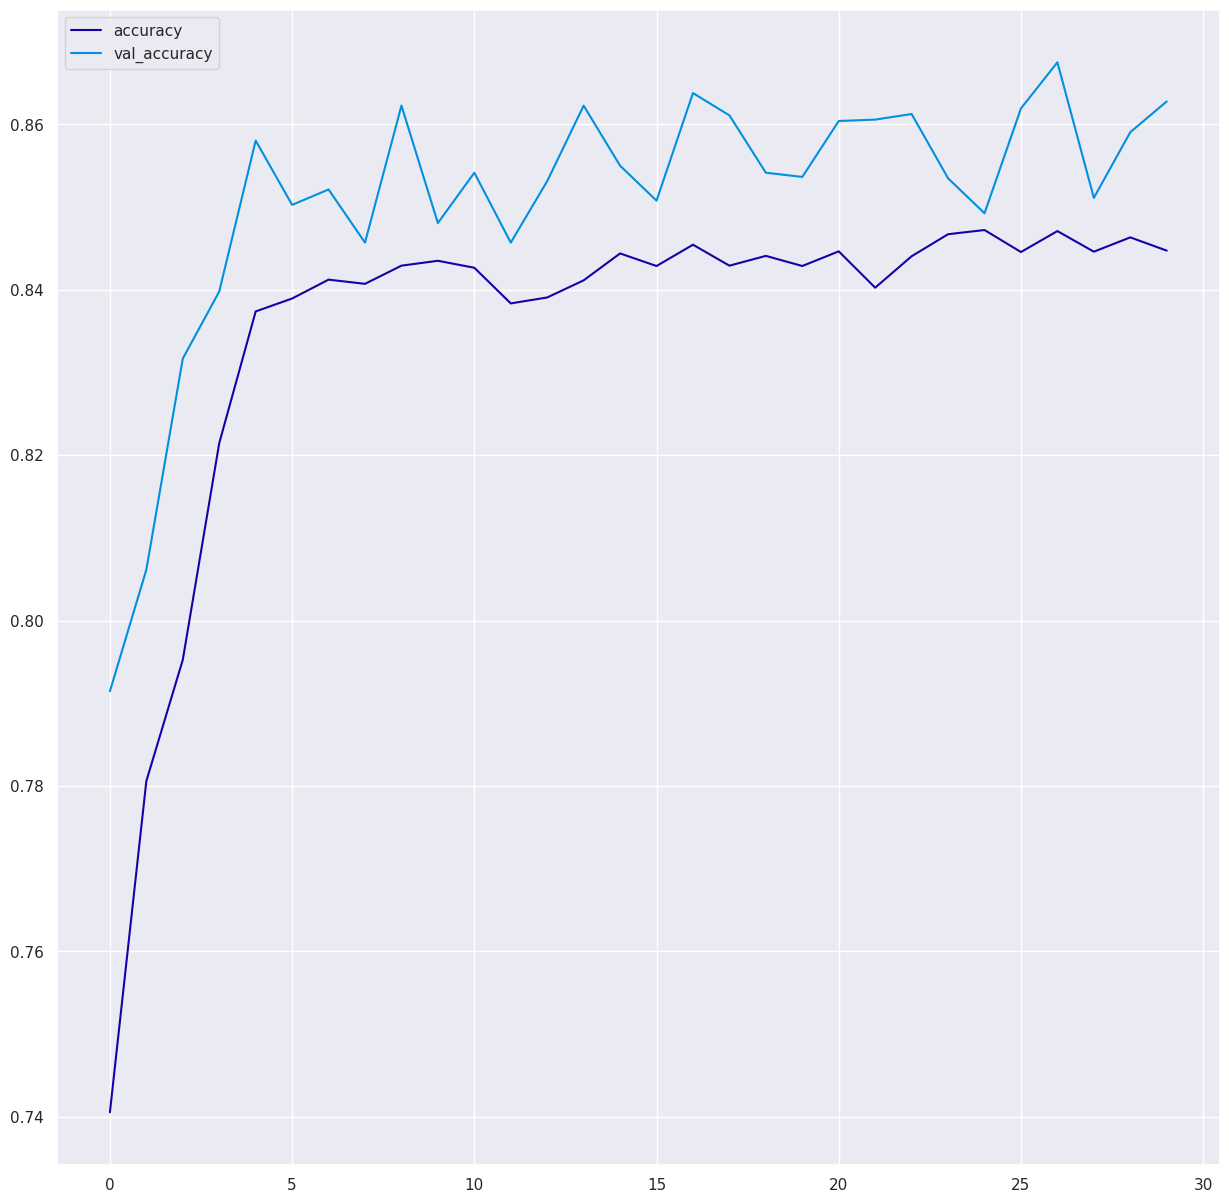

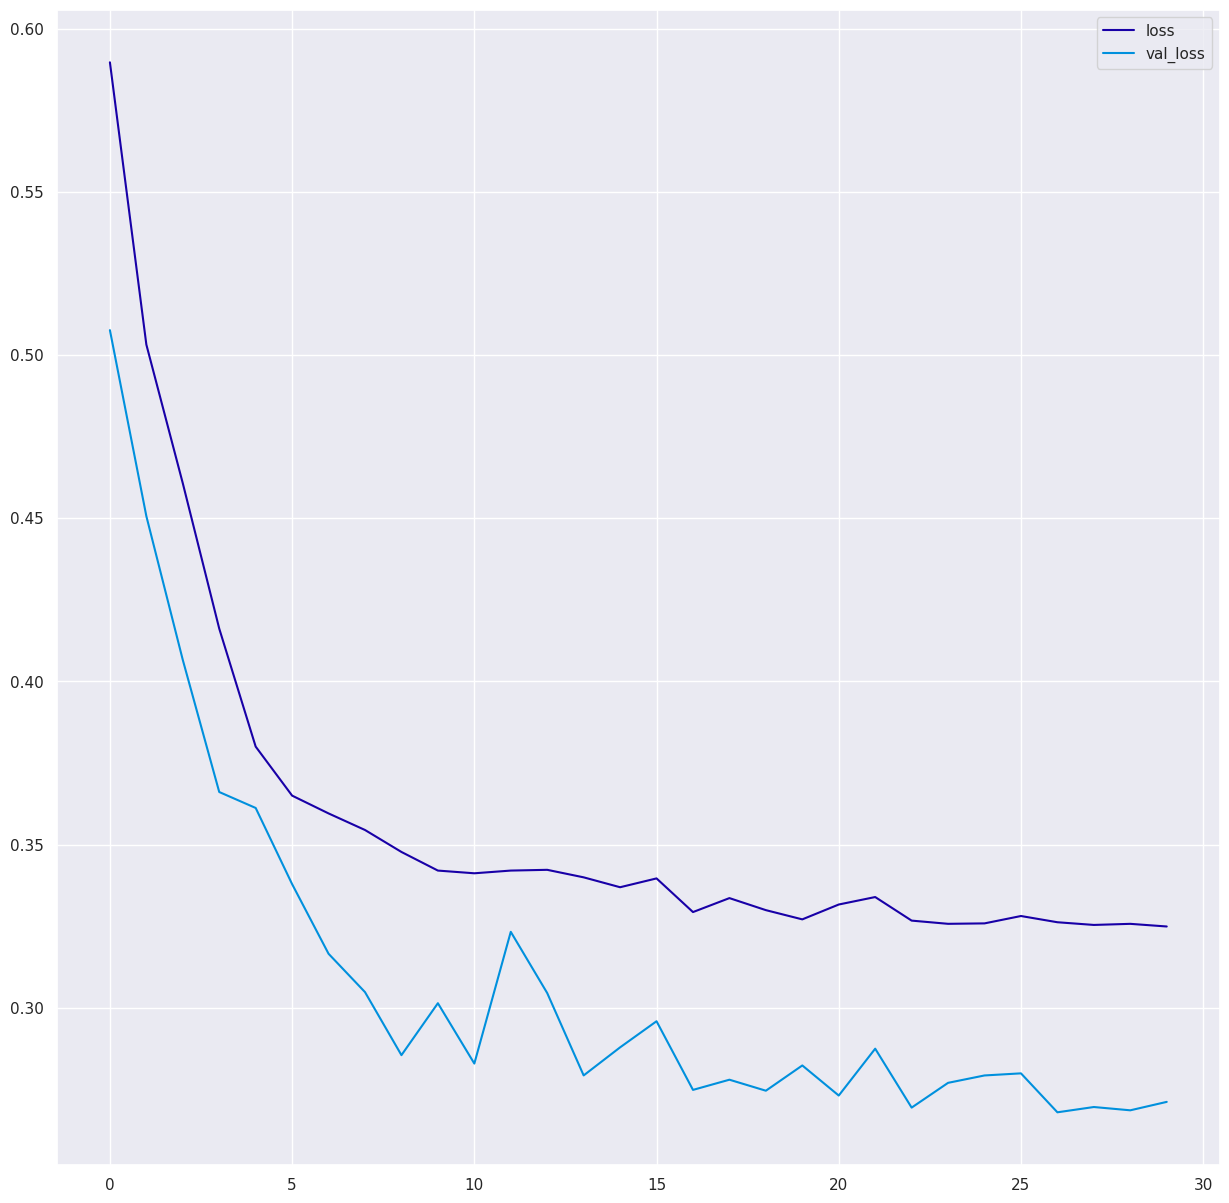

In [ ]:
# Plot Traning Results
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of val-set
y_pred_seq_val = model_sequential.predict(X_val)
# set threshold 0.5
y_pred_seq_val = np.where(y_pred_seq_val >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_seq_val))

185/185 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2734
           1       0.86      0.90      0.88      3183

    accuracy                           0.86      5917
   macro avg       0.86      0.86      0.86      5917
weighted avg       0.86      0.86      0.86      5917



Pada base model sequential, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.86` dan nilai `recall` pada label 1 sebesar `0.90`. Performa model ini dapat dikatakan bagus karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.84-0.86). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga tidak terlalu signifikan. 

## Functional API

In [ ]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

loss  accuracy  val_loss  val_accuracy
0   0.498412  0.769224  0.430439      0.770323
1   0.418164  0.798378  0.402913      0.803279
2   0.395729  0.812996  0.380055      0.839953
3   0.374593  0.829474  0.361037      0.857191
4   0.354658  0.848276  0.340991      0.861754
5   0.335072  0.853135  0.321353      0.863275
6   0.317736  0.859177  0.306457      0.866317
7   0.302263  0.868726  0.295877      0.881866
8   0.291447  0.871557  0.281933      0.865641
9   0.283434  0.875655  0.275599      0.875613
10  0.277347  0.874852  0.272879      0.859895
11  0.272771  0.877134  0.268587      0.890992
12  0.268683  0.880725  0.265742      0.886936
13  0.265795  0.879711  0.261783      0.891161
14  0.263380  0.881063  0.258738      0.882035
15  0.262365  0.879669  0.263011      0.859726
16  0.260536  0.879120  0.254695      0.891668
17  0.258153  0.882119  0.265663      0.876796
18  0.257725  0.877345  0.251892      0.888119
19  0.256530  0.880641  0.253899      0.882373
20  0.255536  0.880429  0.255641      0.874261
21  0.254801  0.878739  0.253052      0.877472
22  0.254334  0.882119  0.251326      0.887105
23  0.253425  0.882162  0.251880      0.877134
24  0.252810  0.882457  0.258282      0.859388
25  0.253023  0.882415  0.250377      0.890992
26  0.251725  0.880007  0.249187      0.878993
27  0.252290  0.880598  0.257527      0.859557
28  0.251106  0.881612  0.250389      0.879162
29  0.251156  0.880176  0.248248      0.895217

<Axes: >

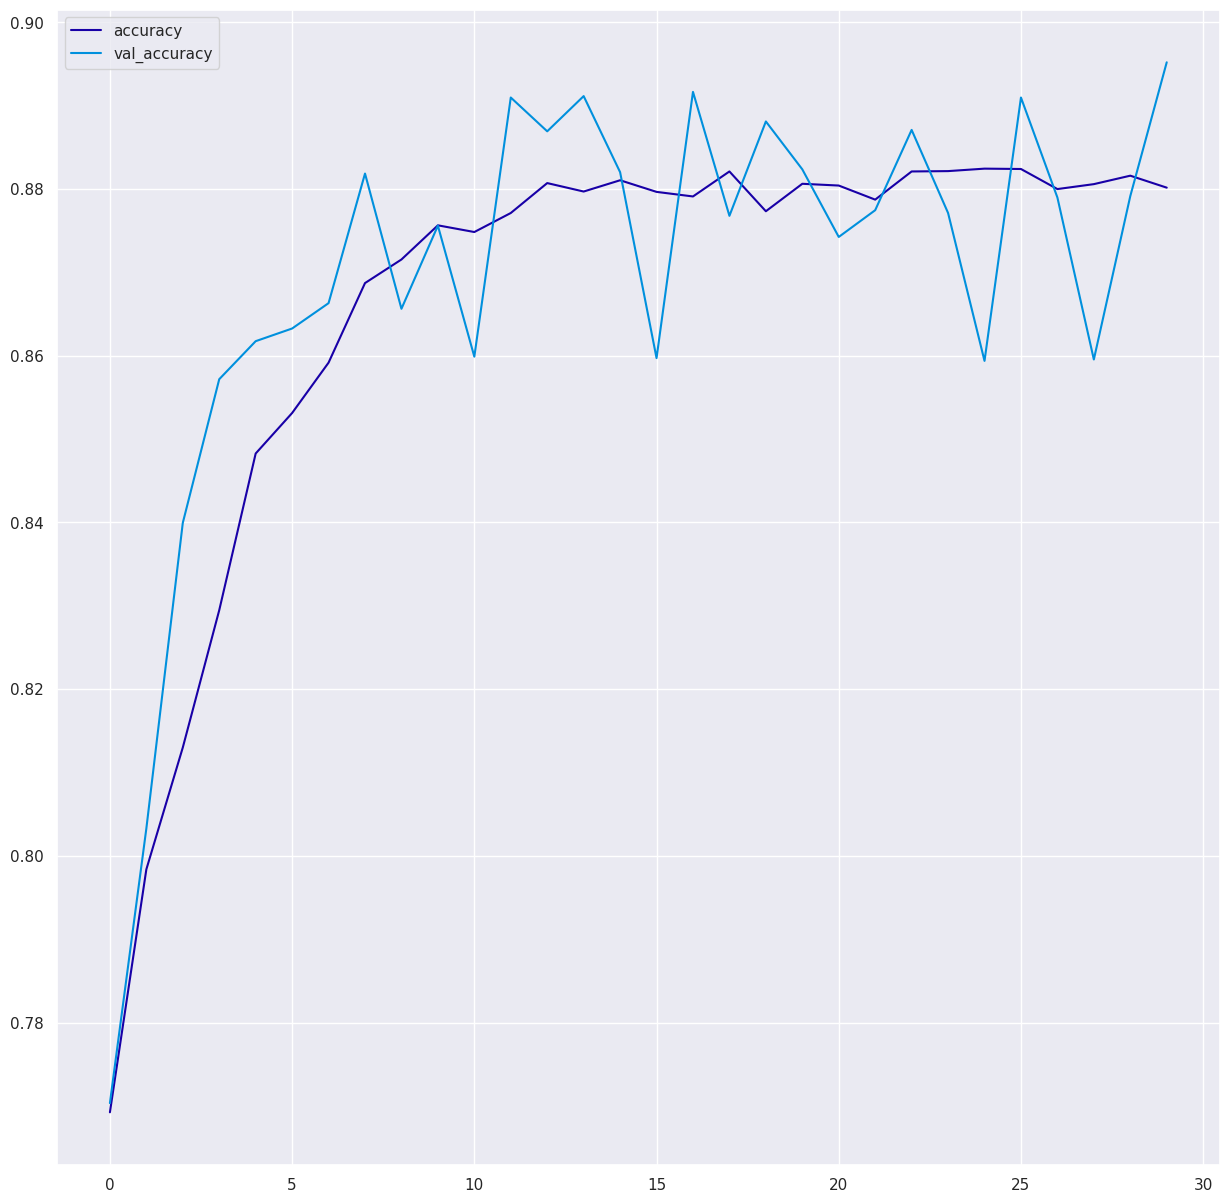

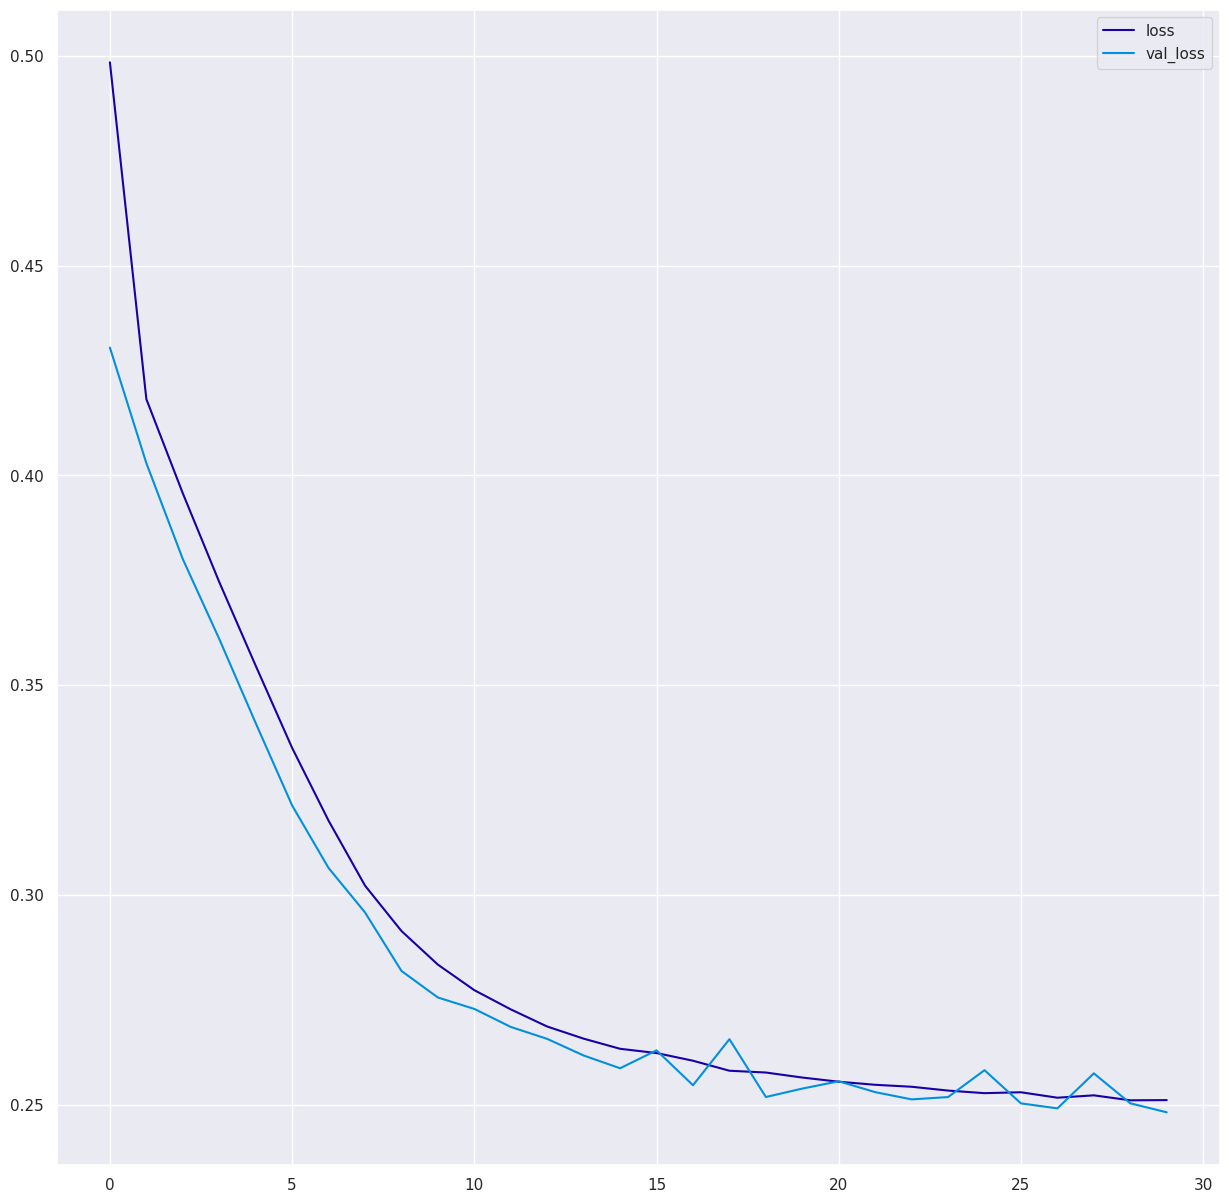

In [ ]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of val-set
y_pred_func_val = model_functional.predict(X_val)
# set threshold 0.5
y_pred_func_val = np.where(y_pred_func_val >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_func_val))

185/185 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2734
           1       0.91      0.89      0.90      3183

    accuracy                           0.90      5917
   macro avg       0.89      0.90      0.89      5917
weighted avg       0.90      0.90      0.90      5917



Pada base model functional, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.90` dan nilai `recall` pada label 1 sebesar `0.89`. Performa model ini dapat dikatakan bagus karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.88-0.89). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga sangat rendah (berdekatan). 

## Model Improvement

### Sequential API

Untuk model improvement sequential, Saya menggunakan:<br>
- `3 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 39, 26 dan 16 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
- Weight initializations: `HeNormal` 
- Activation Function hidden layer: `relu`
- BatchNormalization dan Dropout dengan rate `0.2`
- `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
- Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
- Ditraining dengan `epoch 50`

In [ ]:
# Clear Session

seed = 20 
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed) # gunakan set_seed untuk menghasilkan model yang mempunyai performa yang sama

In [ ]:
# Create Sequential API

model_seq_imp = Sequential()
model_seq_imp.add(Dense(39, input_shape=(13,), kernel_initializer='HeNormal', activation='relu')) # Hidden Layer 1

model_seq_imp.add(tf.keras.layers.Dense(26))
model_seq_imp.add(tf.keras.layers.BatchNormalization())
model_seq_imp.add(tf.keras.layers.Activation('relu')) # Hidden Layer 2

model_seq_imp.add(tf.keras.layers.Dense(16))
model_seq_imp.add(tf.keras.layers.BatchNormalization())
model_seq_imp.add(tf.keras.layers.Activation('relu'))
model_seq_imp.add(tf.keras.layers.Dropout(rate=0.2)) # Hidden Layer 3

model_seq_imp.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer. Menggunakan activation 'sigmoid' karena ini kasus binary

# Compile
model_seq_imp.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 39)                546       
                                                                 
 dense_1 (Dense)             (None, 26)                1040      
                                                                 
 batch_normalization (BatchN  (None, 26)               104       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                432       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

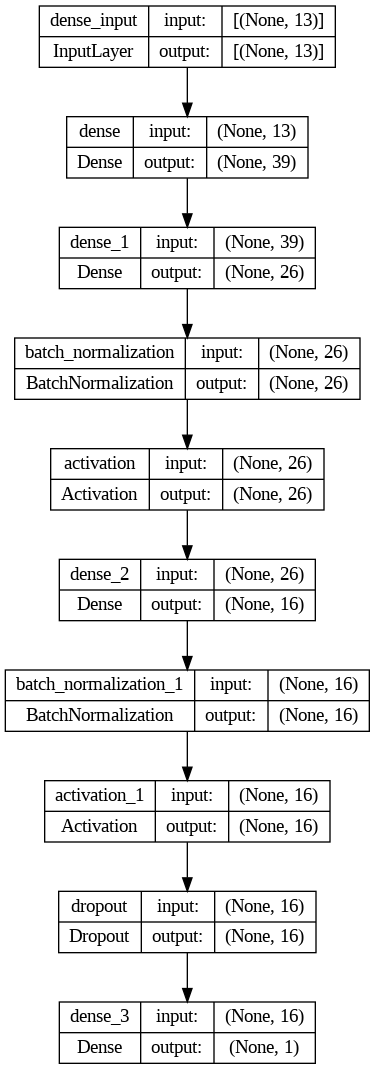

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq_imp, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_seq_imp = model_seq_imp.fit(train_pipe,
                                   epochs=50,
                                   validation_data=val_pipe)

Epoch 1/50
877/877 [==============================] - 3s 2ms/step - loss: 0.4204 - accuracy: 0.8004 - val_loss: 0.2889 - val_accuracy: 0.8587
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.8374 - val_loss: 0.2632 - val_accuracy: 0.8619
Epoch 3/50
877/877 [==============================] - 3s 3ms/step - loss: 0.2989 - accuracy: 0.8435 - val_loss: 0.2575 - val_accuracy: 0.8545
Epoch 4/50
877/877 [==============================] - 3s 3ms/step - loss: 0.2870 - accuracy: 0.8477 - val_loss: 0.2531 - val_accuracy: 0.8580
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2819 - accuracy: 0.8517 - val_loss: 0.2539 - val_accuracy: 0.8494
Epoch 6/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2751 - accuracy: 0.8463 - val_loss: 0.2557 - val_accuracy: 0.8487
Epoch 7/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2778 - accuracy: 0.8465 - val_loss: 0.2578 - val_accuracy: 0.8557
Epoch 

In [ ]:
# Create DataFrame

history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df

loss  accuracy  val_loss  val_accuracy
0   0.420395  0.800448  0.288945      0.858712
1   0.323168  0.837418  0.263176      0.861923
2   0.298931  0.843460  0.257537      0.854487
3   0.287019  0.847685  0.253137      0.858036
4   0.281851  0.851699  0.253927      0.849417
5   0.275128  0.846290  0.255744      0.848741
6   0.277767  0.846544  0.257842      0.855670
7   0.275331  0.846924  0.254616      0.853304
8   0.272046  0.847558  0.252745      0.855839
9   0.267004  0.850008  0.253647      0.861923
10  0.271008  0.849501  0.253896      0.850938
11  0.268455  0.851191  0.254252      0.860740
12  0.267302  0.855248  0.254870      0.850262
13  0.265870  0.854952  0.253660      0.852797
14  0.264441  0.856938  0.248258      0.881528
15  0.265473  0.860444  0.250339      0.876796
16  0.264984  0.865177  0.248076      0.889133
17  0.260422  0.870289  0.246722      0.883894
18  0.260978  0.873458  0.244771      0.898428
19  0.259866  0.875655  0.238678      0.906709
20  0.253747  0.883091  0.234861      0.912625
21  0.253242  0.884528  0.225777      0.920061
22  0.247421  0.891710  0.220068      0.925807
23  0.246662  0.895133  0.216636      0.923272
24  0.243866  0.896442  0.221343      0.912456
25  0.241170  0.898344  0.208552      0.928342
26  0.233942  0.901048  0.214956      0.911611
27  0.234521  0.902991  0.202877      0.924962
28  0.232779  0.903836  0.214620      0.920230
29  0.237437  0.901639  0.216123      0.906371
30  0.227302  0.906245  0.206565      0.911611
31  0.230097  0.904850  0.200504      0.921075
32  0.228602  0.907808  0.199777      0.922089
33  0.226690  0.907723  0.200367      0.921920
34  0.223525  0.908822  0.194420      0.928511
35  0.225378  0.908400  0.195889      0.926483
36  0.222884  0.910216  0.192313      0.926314
37  0.220751  0.911146  0.192567      0.929356
38  0.219829  0.912160  0.207848      0.908400
39  0.220468  0.910892  0.220103      0.901301
40  0.215662  0.912582  0.197569      0.919216
41  0.216575  0.913512  0.201052      0.912794
42  0.217395  0.913892  0.197093      0.921244
43  0.214565  0.911399  0.198802      0.915498
44  0.212512  0.914019  0.184734      0.928342
45  0.209675  0.914526  0.183377      0.927666
46  0.211103  0.913470  0.179838      0.929356
47  0.209704  0.913596  0.180210      0.925807
48  0.206120  0.915202  0.189061      0.926821
49  0.201594  0.916300  0.179820      0.924624

<Axes: >

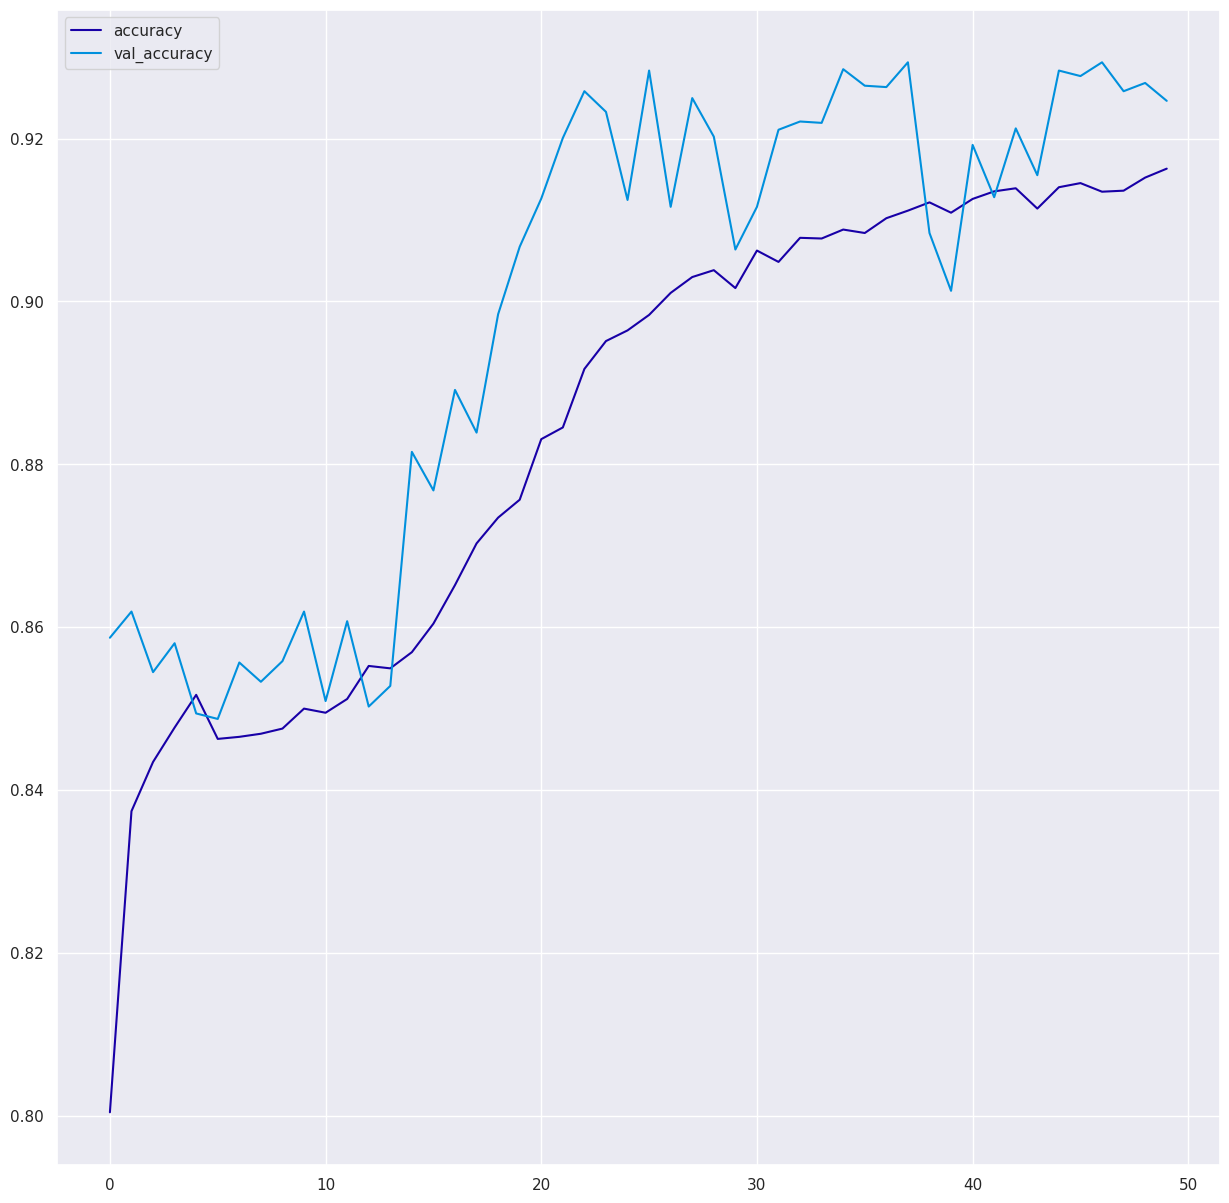

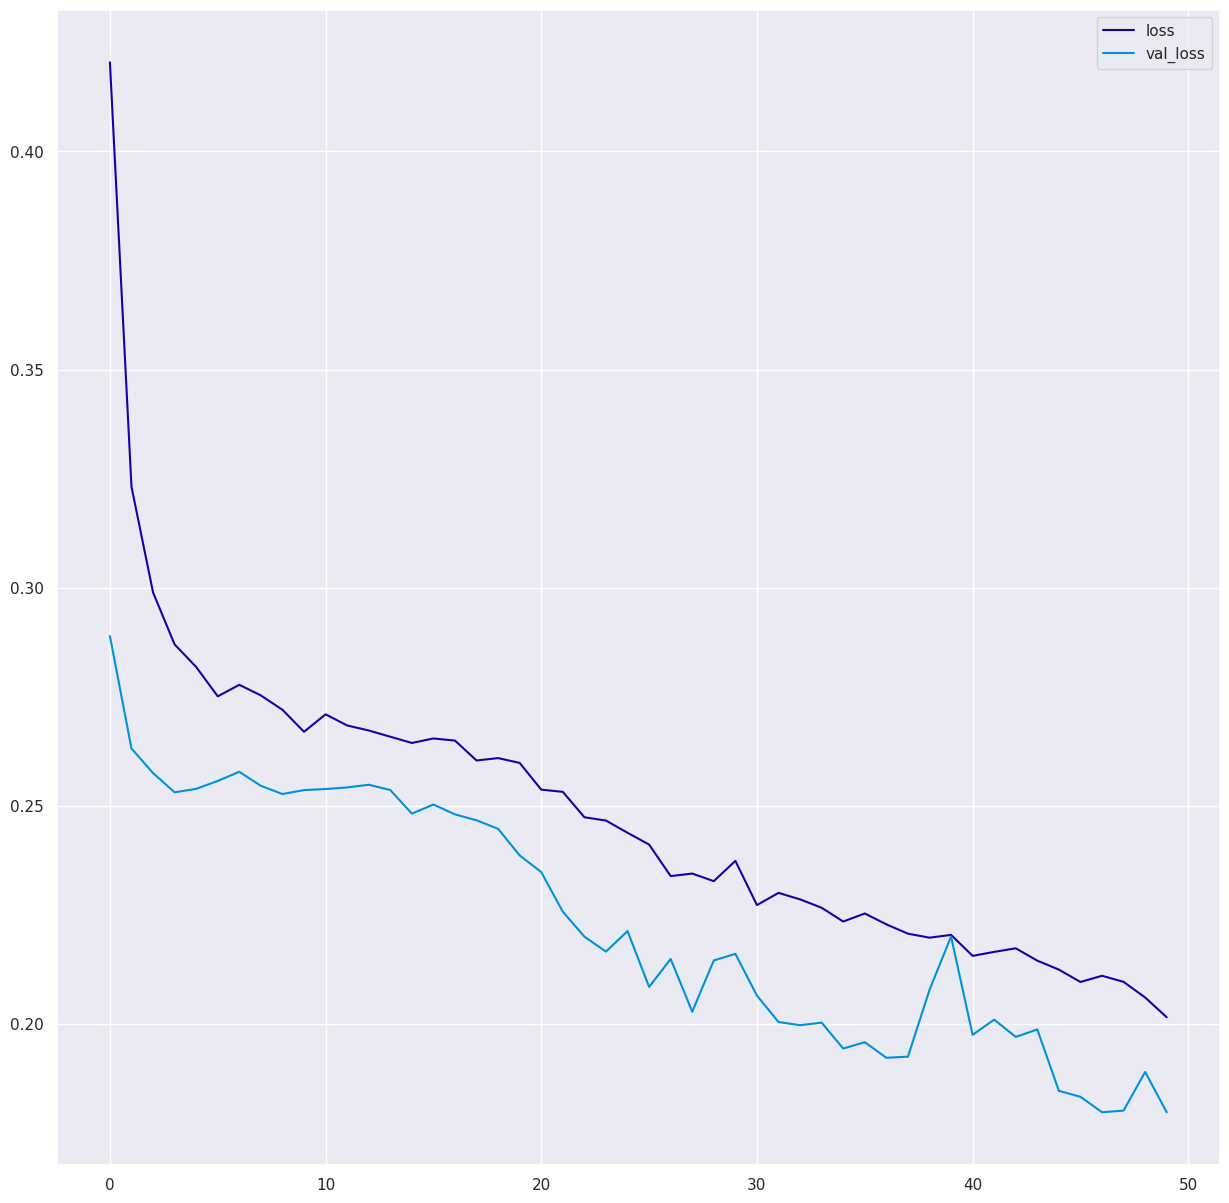

In [ ]:
# Plot Traning Results
history_seq_imp_df[['accuracy', 'val_accuracy']].plot()
history_seq_imp_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of val-set
y_pred_seq_val_imp = model_seq_imp.predict(X_val)
# set threshold 0.5
y_pred_seq_val_imp = np.where(y_pred_seq_val_imp >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_seq_val_imp))

185/185 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2734
           1       0.93      0.92      0.93      3183

    accuracy                           0.92      5917
   macro avg       0.92      0.92      0.92      5917
weighted avg       0.92      0.92      0.92      5917



In [ ]:
# Model Evaluation of test-set
y_pred_seq_test_imp = model_seq_imp.predict(X_test)
# set threshold 0.5
y_pred_seq_test_imp = np.where(y_pred_seq_test_imp >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_seq_test_imp))

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3372
           1       0.94      0.91      0.92      4025

    accuracy                           0.92      7397
   macro avg       0.92      0.92      0.92      7397
weighted avg       0.92      0.92      0.92      7397



Pada model improvement sequential, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.92`. Kemudian nilai `accuracy` dari test set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.91`. <br>

Performa model ini dapat dikatakan bagus `(goodfit)` karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.91-0.92). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga tidak terlalu signifikan. 

### Functional API

Untuk model improvement functional, Saya menggunakan:<br>
- `3 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 52, 20 dan 5 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
- Weight initializations: `HeNormal` 
- Activation Function hidden layer: `relu`
- `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
- Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
- Ditraining dengan `epoch 50`

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Functional Model

input_layer_imp = Input(shape=(13,))
hidden_layer1_imp = Dense(52, kernel_initializer='HeNormal', activation='relu')(input_layer_imp)
hidden_layer2_imp = Dense(20, activation='relu')(hidden_layer1_imp)
hidden_layer3_imp = Dense(5, activation='relu')(hidden_layer2_imp)

concat_layer_imp = concatenate([input_layer_imp, hidden_layer3_imp])
output_layer_imp = Dense(1, activation='sigmoid')(concat_layer_imp)

model_func_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# Compile
model_func_imp.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_func_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 52)           728         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           1060        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 5)            105         ['dense_1[0][0]']                
                                                                                              

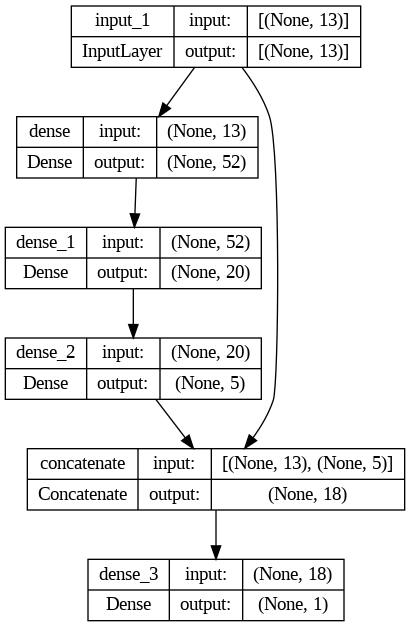

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_func_imp, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_func_imp = model_func_imp.fit(train_pipe,
                                     epochs=50,
                                     validation_data=val_pipe)

Epoch 1/50
877/877 [==============================] - 3s 2ms/step - loss: 0.4549 - accuracy: 0.7948 - val_loss: 0.4030 - val_accuracy: 0.8048
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 0.3871 - accuracy: 0.8186 - val_loss: 0.3568 - val_accuracy: 0.8367
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 0.3439 - accuracy: 0.8394 - val_loss: 0.3242 - val_accuracy: 0.8509
Epoch 4/50
877/877 [==============================] - 2s 2ms/step - loss: 0.3091 - accuracy: 0.8527 - val_loss: 0.2917 - val_accuracy: 0.8609
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2894 - accuracy: 0.8565 - val_loss: 0.2820 - val_accuracy: 0.8656
Epoch 6/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.8579 - val_loss: 0.3178 - val_accuracy: 0.8489
Epoch 7/50
877/877 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.8585 - val_loss: 0.2858 - val_accuracy: 0.8580
Epoch 

In [ ]:
# Create DataFrame

history_func_imp_df = pd.DataFrame(history_func_imp.history)
history_func_imp_df

loss  accuracy  val_loss  val_accuracy
0   0.454867  0.794786  0.402964      0.804800
1   0.387149  0.818616  0.356766      0.836742
2   0.343854  0.839403  0.324204      0.850938
3   0.309053  0.852670  0.291663      0.860909
4   0.289359  0.856515  0.281960      0.865641
5   0.279838  0.857909  0.317787      0.848910
6   0.274317  0.858459  0.285777      0.858036
7   0.270233  0.858121  0.263602      0.865472
8   0.268525  0.860571  0.266296      0.866317
9   0.265263  0.861290  0.268867      0.852966
10  0.262213  0.863909  0.260379      0.858374
11  0.261425  0.863740  0.255208      0.865810
12  0.260774  0.862430  0.257847      0.871557
13  0.259732  0.865219  0.268320      0.861247
14  0.258680  0.863909  0.253208      0.871895
15  0.257915  0.865261  0.251410      0.878824
16  0.256414  0.867585  0.256059      0.870035
17  0.254698  0.868219  0.250429      0.878148
18  0.253796  0.872275  0.253308      0.862768
19  0.253329  0.871599  0.252307      0.874092
20  0.254849  0.872317  0.259071      0.863106
21  0.251464  0.875570  0.248131      0.872233
22  0.249352  0.877641  0.255754      0.880007
23  0.249845  0.875824  0.246006      0.876458
24  0.246797  0.877598  0.251819      0.870205
25  0.245744  0.880472  0.240163      0.884908
26  0.242988  0.881274  0.242765      0.872402
27  0.241830  0.883471  0.236777      0.889471
28  0.239907  0.884063  0.240596      0.884570
29  0.238034  0.887570  0.240507      0.880852
30  0.236578  0.887189  0.233248      0.891330
31  0.233210  0.890147  0.233085      0.891837
32  0.232411  0.889133  0.228845      0.904005
33  0.230792  0.890823  0.227097      0.910090
34  0.229072  0.891668  0.231756      0.885922
35  0.227416  0.894288  0.234936      0.880345
36  0.225453  0.894752  0.223234      0.909245
37  0.225296  0.893569  0.224783      0.883218
38  0.223789  0.896527  0.223750      0.898597
39  0.222085  0.899907  0.227984      0.887950
40  0.219960  0.900625  0.219113      0.897752
41  0.219574  0.903456  0.217348      0.914484
42  0.217078  0.905780  0.216545      0.896907
43  0.217553  0.906583  0.215766      0.896062
44  0.215268  0.906583  0.215913      0.897583
45  0.213606  0.909033  0.210070      0.918371
46  0.212761  0.911061  0.214763      0.904174
47  0.212975  0.909752  0.209623      0.918202
48  0.210633  0.912287  0.208831      0.923779
49  0.208520  0.913216  0.206915      0.919554

<Axes: >

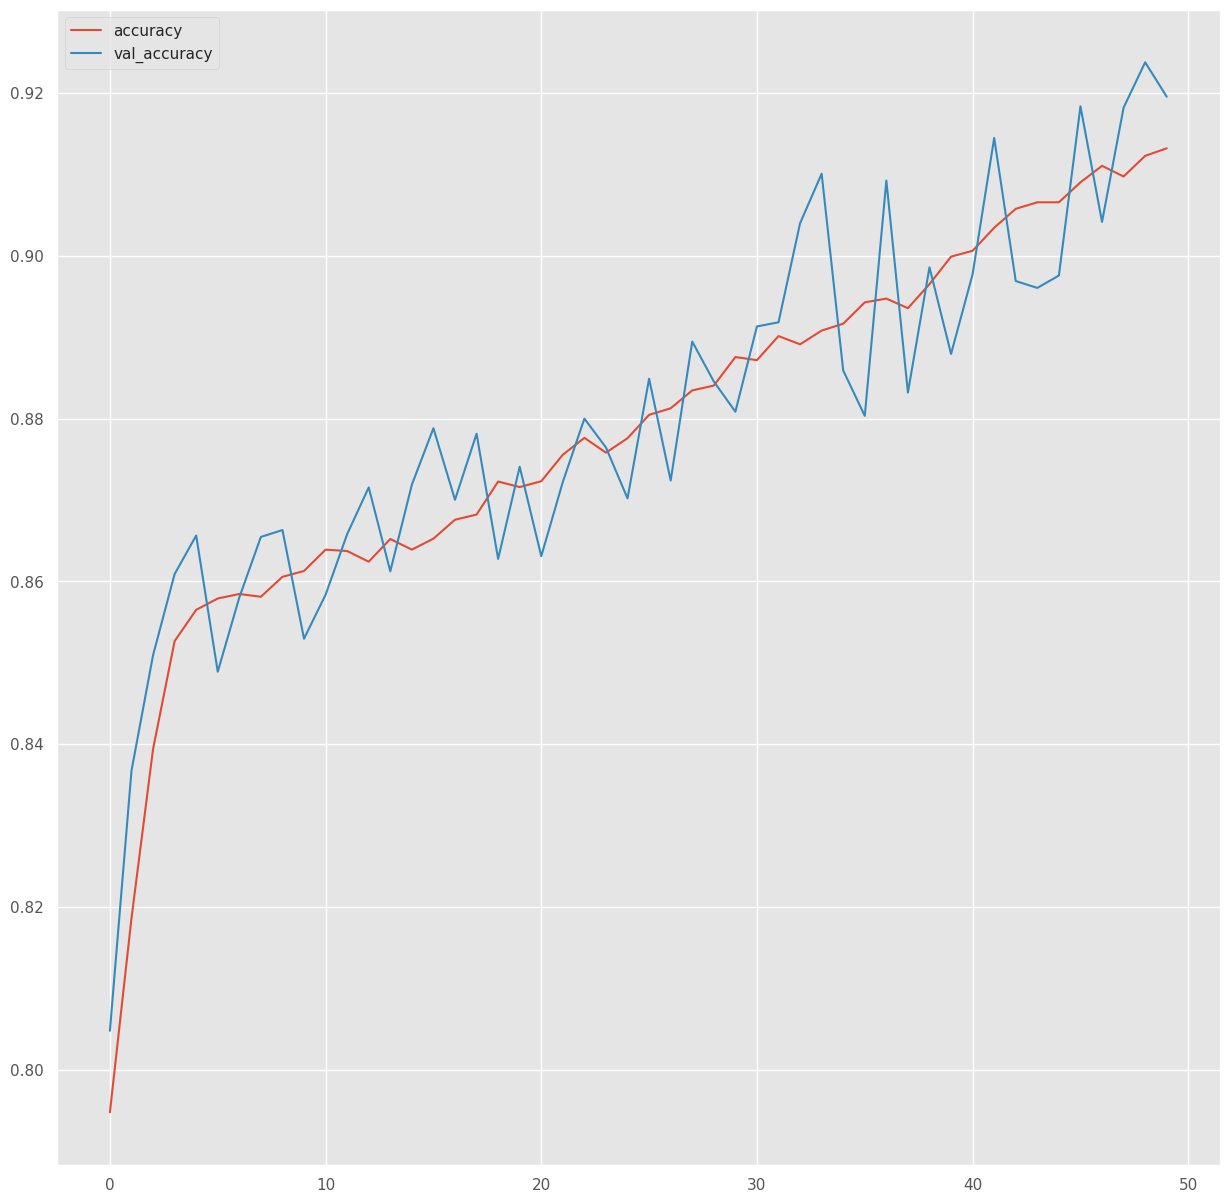

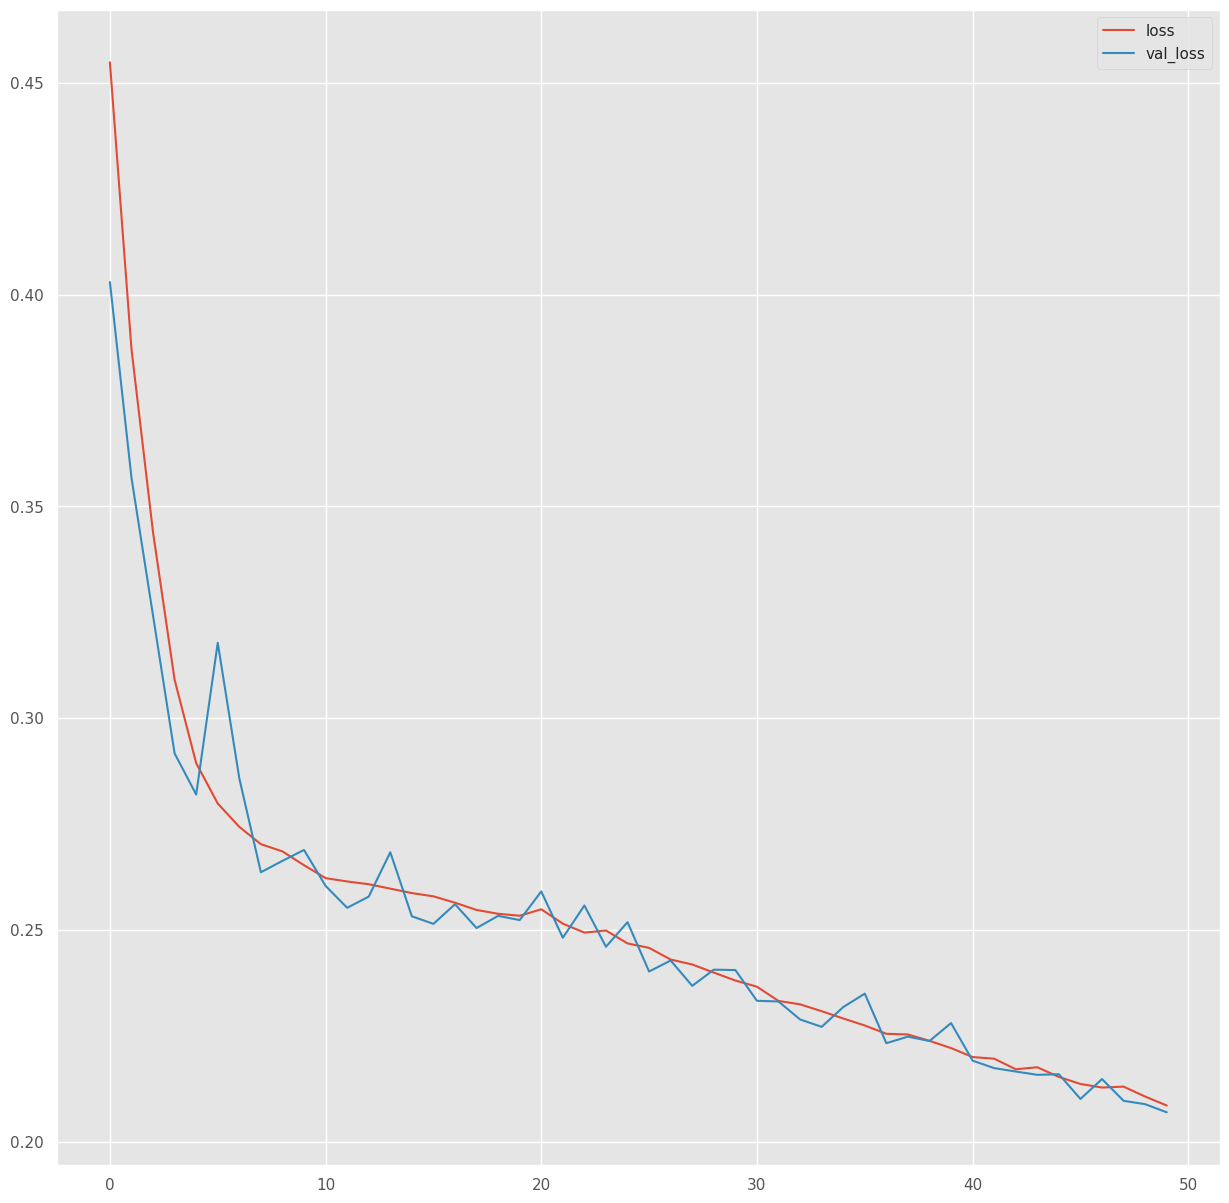

In [ ]:
# Plot Training Results

history_func_imp_df[['accuracy', 'val_accuracy']].plot()
history_func_imp_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of val-set
y_pred_func_val_imp = model_func_imp.predict(X_val)
# set threshold 0.5
y_pred_func_val_imp = np.where(y_pred_func_val_imp >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_val, y_pred_func_val_imp))

185/185 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2734
           1       0.93      0.92      0.92      3183

    accuracy                           0.92      5917
   macro avg       0.92      0.92      0.92      5917
weighted avg       0.92      0.92      0.92      5917



In [ ]:
# Model Evaluation of test-set
y_pred_func_test_imp = model_func_imp.predict(X_test)
# set threshold 0.5
y_pred_func_test_imp = np.where(y_pred_func_test_imp >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_func_test_imp))

232/232 [==============================] - 0s 977us/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3372
           1       0.94      0.91      0.92      4025

    accuracy                           0.92      7397
   macro avg       0.92      0.92      0.92      7397
weighted avg       0.92      0.92      0.92      7397



Pada model improvement functional, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.92`. Kemudian nilai `accuracy` dari test set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.91`. <br>

Performa model ini dapat dikatakan bagus `(goodfit)` karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.91-0.92). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga sangat rendah (berdekatan). Sehingga, Saya akan menggunakan model functional API yang sudah dilakukan improvement ini untuk diterapkan ke dalam data inference dan model deployment kedepannya.

# ix. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [ ]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# Summary of Functional API (Improvement)

model_func_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 52)           728         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           1060        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 5)            105         ['dense_1[0][0]']                
                                                                                              

In [ ]:
# Freeze Model

model_func_imp.trainable = False
model_func_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 52)           728         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           1060        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 5)            105         ['dense_1[0][0]']                
                                                                                              

In [ ]:
# Save ANN Model

model_func_imp.save('churn_risk_model.h5')

# x. Model Inference (`notebook terpisah`)

>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Pada bagian ini akan dilakukan proses model inference dengan menggunakan data `inference set` dan melakukan preprocessing yang sama seperti yang dilakukan sebelumnya serta melakukan prediksi terhadap data `inference-set`.

# xi. Pengambilan Kesimpulan

>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## EDA, Model, and Overall Analysis

Berdasarkan proses **EDA** yang sudah dilakukan, kita memperoleh insight bahwa:
- Dari Univariate analysis: <br>
  A. Observasi data numerik<br>
  1. Kebanyakan customer berusia `23-51 tahun`
  2. Kebanyakan pelanggan sudah tidak masuk ke situs web tersebut selama `9-17 hari`
  3. Sebagian besar pelanggan menghabiskan waktu di situs web rata-rata `161,765 detik`, sementara ada nilai yang ekstrim seperti `3235,58 detik` atau hampir 1 jam
  4. Sebagian besar pelanggan memiliki nilai transaksi rata-rata `27.554,5`, sementara ada nilai yang ekstrim seperti `99.914,1` atau hampir 100K
  5. Sebagian besar frekuensi pelanggan masuk ke situs web sekitar `7-22`, sementara ada nilai yang ekstrim seperti `73`
  6. Sebagian besar poin yang diberikan kepada pelanggan pada setiap transaksi sekitar `574+ - 757`, sementara ada nilai yang ekstrim seperti `0` dan `2069,07`<br>

  B. Observasi data kategorik<br>
  1. `~93%` berada di kelompok usia `10+ - 60 tahun`. Hanya `~7%` pelanggan berusia `60+`.
  2. `50%` pelanggan atau sebanyak `18.490` pelanggan berjenis kelamin wanita `(F)`.
  3. `38,2%` pelanggan atau sebanyak `14.128` pelanggan berasal dari kota kecil `(Town)`.
  4. `~20,9%` pelanggan atau sebanyak `7.724` pelanggan memiliki member basic `(Basic Membership)`.
  5. `~42,8%` pelanggan atau sebanyak `15.839` pelanggan itu tidak menggunakan kode referal pada saat join `(No).
  6. `Gift Vouchers/Coupons` ditawarkan kepada `~33,4%` pelanggan atau `12.349` pelanggan.
  7. `~37,6%` atau `13.913` pelanggan menggunakan media `Desktop`, diikuti oleh `37,5%` atau `13.876` pelanggan menggunakan media `Smartphone`.
  8. `~33,6% `pelanggan menggunakan tipe layanan internet `Wi-Fi`, diikuti dengan `Mobile_Data` kemudian `Fiber_Optic`.
  9. `~31,4%` atau `11.600` pelanggan terakhir masuk ke website selama `11-15 hari`.
  10. `~31,6%` atau `11.681` pelanggan menghabiskan waktu di website rata-rata `0-100 detik`.
  11. `~28,2%` atau `10.428` pelanggan memiliki nilai transaksi rata-rata `25K+ - 40K`.
  12. `~18%` atau `6.669` pelanggan sudah masuk ke website dengan frekuensi rata-rata `6-10`.
  13. `~39,1%` atau sebanyak `14.467` pelanggan memiliki point dari setiap transaksinya sebesar `700+ - 1K`.
  14. `~55%` atau sebanyak `20.342` pelanggan menggunakan penawaran diskon spesial `Yes`.
  15. `~55,3%` atau sebanyak `20.440` pelanggan memiliki penawaran `Yes`.
  16. `~50,3%` atau sebanyak `18.602` pelanggan tidak komplain `No`.
  17. `~50,3%` atau sebanyak `18.602` pelanggan status komplainnya tidak dapat diterapkan `Not Applicable`.
  18. `~17,2%` atau sebanyak `6.350` pelanggan feedbacknya adalah `Poor Product Quality`.<br>

- Dari Bivariate analysis:<br>
  1. Orang yang memiliki rata-rata transaksi dengan `nilai yang rendah` tampaknya lebih beresiko untuk berhenti memakai produk
  2. Orang yang semakin `sering masuk ke website` tampaknya lebih beresiko untuk berhenti memakai produk
  3. Orang yang memiliki point `rendah/sedikit` dari setiap transaksinya, cenderung beresiko untuk berhenti memakai produk
  4. Sebagian besar pelanggan berjenis kelamin wanita `(F)`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `gender` atau jenis kelamin pelanggan
  5. Sebagian besar pelanggan berasal dari kota kecil `(Town)`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `region_category`
  6. Sebagian besar pelanggan memiliki member basic `(Basic Membership)`. Pelanggan dengan status member `Basic Membership` dan `No Membership` cenderung lebih beresiko berhenti memakai produk
  7. Sebagian besar pelanggan tidak menggunakan kode referal pada saat join `(No)`. Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh `joined_through_referral`
  8. Sebagian besar pelanggan ditawarkan `Gift Vouchers/Coupons`. Pelanggan yang tidak ada penawaran apapun `Without Offers` cenderung lebih beresiko berhenti memakai produk
  9. Sebagian besar pelanggan menggunakan media `Desktop`. Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh `medium_of_operation`
  10. Sebagian besar pelanggan menggunakan tipe layanan internet `Wi-Fi`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `internet_option`
  11. Sebagian besar pelanggan menggunakan penawaran diskon spesial `Yes`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `used_special_discount`
  12. Sebagian besar pelanggan memiliki penawaran `Yes`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `offer_application_preference`
  13. Sebagian besar pelanggan tidak komplain `No`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `past_complaint`
  14. Sebagian besar pelanggan status komplainnya tidak dapat diterapkan `Not Applicable`. Namun, resiko seorang customer berhenti memakai produk tidak dipengaruhi oleh `complaint_status`
  15. Sebagian besar pelanggan feedbacknya adalah `Poor Product Quality`. Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk
  16. Sebagian besar pelanggan berada di kelompok usia `10+ - 60 tahun`. Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok usianya
  17. Sebagian besar pelanggan terakhir masuk ke website selama `11-15 hari`. Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok seberapa lama pelanggan terakhir masuk ke website
  18. Sebagian besar pelanggan menghabiskan waktu di website rata-rata `0-100 detik`. Namun, resiko seorang customer berhenti memakai produk tidak terlalu dipengaruhi oleh kelompok seberapa lama pelanggan menghabiskan waktu di website
  19. Sebagian besar pelanggan memiliki nilai transaksi rata-rata `25K+ - 40K`. Pelanggan dengan kelompok rata-rata transaksi sekitar `800 - 40K` cenderung lebih beresiko berhenti memakai produk
  20. Sebagian besar pelanggan sudah masuk ke website dengan frekuensi rata-rata `6-10`. Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk
  21. Sebagian besar pelanggan memiliki point dari setiap transaksinya sebesar `700+ - 1K`. Pelanggan dengan kelompok point sekitar `500+ - 700` cenderung lebih beresiko berhenti memakai produk
  22. Variabel penting yang mungkin mempengaruhi kecenderungan pelanggan berhenti memakai produk, adalah:<br>
    - Membership category
    - Preferred offer types
    - Average transaction value/Average transaction value bin
    - Average frequency login days/Average frequency login days bin
    - Points in wallet/ Points in wallet bin
  <br>

- Dari Multivariate analysis:<br>
  1. `avg_transaction_value`, `points_in_wallet`, dan `avg_frequency_login_days` yang memiliki hubungan yang cukup kuat dengan `churn_risk_score` dibandingkan variabel lainnya.<br>
  2. `avg_transaction_value` vs (categorical variable) by Churn Risk Score:<br>
  - Secara keseluruhan, `semakin rendah rata-rata nilai transaksi`, maka `semakin besar kecenderungan untuk berhenti memakai produk yang ditawarkan`
  - Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk dimana nilai transaksinya lebih rendah
  - Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk yang nilai transaksinya lebih rendah
  - Pelanggan dengan kelompok point sekitar `0 - 2K` cenderung lebih beresiko berhenti memakai produk dimana nilai transaksinya lebih rendah<br>
  2. `points_in_wallet` vs (categorical variable) by Churn Risk Score:<br>
  - Secara keseluruhan, `semakin rendah point yang dimiliki pelanggan`, maka `semakin besar kecenderungan untuk berhenti memakai produk yang ditawarkan`
  - Pelanggan dengan kategori member seperti `Basic Membership` dan `No Membership` cenderung lebih beresiko berhenti memakai produk dimana pointnya lebih rendah
  - Pelanggan dengan feedback seperti `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, dan `Too many ads` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah
  - Pelanggan dengan rata-rata nilai transaksi `800 - 80K` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah
  - Pelanggan dengan kelompok frekuensi rata-rata masuk ke website sekitar `21+` cenderung lebih beresiko berhenti memakai produk dimana nilai pointnya lebih rendah<br>

- Customer Profiling for Churn:<br>
  **Observasi CUSTOMER PROFILE** <br>
  1. Trend untuk sebagian besar pelanggan yang memakai produk `Wi-Fi`:<br>
    - `age_bin`: 51-60
    - `gender`: Female
    - `region_category`: Town
    - `membership_category`: Basic Membership
    - `joined_through_referral`: Yes
    - `preferred_offer_types`: Without Offers
    - `medium_of_operation`: Smartphone
    - `used_special_discount`: Yes
    - `offer_application_preference`: Yes
    - `past_complaint`: Yes
    - `complaint_status`: Not Applicable
    - `feedback`: Poor Product Quality
    - `days_last_login_bin`: 11-15
    - `avg_time_spent_bin`: 0-100
    - `avg_transaction_value_bin`: 25K+ - 40K
    - `avg_freq_login_days_bin`: 11-15
    - `points_in_wallet_bin`: 600+ - 700<br>
  2. Trend untuk sebagian besar pelanggan yang memakai produk `Mobile_Data`:<br>
    - `age_bin`: 31-40
    - `gender`: Female
    - `region_category`: Town
    - `membership_category`: Basic Membership
    - `joined_through_referral`: Yes
    - `preferred_offer_types`: Without Offers
    - `medium_of_operation`: Smartphone
    - `used_special_discount`: Yes
    - `offer_application_preference`: Yes
    - `past_complaint`: Yes
    - `complaint_status`: Not Applicable
    - `feedback`: Poor Product Quality
    - `days_last_login_bin`: 11-15
    - `avg_time_spent_bin`: 0-100
    - `avg_transaction_value_bin`: 10K+ - 25K
    - `avg_freq_login_days_bin`: 16-20
    - `points_in_wallet_bin`: 600+ - 700<br>
  3. Trend untuk sebagian besar pelanggan yang memakai produk `Fiber_Optic`:<br>
    - `age_bin`: 21-30
    - `gender`: Male
    - `region_category`: Town
    - `membership_category`: No Membership
    - `joined_through_referral`: Yes
    - `preferred_offer_types`: Without Offers
    - `medium_of_operation`: Smartphone
    - `used_special_discount`: Yes
    - `offer_application_preference`: Yes
    - `past_complaint`: No
    - `complaint_status`: Not Applicable
    - `feedback`: Poor Product Quality
    - `days_last_login_bin`: 11-15
    - `avg_time_spent_bin`: 0-100
    - `avg_transaction_value_bin`: 25K+ - 40K
    - `avg_freq_login_days_bin`: 6-10
    - `points_in_wallet_bin`: 600+ - 700

Model yang dibuat merupakan **model Artificial Neural Network** dengan menggunakan `Sequential API` dan `Functional API`.<br>

Fitur yang digunakan dalam model yaitu:<br>
  - membership_category
  - points_in_wallet
  - feedback
  - avg_transaction_value
  - avg_frequency_login_days<br>

Pada proses training data dengan baseline model Sequential, Saya menggunakan hyperparameter:<br>
  - `2 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 26 dan 2 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
  - Weight initializations: `HeNormal` 
  - Activation Function hidden layer: `relu`
  - BatchNormalization dan Dropout dengan rate `0.1` pada hidden layer 2
  - `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
  - Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
  - Ditraining dengan `epoch 30`<br>

Pada proses training data dengan baseline model Functional, Saya menggunakan hyperparameter:<br>
  - `2 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 39 dan 3 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
  - Weight initializations: `HeNormal` 
  - Activation Function hidden layer: `relu`
  - `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
  - Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
  - Ditraining dengan `epoch 30`<br>

**MODEL IMPROVEMENT**<br>
Pada proses training data dengan model improvement Sequential, Saya menggunakan hyperparameter:<br>
  - `3 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 39, 26 dan 16 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
  - Weight initializations: `HeNormal` 
  - Activation Function hidden layer: `relu`
  - BatchNormalization dan Dropout dengan rate `0.2`
  - `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
  - Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
  - Ditraining dengan `epoch 50`<br>

Pada proses training data dengan model improvement Functional, Saya menggunakan hyperparameter:<br>
  - `3 hidden layers` dengan masing-masingnya mempunyai `jumlah neuron 52, 20 dan 5 neuron`. Hidden layer yang pertama menerima `input sebanyak 13 fitur`
  - Weight initializations: `HeNormal` 
  - Activation Function hidden layer: `relu`
  - `1 output layer` dengan 1 neuron dan menggunakan activation function `sigmoid` karena kasus yang ditangani adalah `binary class`
  - Loss function yang digunakan `binary cross entropy`, optimizer `adam`, metrics yang digunakan `accuracy`
  - Ditraining dengan `epoch 50`


Berdasarkan **hasil evaluasi model** <br>

**EVALUASI BASELINE MODEL**<br>
1. Sequential API<br>
  Pada base model sequential, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.86` dan nilai `recall` pada label 1 sebesar `0.90`. Performa model ini dapat dikatakan bagus karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.84-0.86). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga tidak terlalu signifikan. 
2. Functinal API<br>
  Pada base model functional, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.90` dan nilai `recall` pada label 1 sebesar `0.89`. Performa model ini dapat dikatakan bagus karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.88-0.89). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga sangat rendah (berdekatan). <br>


**EVALUASI IMPROVEMENT MODEL**<br>
1. Sequential API<br>
Pada model improvement sequential, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.92`. Kemudian nilai `accuracy` dari test set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.91`. <br>
Performa model ini dapat dikatakan bagus `(goodfit)` karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.91-0.92). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga tidak terlalu signifikan. <br>
2. Functinal API<br>
Pada model improvement functional, dapat dilihat bahwa nilai `accuracy` dari validation set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.92`. Kemudian nilai `accuracy` dari test set sebesar `0.92` dan nilai `recall` pada label 1 sebesar `0.91`. <br>
Performa model ini dapat dikatakan bagus `(goodfit)` karena garis val_accuracy dan accuracy memiliki gap yang tergolong rendah dan keduanya mencapai akurasi sekitar (0.91-0.92). Kemudian garis loss dengan val_loss juga semakin menuju ke 0 dan gap keduanya juga sangat rendah (berdekatan). Sehingga, Saya menggunakan model functional API yang sudah dilakukan improvement ini untuk diterapkan ke dalam data inference dan model deployment kedepannya.<br>

Melalui **percobaan model di data inference**, kita dapat mengetahui bagaimana keakuratan model memprediksi apakah seorang customer akan berhenti memakai produk yang ditawarkan atau tidak. Kita dapat melihat bahwa tidak ada perbedaan antara hasil prediksi dengan data aktual. Artinya, model ini sudah bagus untuk memprediksi seorang custumer akan churn atau tidak dan bisa digunakan oleh perusahaan untuk meminimalisir resiko customer churn.<br>
Hal ini dapat dibuktikan juga pada proses evaluasi model sebelumnya, kita mendapatkan bahwa model ini memiliki performansi terbaik mencapai `akurasi 92%` setelah dilakukan improvement.

## Business Recommendations

1. `'membership_category', 'points_in_wallet', 'feedback', 'avg_transaction_value', 'avg_frequency_login_days'` adalah fitur yang paling penting dalam model.<br>
2. `'joined_through_referral', 'preferred_offer_types', 'days_since_last_login', 'used_special_discount', 'avg_time_spent', 'offer_application_preference', 'past_complaint', 'medium_of_operation', 'region_category', 'complaint_status', 'gender', 'internet_option', 'age'` tampaknya tidak signifikan untuk menentukan pelanggan churn atau tidak.<br>
3. Pelanggan yang harus lebih diretensi yaitu pelanggan yang:
  - memiliki member `Platinum Membership` dan `Premium Membership`
  - memiliki point `2K+`
  - memberi feedback `Products always in stock`, `Quality Customer Care`, `Reasonable Price`, `User Friendly Website`
  - memiliki rata-rata transaksi sekitar `80K+`<br>
4. Pelanggan yang cenderung untuk churn yaitu pelanggan yang:
  - memiliki member `Basic Membership` dan `No Membership`
  - memiliki point `600+ - 700`
  - memberi feedback `Poor Product Quality`
  - memiliki rata-rata transaksi sekitar `10K+ - 40K`<br>
5. Berdasarkan EDA, bagian marketing juga harus mempertimbangkan:<br>
   - Strategi yang ditetapkan untuk pelanggan yang berpotensi untuk churn, misalnya dengan meningkatkan kualitas produk yang mereka pakai. Karena keseluruhan dari mereka itu memberikan feedback yang buruk terhadap kualitas dari produknya.<br>
   - Strategi yang diterapkan untuk pelanggan yang lebih retensi, misalnya meningkatkan lagi kualitas produk yang mereka pakai dan memberikan voucher promo untuk pelanggan yang loyal.